In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates
import math

# **Part I - Start and End of the Season**

In [2]:
data = pd.read_csv('data/kenya_phenology_full_export.csv')
data.head()

origin    TRS2.sos    TRS2.eos    TRS5.sos    TRS5.eos     DER.sos  \
0  2000-01-01  2000-07-31  2000-12-22  2000-08-06  2000-12-04  2000-08-03   
1  2001-01-01  2001-03-24  2001-07-28  2001-04-04  2001-07-18  2001-04-04   
2  2001-01-01  2001-09-04  2001-12-31  2001-09-20  2001-12-20  2001-09-20   
3  2002-01-01  2002-04-02  2002-08-06  2002-04-14  2002-07-21  2002-04-15   
4  2002-01-01  2002-10-13  2003-02-06  2002-10-31  2003-01-29  2002-10-31   

      DER.pos     DER.eos          UD          SD          DD          RD  \
0  2000-09-06  2000-12-10  2000-07-27  2000-08-14  2000-11-07  2001-01-03   
1  2001-05-19  2001-07-24  2001-03-20  2001-04-19  2001-07-01  2001-08-05   
2  2001-11-13  2001-12-20  2001-08-25  2001-10-14  2001-12-04  2002-01-06   
3  2002-05-29  2002-07-20  2002-03-26  2002-05-04  2002-06-27  2002-08-16   
4  2002-12-27  2003-01-28  2002-10-04  2002-11-26  2003-01-15  2003-02-12   

      Greenup    Maturity  Senescence    Dormancy    meth        R2       NSE  \
0  2000-07-19  2000-08-19  2000-10-28  2001-01-22   Zhang  0.877805  0.746910   
1  2001-03-16  2001-04-23  2001-06-26         NaN   Zhang  0.969927  0.957419   
2  2001-08-19  2001-10-19  2001-11-30  2002-01-09   Zhang  0.958562  0.954455   
3  2002-03-22  2002-05-09  2002-06-21  2002-08-20  Elmore  0.987241  0.986599   
4  2002-09-30  2002-12-01  2003-01-11  2003-02-14   Zhang  0.942071  0.936080   

          R      RMSE        pvalue     admin1_name  rain_trs5  rain_trs2  \
0  0.936912  0.014294  1.787192e-18  Ilemi Triangle       80.8       90.0   
1  0.984849  0.009635  1.830278e-17  Ilemi Triangle       50.1       85.6   
2  0.979062  0.021539  2.113188e-17  Ilemi Triangle      101.6      119.3   
3  0.993600  0.006505  2.728422e-23  Ilemi Triangle      141.1      141.5   
4  0.970604  0.015819  2.365785e-16  Ilemi Triangle      120.3      133.0   

   rain_greenup_scenescence  rain_der  season_yr  season_num  
0                      47.1      80.8       2000           1  
1                      92.9      62.5       2001           1  
2                     127.3     101.6       2001           2  
3                     153.0     140.4       2002           1  
4                     154.5     120.3       2002           2

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672900 entries, 0 to 672899
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   origin                    672900 non-null  object 
 1   TRS2.sos                  672603 non-null  object 
 2   TRS2.eos                  672603 non-null  object 
 3   TRS5.sos                  672603 non-null  object 
 4   TRS5.eos                  672603 non-null  object 
 5   DER.sos                   672603 non-null  object 
 6   DER.pos                   672603 non-null  object 
 7   DER.eos                   672603 non-null  object 
 8   UD                        672603 non-null  object 
 9   SD                        672603 non-null  object 
 10  DD                        672603 non-null  object 
 11  RD                        672603 non-null  object 
 12  Greenup                   537305 non-null  object 
 13  Maturity                  605589 non-null  o

In [8]:
data.describe(include='all')

origin    TRS2.sos    TRS2.eos    TRS5.sos    TRS5.eos  \
count       672900      672603      672603      672603      672603   
unique          25        7757        8037        7861        8190   
top     2015-01-01  2013-03-09  2024-12-20  2023-03-29  2024-12-18   
freq         33795        1635        4510        1317        2280   
mean           NaN         NaN         NaN         NaN         NaN   
std            NaN         NaN         NaN         NaN         NaN   
min            NaN         NaN         NaN         NaN         NaN   
25%            NaN         NaN         NaN         NaN         NaN   
50%            NaN         NaN         NaN         NaN         NaN   
75%            NaN         NaN         NaN         NaN         NaN   
max            NaN         NaN         NaN         NaN         NaN   

           DER.sos     DER.pos     DER.eos          UD          SD  \
count       672603      672603      672603      672603      672603   
unique        8206        8770        8381        7666        8388   
top     2023-03-30  2011-12-01  2024-12-18  2007-04-07  2023-04-19   
freq           873         888        2350        2812         829   
mean           NaN         NaN         NaN         NaN         NaN   
std            NaN         NaN         NaN         NaN         NaN   
min            NaN         NaN         NaN         NaN         NaN   
25%            NaN         NaN         NaN         NaN         NaN   
50%            NaN         NaN         NaN         NaN         NaN   
75%            NaN         NaN         NaN         NaN         NaN   
max            NaN         NaN         NaN         NaN         NaN   

                DD          RD     Greenup    Maturity  Senescence  \
count       672603      672603      537305      605589      588686   
unique        8598        7973        8151        7945        8250   
top     2024-12-12  2024-12-26  2018-02-22  2024-11-21  2024-12-09   
freq          1321        7244         703         800        1200   
mean           NaN         NaN         NaN         NaN         NaN   
std            NaN         NaN         NaN         NaN         NaN   
min            NaN         NaN         NaN         NaN         NaN   
25%            NaN         NaN         NaN         NaN         NaN   
50%            NaN         NaN         NaN         NaN         NaN   
75%            NaN         NaN         NaN         NaN         NaN   
max            NaN         NaN         NaN         NaN         NaN   

          Dormancy    meth             R2            NSE              R  \
count       584691  672900  672683.000000  672900.000000  672683.000000   
unique        8054       3            NaN            NaN            NaN   
top     2024-12-21   Zhang            NaN            NaN            NaN   
freq           698  436861            NaN            NaN            NaN   
mean           NaN     NaN       0.950491       0.928638       0.974117   
std            NaN     NaN       0.069554       0.219690       0.039829   
min            NaN     NaN       0.000276     -73.616006      -0.312197   
25%            NaN     NaN       0.938343       0.922791       0.968681   
50%            NaN     NaN       0.975716       0.970966       0.987783   
75%            NaN     NaN       0.989985       0.987481       0.994980   
max            NaN     NaN       0.999844       0.999816       0.999922   

                 RMSE        pvalue admin1_name      rain_trs5      rain_trs2  \
count   672900.000000  6.726830e+05      672900  672603.000000  672603.000000   
unique            NaN           NaN          48            NaN            NaN   
top               NaN           NaN    Marsabit            NaN            NaN   
freq              NaN           NaN       78086            NaN            NaN   
mean         0.013595  5.989003e-05         NaN     303.872047     352.985832   
std          0.011123  4.442697e-03         NaN     303.184855     333.467932   
min          0.000123

In [31]:
# 1. Conversion en datetime si pas déjà fait
data["DER.sos"] = pd.to_datetime(data["DER.sos"], errors="coerce")

# 2. Extraire le jour de l’année (DOY)
data["sos_doy"] = data["DER.sos"].dt.dayofyear


In [48]:
# 3️⃣ Filtrer sur la saison 1 uniquement
df_season1 = data[data["season_num"] == 1].copy()

# 4️⃣ Calculer le premier jour (min) par comté et par année
first_rains_s1 = (
    df_season1
      .groupby(["admin1_name", "season_yr"], as_index=False)
      .agg(first_sos_doy=("sos_doy", "median"))
      .dropna(subset=["first_sos_doy"])
)

first_rains_s1


admin1_name  season_yr  first_sos_doy
0        Baringo       2000          171.5
1        Baringo       2001           96.0
2        Baringo       2002           95.0
3        Baringo       2003          326.0
4        Baringo       2004           92.0
...          ...        ...            ...
1195  West Pokot       2020          126.0
1196  West Pokot       2021          103.0
1197  West Pokot       2022          112.0
1198  West Pokot       2023           85.0
1199  West Pokot       2024           95.0

[1200 rows x 3 columns]

In [49]:
first_rains_s1['admin1_name'].nunique()*25

1200

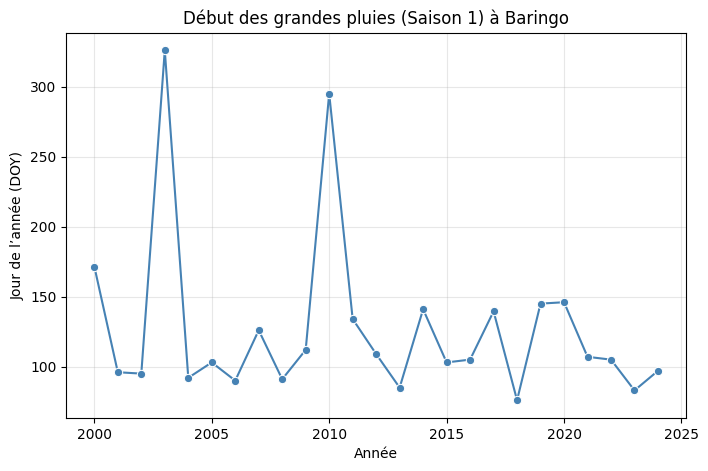

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

nairobi_s1 = first_rains_s1[first_rains_s1["admin1_name"] == "Baringo"]

plt.figure(figsize=(8,5))
sns.lineplot(data=nairobi_s1, x="season_yr", y="first_sos_doy", marker="o", color="steelblue")
plt.title("Début des grandes pluies (Saison 1) à Baringo")
plt.xlabel("Année")
plt.ylabel("Jour de l’année (DOY)")
plt.grid(alpha=0.3)
plt.show()


In [ ]:

sos = data["sos_doy"].dropna()


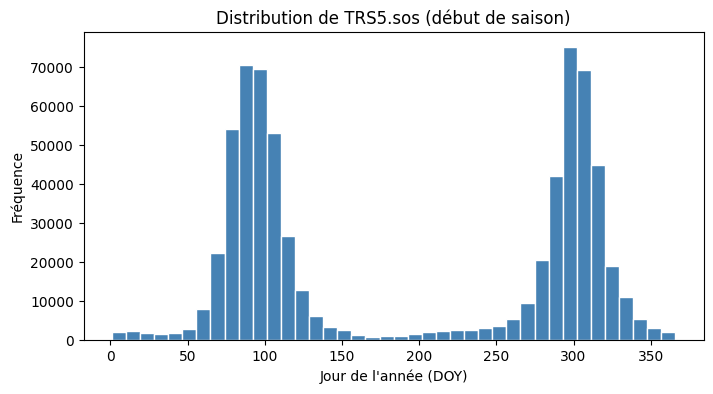

In [14]:
plt.figure(figsize=(8, 4))
plt.hist(sos, bins=40, color="steelblue", edgecolor="white")
plt.xlabel("Jour de l'année (DOY)")
plt.ylabel("Fréquence")
plt.title("Distribution de TRS5.sos (début de saison)")
plt.show()


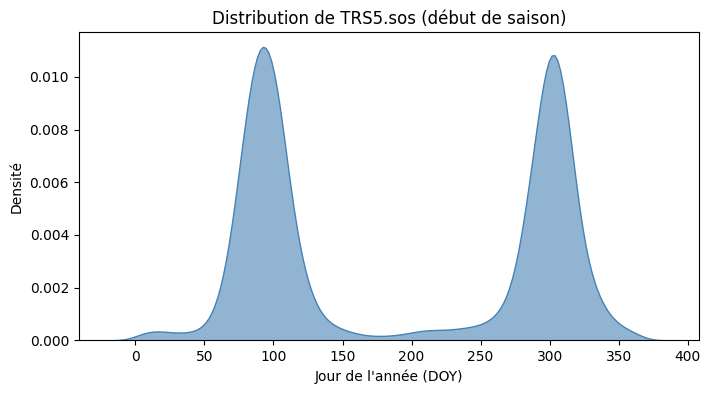

In [15]:
plt.figure(figsize=(8, 4))
sns.kdeplot(sos, fill=True, color="steelblue", alpha=0.6)
plt.xlabel("Jour de l'année (DOY)")
plt.ylabel("Densité")
plt.title("Distribution de TRS5.sos (début de saison)")
plt.show()


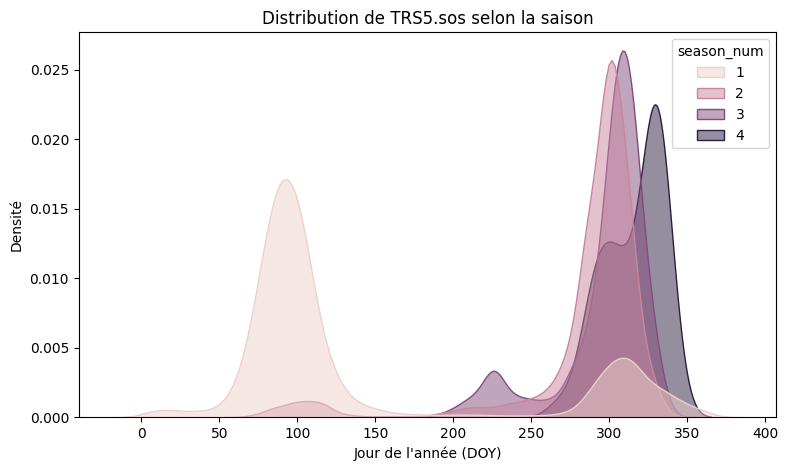

In [17]:
plt.figure(figsize=(9, 5))
sns.kdeplot(data=data, x="sos_doy", hue="season_num", fill=True, common_norm=False, alpha=0.5)
plt.xlabel("Jour de l'année (DOY)")
plt.ylabel("Densité")
plt.title("Distribution de TRS5.sos selon la saison")
plt.show()


In [18]:
data["season_num"].value_counts()

season_num
1    427791
2    238956
3      6110
4        43
Name: count, dtype: int64

C:\Users\KPS\AppData\Local\Temp\ipykernel_20204\2680823389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="season_num", y="sos_doy", palette="Set2")


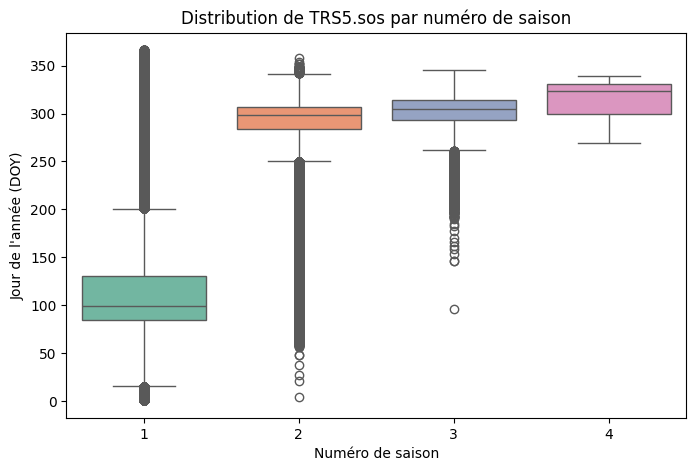

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="season_num", y="sos_doy", palette="Set2")
plt.xlabel("Numéro de saison")
plt.ylabel("Jour de l'année (DOY)")
plt.title("Distribution de TRS5.sos par numéro de saison")
plt.show()


In [27]:
df_aberrant = data[data["season_num"].isin([3, 4])]
print(df_aberrant.shape)
df_aberrant.head()


(6153, 30)


origin    TRS2.sos    TRS2.eos   TRS5.sos    TRS5.eos     DER.sos  \
9    2004-01-01  2004-11-10  2005-01-29 2004-11-20  2005-01-18  2004-11-19   
22   2013-01-01  2013-10-02  2013-12-25 2013-10-07  2013-12-16  2013-10-15   
48   2004-01-01  2004-10-26  2005-01-20 2004-11-05  2005-01-09  2004-11-04   
82   2004-01-01  2004-10-28  2005-01-20 2004-11-05  2005-01-11  2004-10-29   
116  2003-01-01  2003-11-19  2004-01-30 2003-11-23  2004-01-19  2003-12-01   

        DER.pos     DER.eos          UD          SD          DD          RD  \
9    2004-12-20  2005-01-18  2004-11-01  2004-12-05  2005-01-04  2005-02-03   
22   2013-10-31  2013-12-17  2013-09-30  2013-10-09  2013-12-03  2013-12-31   
48   2004-12-09  2005-01-09  2004-10-16  2004-11-22  2004-12-25  2005-01-25   
82   2004-12-10  2005-01-11  2004-10-23  2004-11-16  2004-12-29  2005-01-25   
116  2003-12-15  2004-01-18  2003-11-17  2003-11-28  2004-01-03  2004-02-04   

    Greenup    Maturity  Senescence    Dormancy    meth        R2       NSE  \
9       NaN  2004-12-09  2004-12-30  2005-02-06   Zhang  0.991247  0.986981   
22      NaN         NaN  2013-11-28  2014-01-06   Zhang  0.923329  0.912104   
48      NaN  2004-11-26  2004-12-20  2005-01-29   Zhang  0.984668  0.978387   
82      NaN  2004-11-21  2004-12-24  2005-01-29  Elmore  0.961128  0.946419   
116     NaN  2003-12-01  2003-12-29  2004-02-08   Zhang  0.929797  0.915584   

            R      RMSE        pvalue     admin1_name  rain_trs5  rain_trs2  \
9    0.995614  0.004887  8.277646e-16  Ilemi Triangle       97.0      110.0   
22   0.960900  0.022618  9.049493e-10  Ilemi Triangle       47.1       47.6   
48   0.992305  0.005661  6.036870e-16  Ilemi Triangle       88.6      123.9   
82   0.980371  0.010790  5.451363e-12  Ilemi Triangle      128.8      152.5   
116  0.964260  0.012522  2.785676e-08  Ilemi Triangle       55.3       90.1   

     rain_greenup_scenescence  rain_der  season_yr  season_num  sos_doy  
9                         NaN      97.1       2004           3    325.0  
22                        NaN      47.1       2013           3    280.0  
48                        NaN      91.8       2004           3    310.0  
82                        NaN     151.9       2004           3    310.0  
116                       NaN      34.1       2003           3    327.0

In [29]:
df_aberrant['season_yr'].value_counts()

season_yr
2022    2024
2003     827
2004     599
2001     394
2006     363
2013     300
2024     222
2007     220
2016     202
2010     199
2017     135
2014      99
2008      96
2011      71
2000      64
2020      56
2015      55
2005      51
2023      44
2021      39
2002      38
2012      24
2019      22
2018       5
2009       4
Name: count, dtype: int64

In [21]:
df_aberrant.groupby(["admin1_name", "season_yr"])["season_num"].value_counts()


admin1_name  season_yr  season_num
Baringo      2001       3              1
             2003       3             14
                        4              1
             2004       3             21
                        4              1
                                      ..
West Pokot   2004       3             18
             2006       3              7
             2007       3              1
             2014       3              1
             2022       3              6
Name: count, Length: 425, dtype: int64

In [25]:
df_aberrant_summary = (
    df_aberrant
    .groupby("season_num")
    .agg(
        n_obs=("season_num", "count"),
        years=("season_yr", lambda x: sorted(x.unique())[:5]),
        counties=("admin1_name", lambda x: sorted(x.unique())[:5])
    )
)
df_aberrant_summary


n_obs                           years  \
season_num                                          
3            6110  [2000, 2001, 2002, 2003, 2004]   
4              43  [2000, 2001, 2003, 2004, 2013]   

                                                    counties  
season_num                                                    
3           [Baringo, Bomet, Bungoma, Elgeyo-Marakwet, Embu]  
4                  [Baringo, Bomet, Bungoma, Kericho, Kwale]

In [24]:
df_aberrant[["admin1_name", "season_yr", "season_num", "TRS5.sos", "TRS5.eos"]]


admin1_name  season_yr  season_num   TRS5.sos    TRS5.eos
9       Ilemi Triangle       2004           3 2004-11-20  2005-01-18
22      Ilemi Triangle       2013           3 2013-10-07  2013-12-16
48      Ilemi Triangle       2004           3 2004-11-05  2005-01-09
82      Ilemi Triangle       2004           3 2004-11-05  2005-01-11
116     Ilemi Triangle       2003           3 2003-11-23  2004-01-19
...                ...        ...         ...        ...         ...
671730           Kwale       2010           3 2010-10-22  2011-01-01
671887           Kwale       2001           3 2001-11-11  2002-01-03
671944           Kwale       2022           3 2022-11-01  2023-02-08
672066           Kwale       2010           3 2010-10-15  2010-12-23
672103           Kwale       2010           3 2010-10-22  2010-12-30

[6153 rows x 5 columns]

In [ ]:
import pandas as pd

df = data.copy()
# On s’assure que les dates sont bien en datetime
df["DER.sos"] = pd.to_datetime(df["DER.sos"], errors="coerce")
df["DER.eos"] = pd.to_datetime(df["DER.eos"], errors="coerce")

# Extraire DOY pour faciliter la visualisation
df["sos_doy"] = df["DER.sos"].dt.dayofyear
df["eos_doy"] = df["DER.eos"].dt.dayofyear

# Garder uniquement l’année 2024
df_2024 = df[df["season_yr"] == 2024].copy()


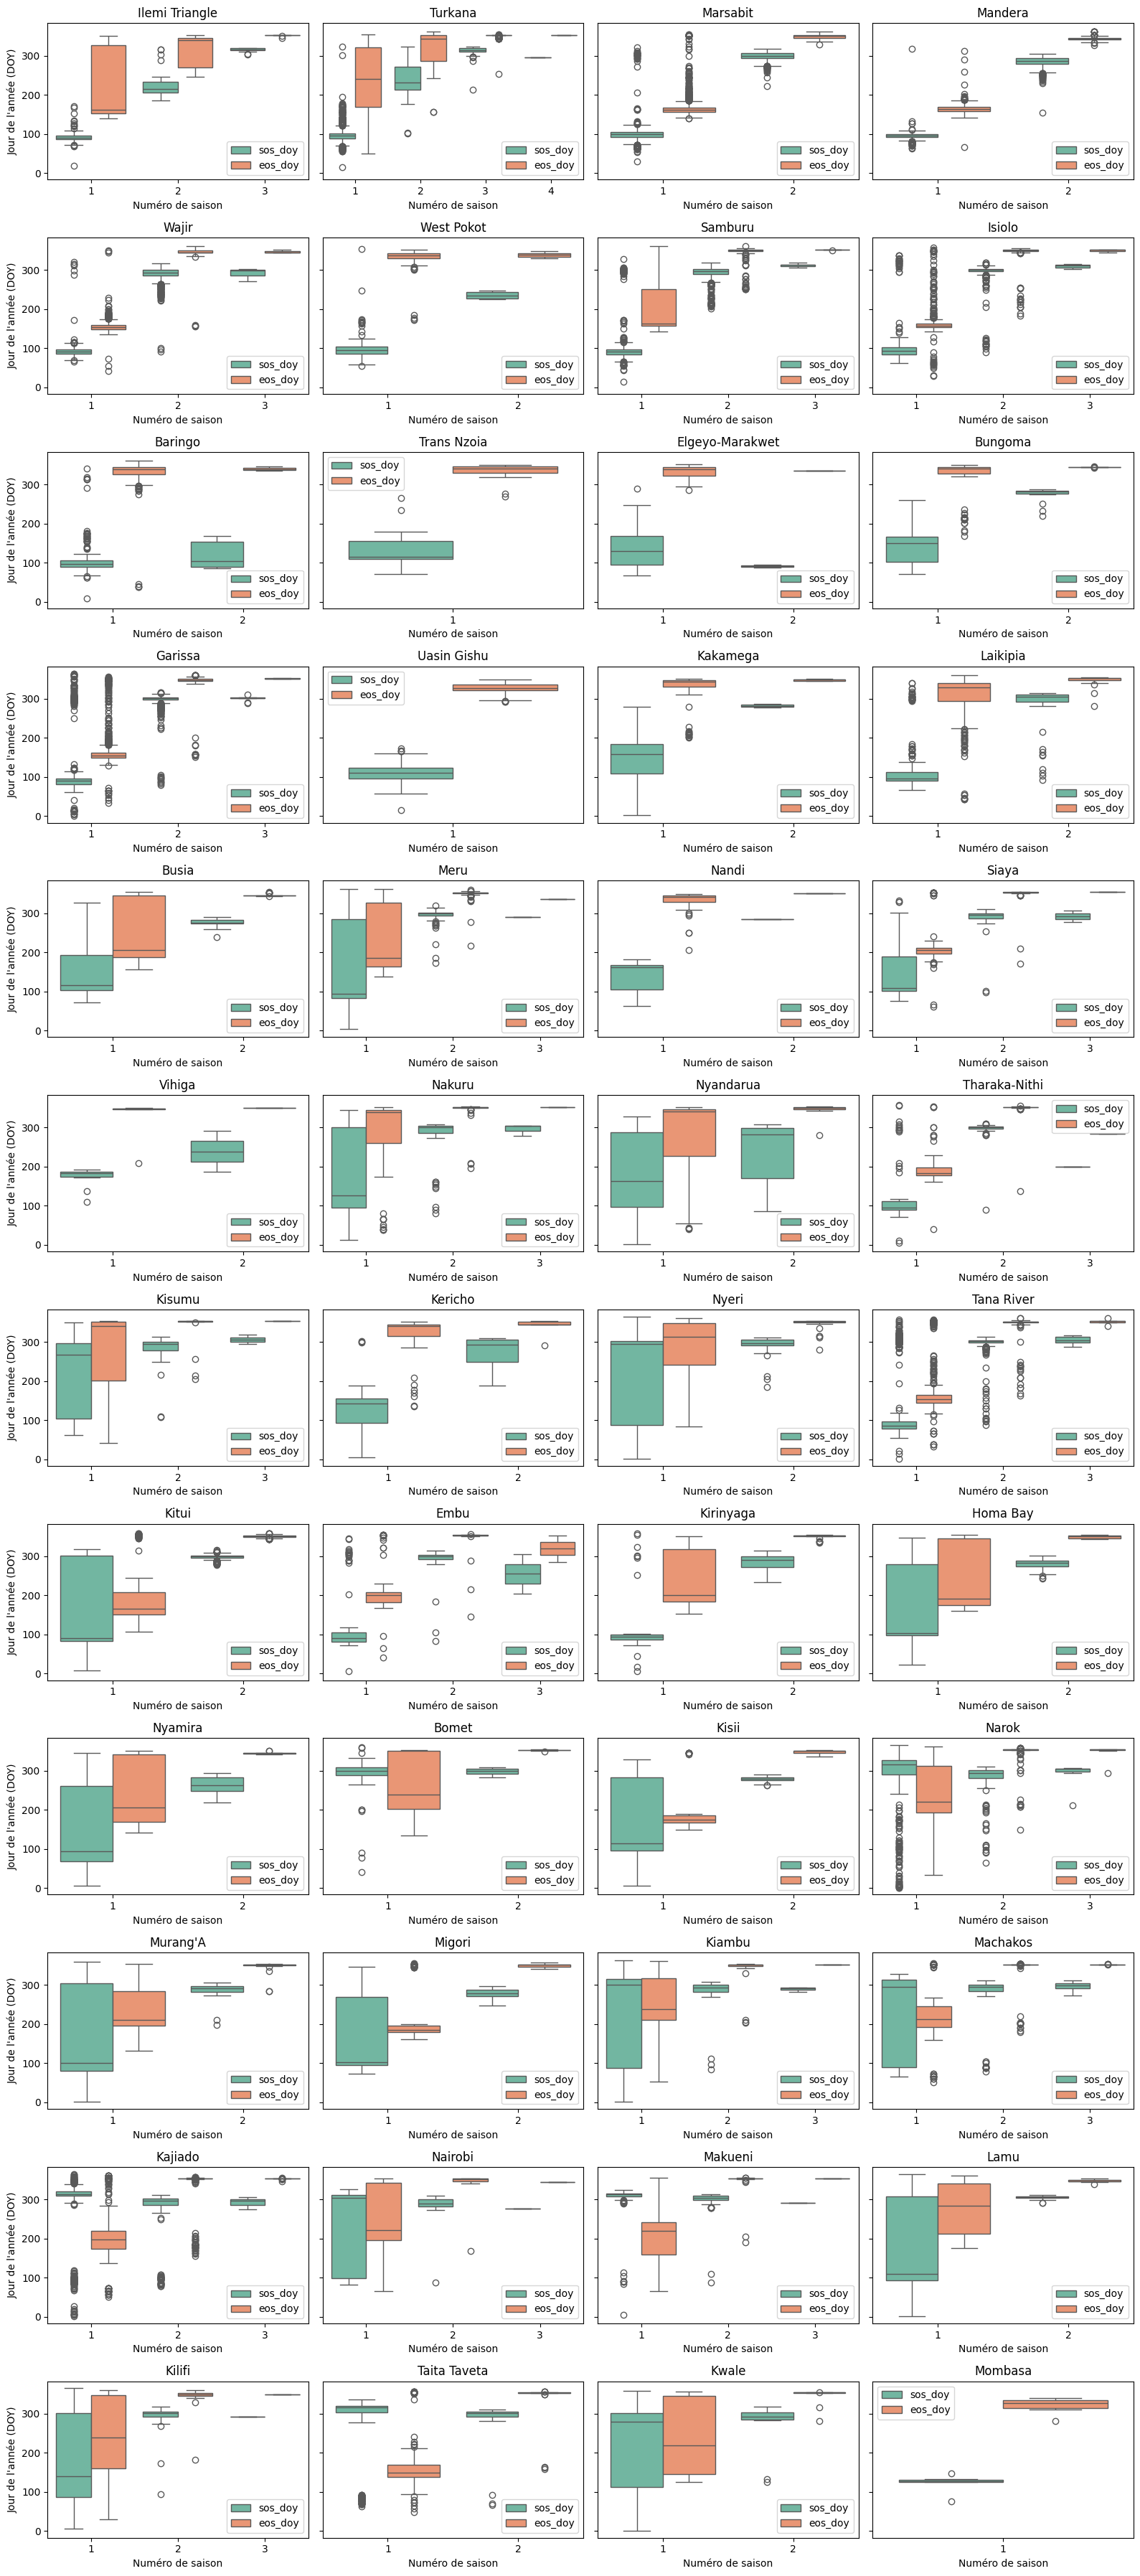

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

counties = df_2024["admin1_name"].unique()
n = len(counties)

# Ajuster la grille selon le nombre de comtés
cols = 4
rows = -(-n // cols)  # division plafond

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 3), sharey=True)
axes = axes.flatten()

for i, county in enumerate(counties):
    ax = axes[i]
    subset = df_2024[df_2024["admin1_name"] == county]
    
    # Tracer les boxplots pour début et fin
    sns.boxplot(data=subset.melt(
        id_vars=["season_num"], 
        value_vars=["sos_doy", "eos_doy"], 
        var_name="phase", 
        value_name="DOY"
    ), x="season_num", y="DOY", hue="phase", ax=ax, palette="Set2")
    
    ax.set_title(county)
    ax.set_xlabel("Numéro de saison")
    ax.set_ylabel("Jour de l'année (DOY)")
    ax.legend_.set_title("")  # simplifier la légende

# Nettoyer les cases vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


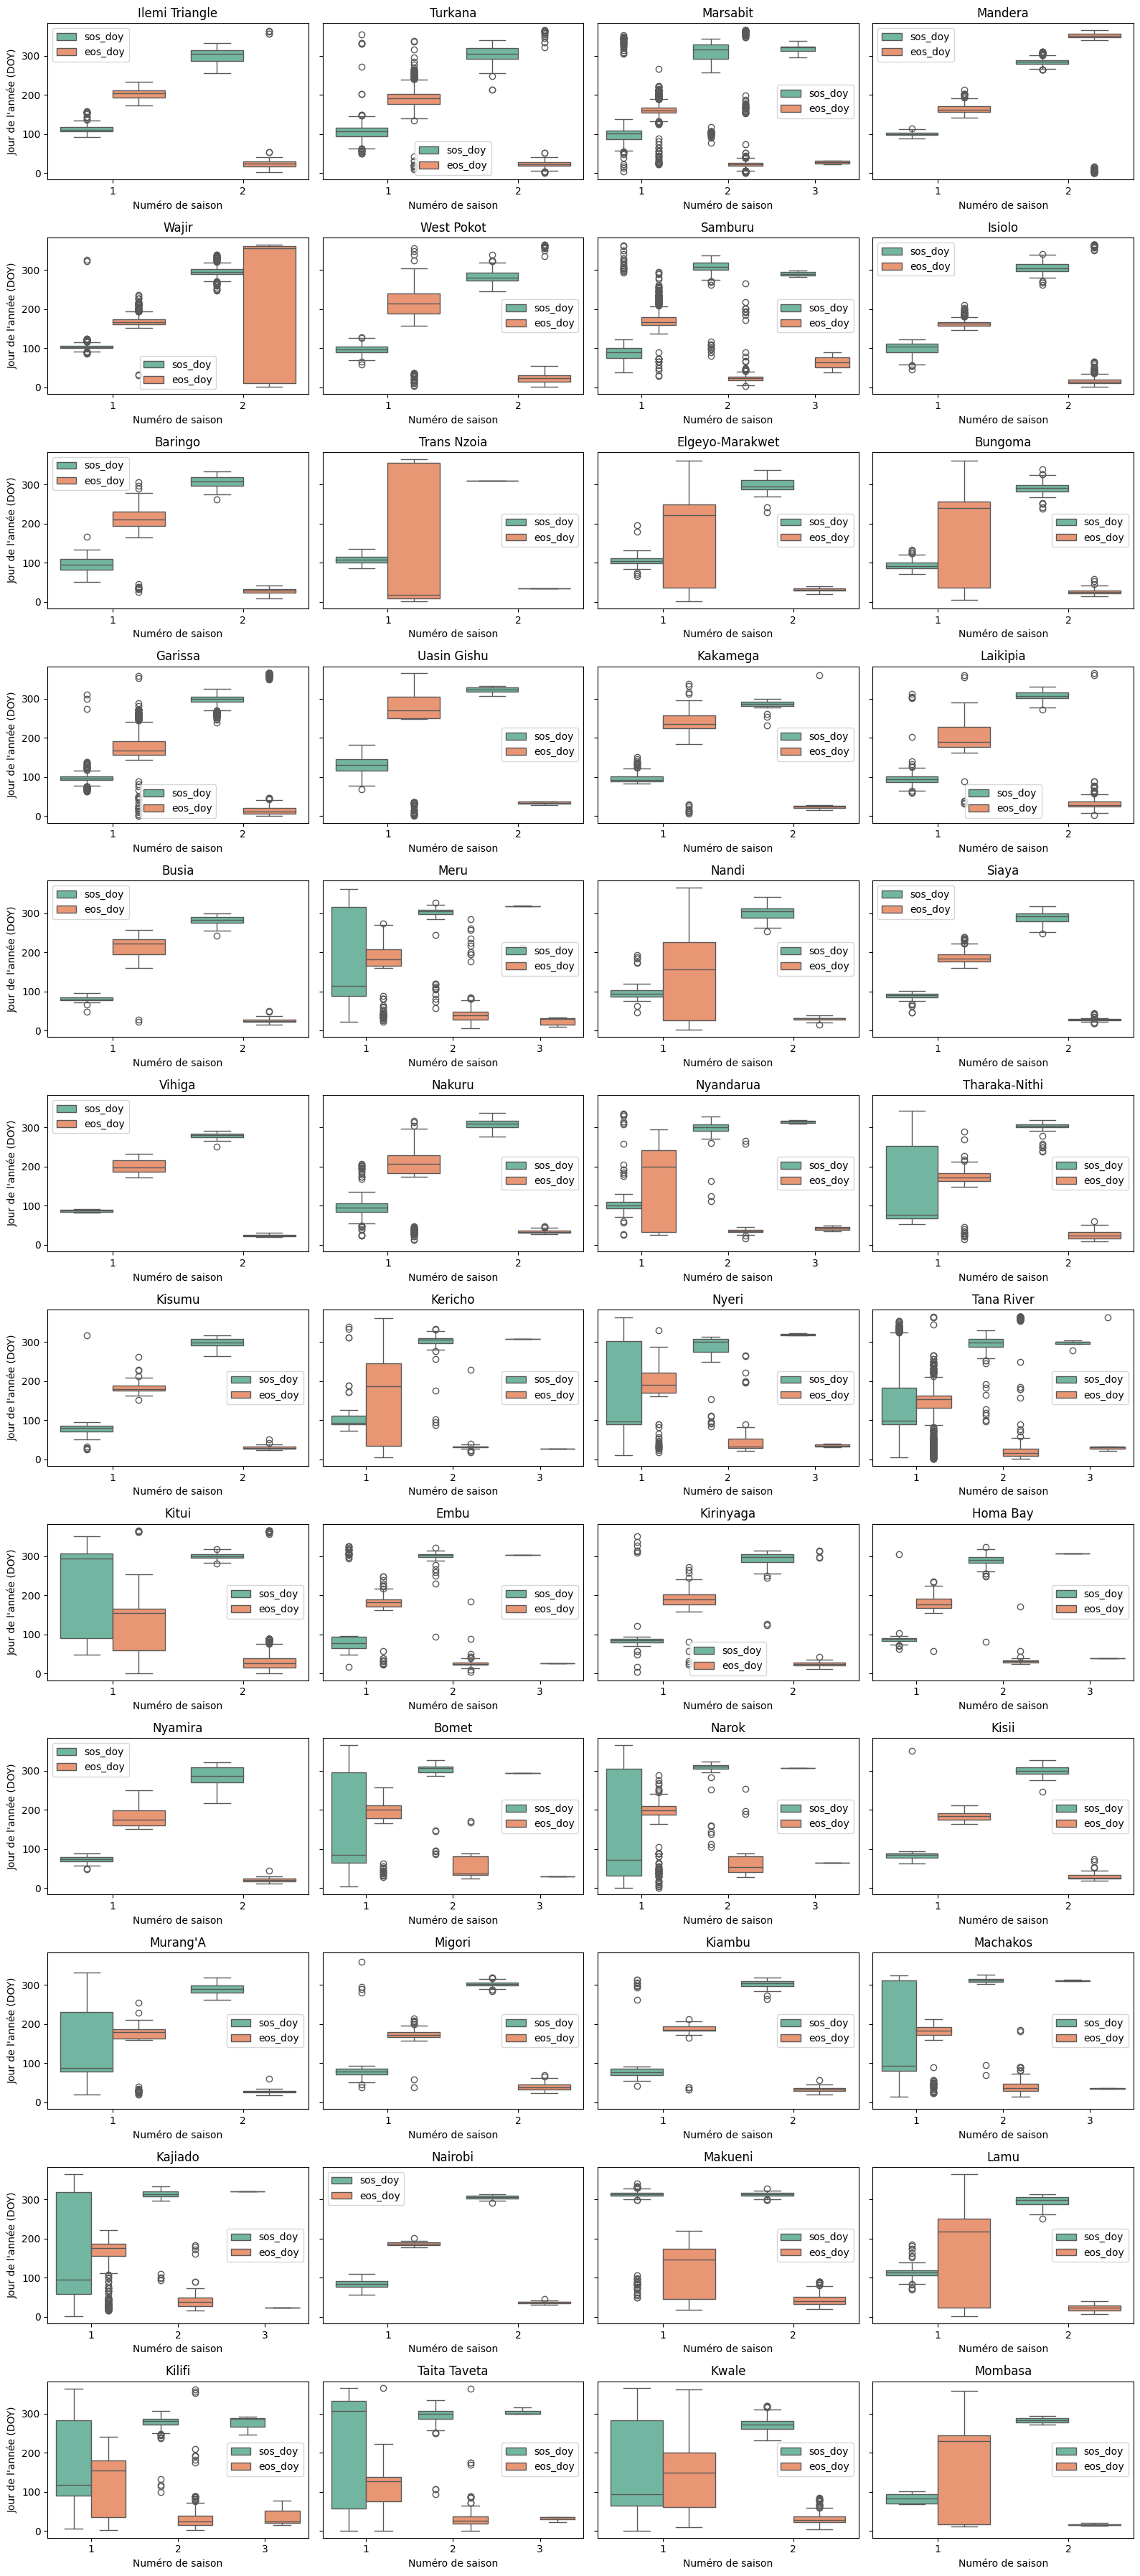

In [53]:
df_2002 = df[df["season_yr"] == 2002].copy()

import matplotlib.pyplot as plt
import seaborn as sns

counties = df_2002["admin1_name"].unique()
n = len(counties)

# Ajuster la grille selon le nombre de comtés
cols = 4
rows = -(-n // cols)  # division plafond

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 3), sharey=True)
axes = axes.flatten()

for i, county in enumerate(counties):
    ax = axes[i]
    subset = df_2002[df_2002["admin1_name"] == county]
    
    # Tracer les boxplots pour début et fin
    sns.boxplot(data=subset.melt(
        id_vars=["season_num"], 
        value_vars=["sos_doy", "eos_doy"], 
        var_name="phase", 
        value_name="DOY"
    ), x="season_num", y="DOY", hue="phase", ax=ax, palette="Set2")
    
    ax.set_title(county)
    ax.set_xlabel("Numéro de saison")
    ax.set_ylabel("Jour de l'année (DOY)")
    ax.legend_.set_title("")  # simplifier la légende

# Nettoyer les cases vides
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Remplacement des saison 3 et 4 par la saison 2

---

# **Part II - Typical Lenght of Season**

In [3]:
data = pd.read_csv('data/kenya_phenology_full_export.csv')


In [4]:
# On extrait les colonnes essentielles
data_sos_eos = data[[
    "admin1_name",   # comté
    "season_yr",     # année
    "season_num",    # numéro de saison
    "DER.sos",       # début de saison
    "DER.eos"        # fin de saison
]].copy()

# Conversion en format datetime
data_sos_eos["DER.sos"] = pd.to_datetime(data_sos_eos["DER.sos"], errors="coerce")
data_sos_eos["DER.eos"] = pd.to_datetime(data_sos_eos["DER.eos"], errors="coerce")

data_sos_eos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672900 entries, 0 to 672899
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   admin1_name  672900 non-null  object        
 1   season_yr    672900 non-null  int64         
 2   season_num   672900 non-null  int64         
 3   DER.sos      672603 non-null  datetime64[ns]
 4   DER.eos      672603 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 25.7+ MB


In [138]:
data_sos_eos.isna().sum()

admin1_name      0
season_yr        0
season_num       0
DER.sos        297
DER.eos        297
dtype: int64

In [5]:
data_sos_eos.dropna(inplace=True)
data_sos_eos.reset_index(drop=True, inplace=True)

In [140]:
data_sos_eos

admin1_name  season_yr  season_num    DER.sos    DER.eos
0       Ilemi Triangle       2000           1 2000-08-03 2000-12-10
1       Ilemi Triangle       2001           1 2001-04-04 2001-07-24
2       Ilemi Triangle       2001           2 2001-09-20 2001-12-20
3       Ilemi Triangle       2002           1 2002-04-15 2002-07-20
4       Ilemi Triangle       2002           2 2002-10-31 2003-01-28
...                ...        ...         ...        ...        ...
672598           Kwale       2021           1 2021-04-09 2021-08-17
672599           Kwale       2022           1 2022-05-05 2022-11-02
672600           Kwale       2023           1 2023-05-01 2024-03-29
672601           Kwale       2024           1 2024-04-29 2024-08-07
672602           Kwale       2024           2 2024-11-14 2024-12-19

[672603 rows x 5 columns]

In [141]:
mask_anormalies = data_sos_eos["DER.eos"] < data_sos_eos["DER.sos"]

anomalies = data_sos_eos[mask_anormalies]
anomalies

Empty DataFrame
Columns: [admin1_name, season_yr, season_num, DER.sos, DER.eos]
Index: []

Pas d'anormalies ou la date de fin vient avant la date de début e la saison. 

Récupération du début (median sos) et de la fin (median eos) de la saison pour chacune des saisons, dans chaque comté, pour chaque années

In [6]:
# Calcul des médianes de DER.sos et DER.eos par comté, année et saison
data_median_sos_eos = (
    data_sos_eos
    .groupby(["admin1_name", "season_yr", "season_num"], as_index=False)
    .agg({
        "DER.sos": "median",
        "DER.eos": "median"
    })
)

# Vérifions la cohérence après agrégation
mask_anomalies_med = data_median_sos_eos["DER.eos"] < data_median_sos_eos["DER.sos"]
anomalies_med = data_median_sos_eos[mask_anomalies_med]
anomalies_med

Empty DataFrame
Columns: [admin1_name, season_yr, season_num, DER.sos, DER.eos]
Index: []

Toujours pas d'anormalies : date de fin est toujours supérieure à la date de début

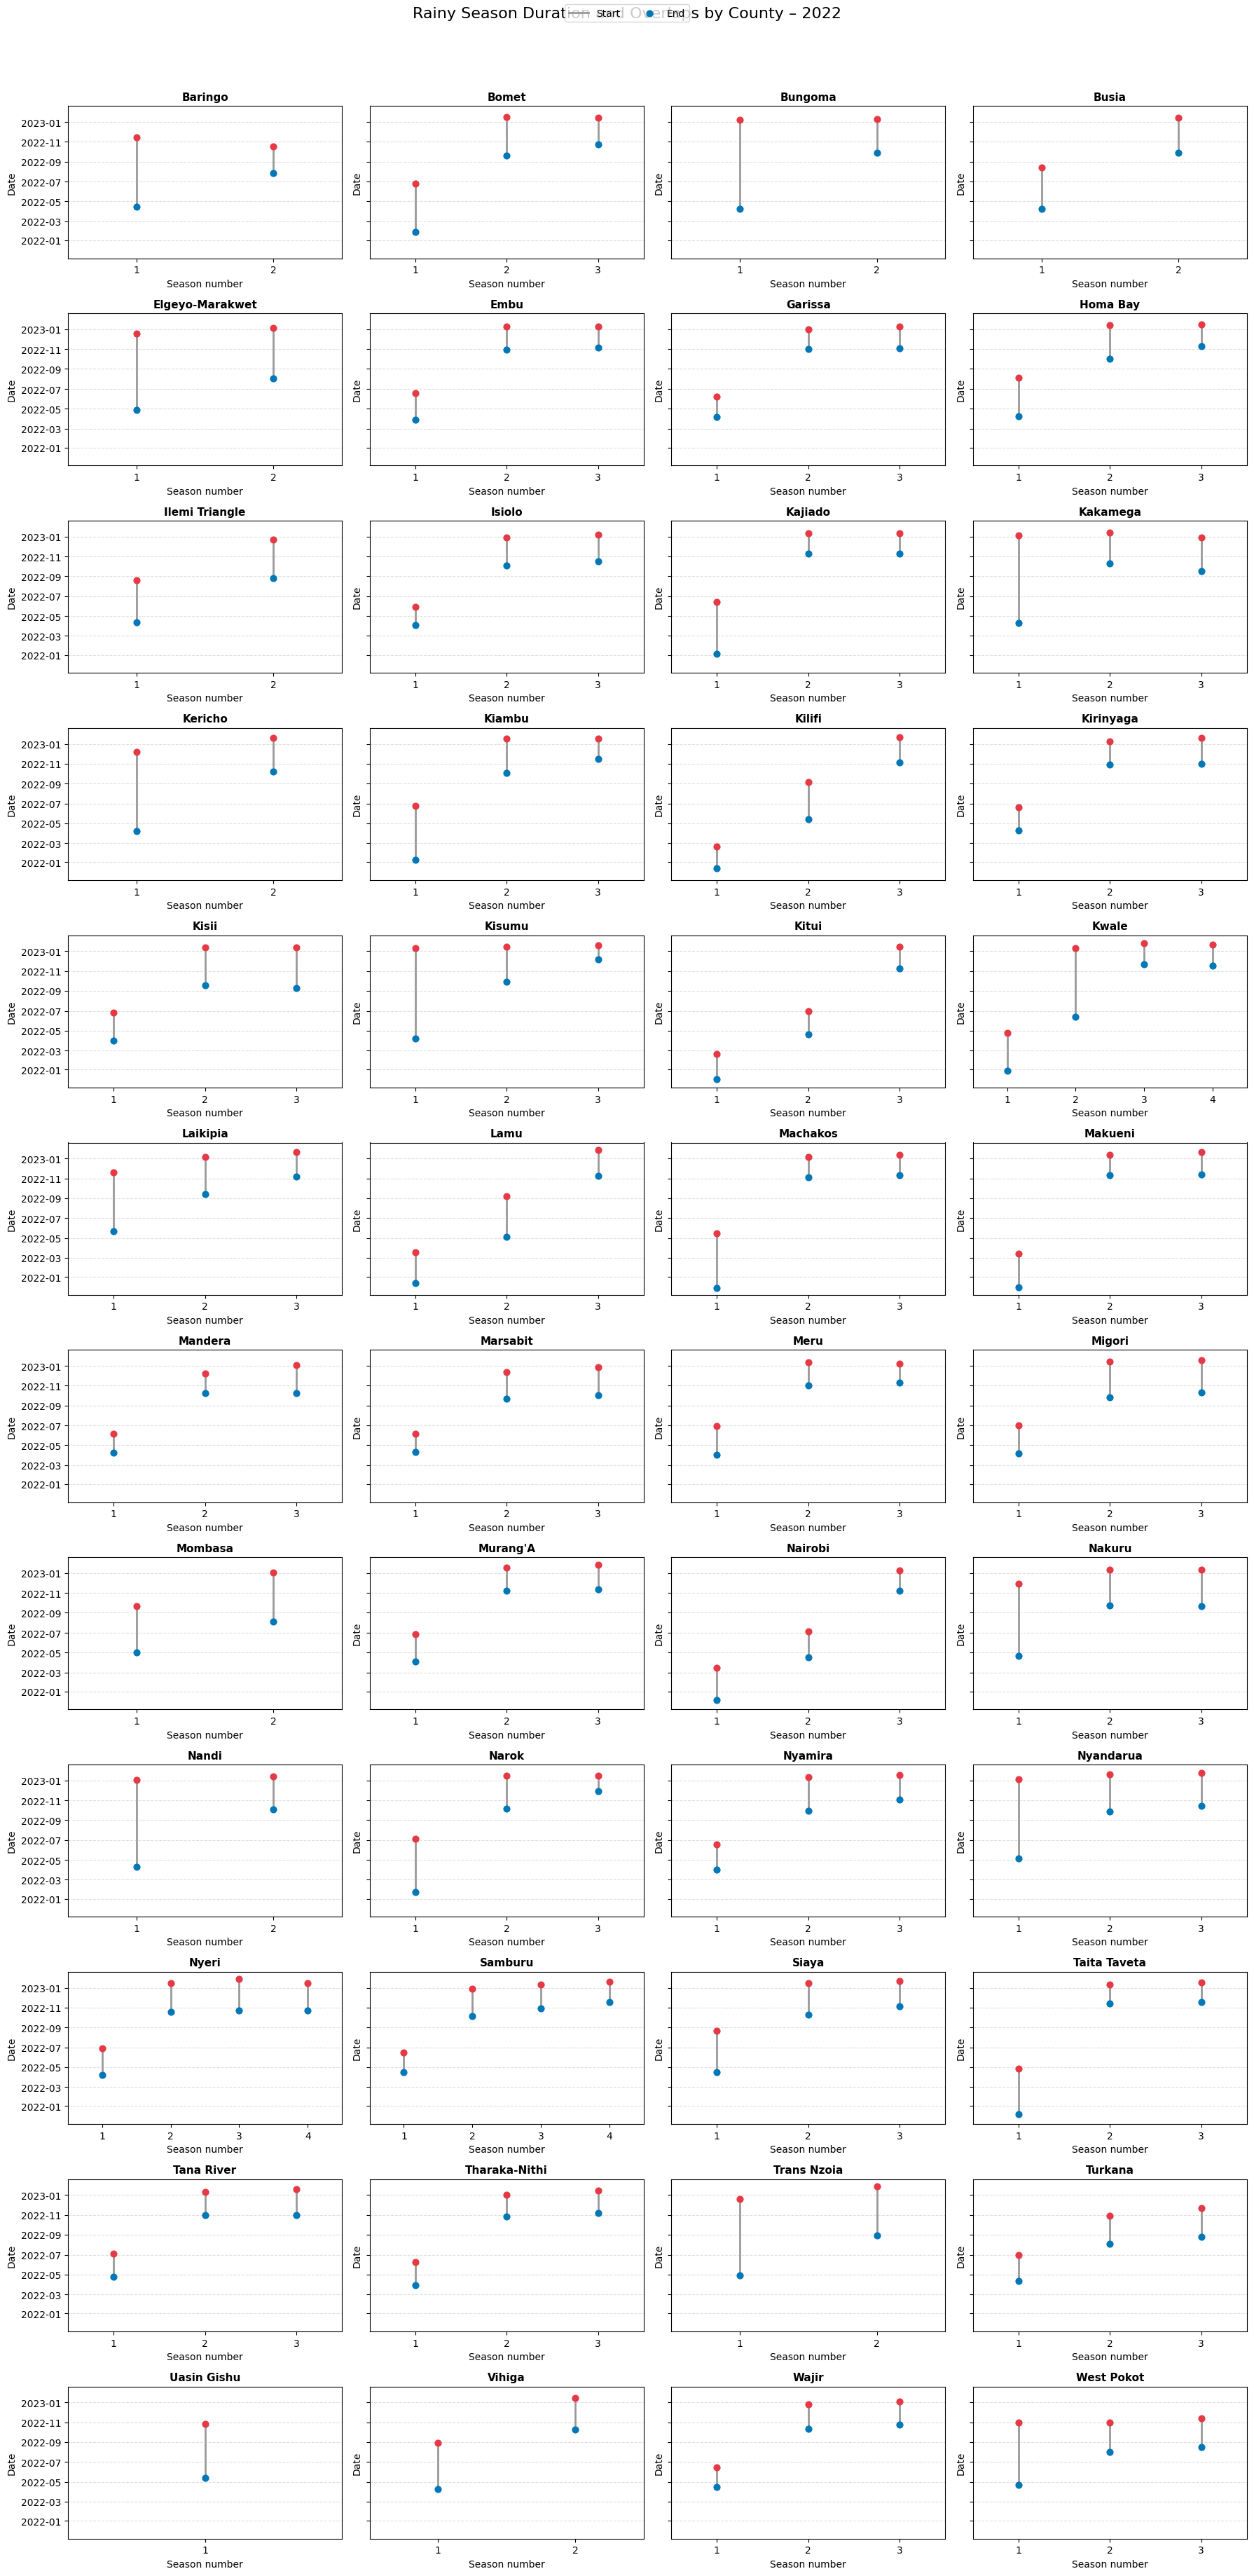

In [146]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# --- 1️⃣ Filtrer pour l'année choisie ---
year_target = 2022
df_year = data_median_sos_eos[data_median_sos_eos["season_yr"] == year_target].copy()

# --- 2️⃣ Préparer la grille de sous-graphiques ---
counties = sorted(df_year["admin1_name"].unique())
cols = 4
rows = math.ceil(len(counties) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3), sharey=True)
axes = axes.flatten()

# --- 3️⃣ Boucle sur chaque comté ---
for i, county in enumerate(counties):
    ax = axes[i]
    subset = df_year[df_year["admin1_name"] == county]

    # Tracer chaque saison comme un segment vertical
    for _, row in subset.iterrows():
        ax.plot(
            [row["season_num"], row["season_num"]],
            [row["DER.sos"], row["DER.eos"]],
            color="#999", linewidth=2, zorder=1
        )

        # Points de début et fin
        ax.scatter(row["season_num"], row["DER.sos"], color="#0077b6", s=40, label="Start" if i == 0 else "", zorder=2)
        ax.scatter(row["season_num"], row["DER.eos"], color="#e63946", s=40, label="End" if i == 0 else "", zorder=2)

    # Mise en forme
    ax.set_title(county, fontsize=11, fontweight="bold")
    ax.set_xlabel("Season number")
    ax.set_ylabel("Date")
    ax.set_xticks(sorted(subset["season_num"].unique()))
    ax.set_xlim(0.5, subset["season_num"].max() + 0.5)
    ax.grid(axis="y", linestyle="--", alpha=0.4)

# --- 4️⃣ Supprimer les cases vides ---
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# --- 5️⃣ Ajustements globaux ---
fig.suptitle(f"Rainy Season Duration and Overlaps by County – {year_target}", fontsize=16, y=1.02)
fig.legend(["Start", "End"], loc="upper center", ncol=2)
plt.tight_layout()
plt.show()


In [10]:
# Vérifier qu’il n’y a plus de chevauchement
def verifier_chevauchement(df):
    chevauchements = []
    for (county, year), group in df.groupby(["admin1_name", "season_yr"], sort=False):
        group_sorted = group.sort_values("DER.sos")
        for i in range(len(group_sorted) - 1):
            if group_sorted.iloc[i]["DER.eos"] > group_sorted.iloc[i + 1]["DER.sos"]:
                chevauchements.append((county, year))
    return len(chevauchements), chevauchements[:10]

In [ ]:
nb_chev, exemples = verifier_chevauchement(data_median_sos_eos)
print(f"Nombre de cas de chevauchement après correction : {nb_chev}")
print("Exemples :", exemples)


Nombre de cas de chevauchement après correction : 725
Exemples : [('Baringo', np.int64(2000)), ('Baringo', np.int64(2001)), ('Baringo', np.int64(2001)), ('Baringo', np.int64(2003)), ('Baringo', np.int64(2004)), ('Baringo', np.int64(2004)), ('Baringo', np.int64(2005)), ('Baringo', np.int64(2006)), ('Baringo', np.int64(2007)), ('Baringo', np.int64(2008))]


**Régler le problème de chevauchement** : Corriger les chevauchements entre saisons (1 à 4) au niveau de chaque comté et année, selon deux cas précis :

Cas 1 — Fusion (chevauchement fort : 35 à 100 %)

- Si deux saisons se chevauchent fortement (chevauchement ≥ 35 % de la durée de la plus courte des deux saisons),
alors → on les fusionne en une seule :

- La nouvelle saison commence au minimum des deux débuts,

- Et se termine au maximum des deux fins,

On conserve la saison ayant le numéro le plus petit (par ex. fusion 1+2 → devient saison 1).


Cas 2 — Ajustement léger (chevauchement < 35 %)

- Si deux saisons se chevauchent légèrement, alors → on garde les deux, mais on :

Coupe la saison la plus ancienne à la date de début de la suivante,
(autrement dit : DER.eos = DER.sos_suivant).

In [7]:
def corriger_chevauchements_global(df, seuil_fusion=0.35):
    """
    Corrects overlapping rainy seasons in a phenology dataset, handling both direct and indirect overlaps
    (e.g., season 1 overlaps with 2, and 2 overlaps with 3). This ensures temporal consistency in seasonal
    start (DER.sos) and end (DER.eos) dates within each county and year.

    The algorithm identifies and resolves overlaps through two main mechanisms:
    
    1. **Strong Overlap (Fusion Rule)**:
       - If the temporal overlap between two consecutive seasons represents at least `seuil_fusion` 
         (default: 35%) of the duration of the shorter season, both are considered to belong to the 
         same climatic cycle.
       - The two seasons are merged into a single continuous one:
           * Start date = minimum of both DER.sos values
           * End date = maximum of both DER.eos values
       - The resulting merged season inherits the lowest season number of the two.

    2. **Light Overlap (Adjustment Rule)**:
       - If the overlap exists but is smaller than `seuil_fusion`:
           * The two seasons remain distinct.
           * The end date (DER.eos) of the earlier season is truncated to the start date (DER.sos)
             of the following season to eliminate the overlap.

    The function also handles **indirect or cascading overlaps**:
    - If several consecutive seasons (e.g., 1, 2, and 3) partially overlap with each other,
      they are progressively merged into one continuous season.
    - This prevents residual overlaps that could occur if only consecutive pairs were compared.

    Parameters
    ----------
    df : pandas.DataFrame
        The input DataFrame containing at least the following columns:
        - 'admin1_name': County or administrative region name.
        - 'season_yr': Year of the season.
        - 'season_num': Integer identifier of the season within that year (1, 2, 3, or 4).
        - 'DER.sos': Start date of the season (as datetime).
        - 'DER.eos': End date of the season (as datetime).

    seuil_fusion : float, optional, default=0.35
        Threshold defining the minimum ratio of overlap (relative to the shortest season)
        required to trigger a complete merge between two seasons.

    Returns
    -------
    pandas.DataFrame
        A cleaned DataFrame containing non-overlapping, chronologically consistent seasons.
        The returned dataset preserves:
        - One or more valid seasons per county and year.
        - No cases where DER.eos < DER.sos.
        - No temporal overlap between consecutive or cascading seasons.

    Notes
    -----
    * The correction operates independently for each (county, year) pair.
    * The function assumes all dates are valid pandas datetime objects.
    * Overlap ratio is computed as:
        overlap_days / min(duration_current, duration_next)
      where `overlap_days` = (min(eos_current, eos_next) - max(sos_current, sos_next)).
    * The function is designed for iterative or batch processing of national-scale phenology data
      derived from remote sensing (e.g., GLASS NDVI seasonal cycles).

    Example
    -------
    >>> corrected = corriger_chevauchements_global(data_median_sos_eos)
    >>> len(corrected)
    580000
    >>> # Validate that no overlaps remain
    >>> check_overlap(corrected)
    0
    """
    corrected_rows = []

    for (county, year), group in df.groupby(["admin1_name", "season_yr"], sort=False):
        group_sorted = group.sort_values("DER.sos").reset_index(drop=True)

        # Liste temporaire pour stocker les fusions successives
        merged_seasons = []
        current_start = None
        current_end = None
        current_num = None

        for _, row in group_sorted.iterrows():
            sos = row["DER.sos"]
            eos = row["DER.eos"]
            season_num = row["season_num"]

            # Première saison
            if current_start is None:
                current_start, current_end, current_num = sos, eos, season_num
                continue

            # Cas de chevauchement
            if sos <= current_end:
                # Durées et chevauchement
                overlap_days = (current_end - sos).days
                len_current = (current_end - current_start).days
                len_next = (eos - sos).days
                overlap_ratio = overlap_days / min(len_current, len_next) if overlap_days > 0 else 0

                if overlap_ratio >= seuil_fusion:
                    # Fusionner complètement
                    current_end = max(current_end, eos)
                elif 0 < overlap_ratio < seuil_fusion:
                    # Tronquer légèrement
                    current_end = sos
                else:
                    pass  # chevauchement nul ou négatif
            else:
                # Pas de chevauchement → on ajoute la saison précédente et on démarre une nouvelle
                merged_seasons.append({
                    "admin1_name": county,
                    "season_yr": year,
                    "season_num": current_num,
                    "DER.sos": current_start,
                    "DER.eos": current_end
                })
                current_start, current_end, current_num = sos, eos, season_num

        # Ajouter la dernière saison
        if current_start is not None:
            merged_seasons.append({
                "admin1_name": county,
                "season_yr": year,
                "season_num": current_num,
                "DER.sos": current_start,
                "DER.eos": current_end
            })

        corrected_rows.extend(merged_seasons)

    return pd.DataFrame(corrected_rows).reset_index(drop=True)


In [8]:
data_median_sos_eos_corrected = corriger_chevauchements_global(data_median_sos_eos)


In [11]:
nb_chev, exemples = verifier_chevauchement(data_median_sos_eos_corrected)
print(f"Nombre de cas de chevauchement après correction : {nb_chev}")
print("Exemples :", exemples)


Nombre de cas de chevauchement après correction : 0
Exemples : []


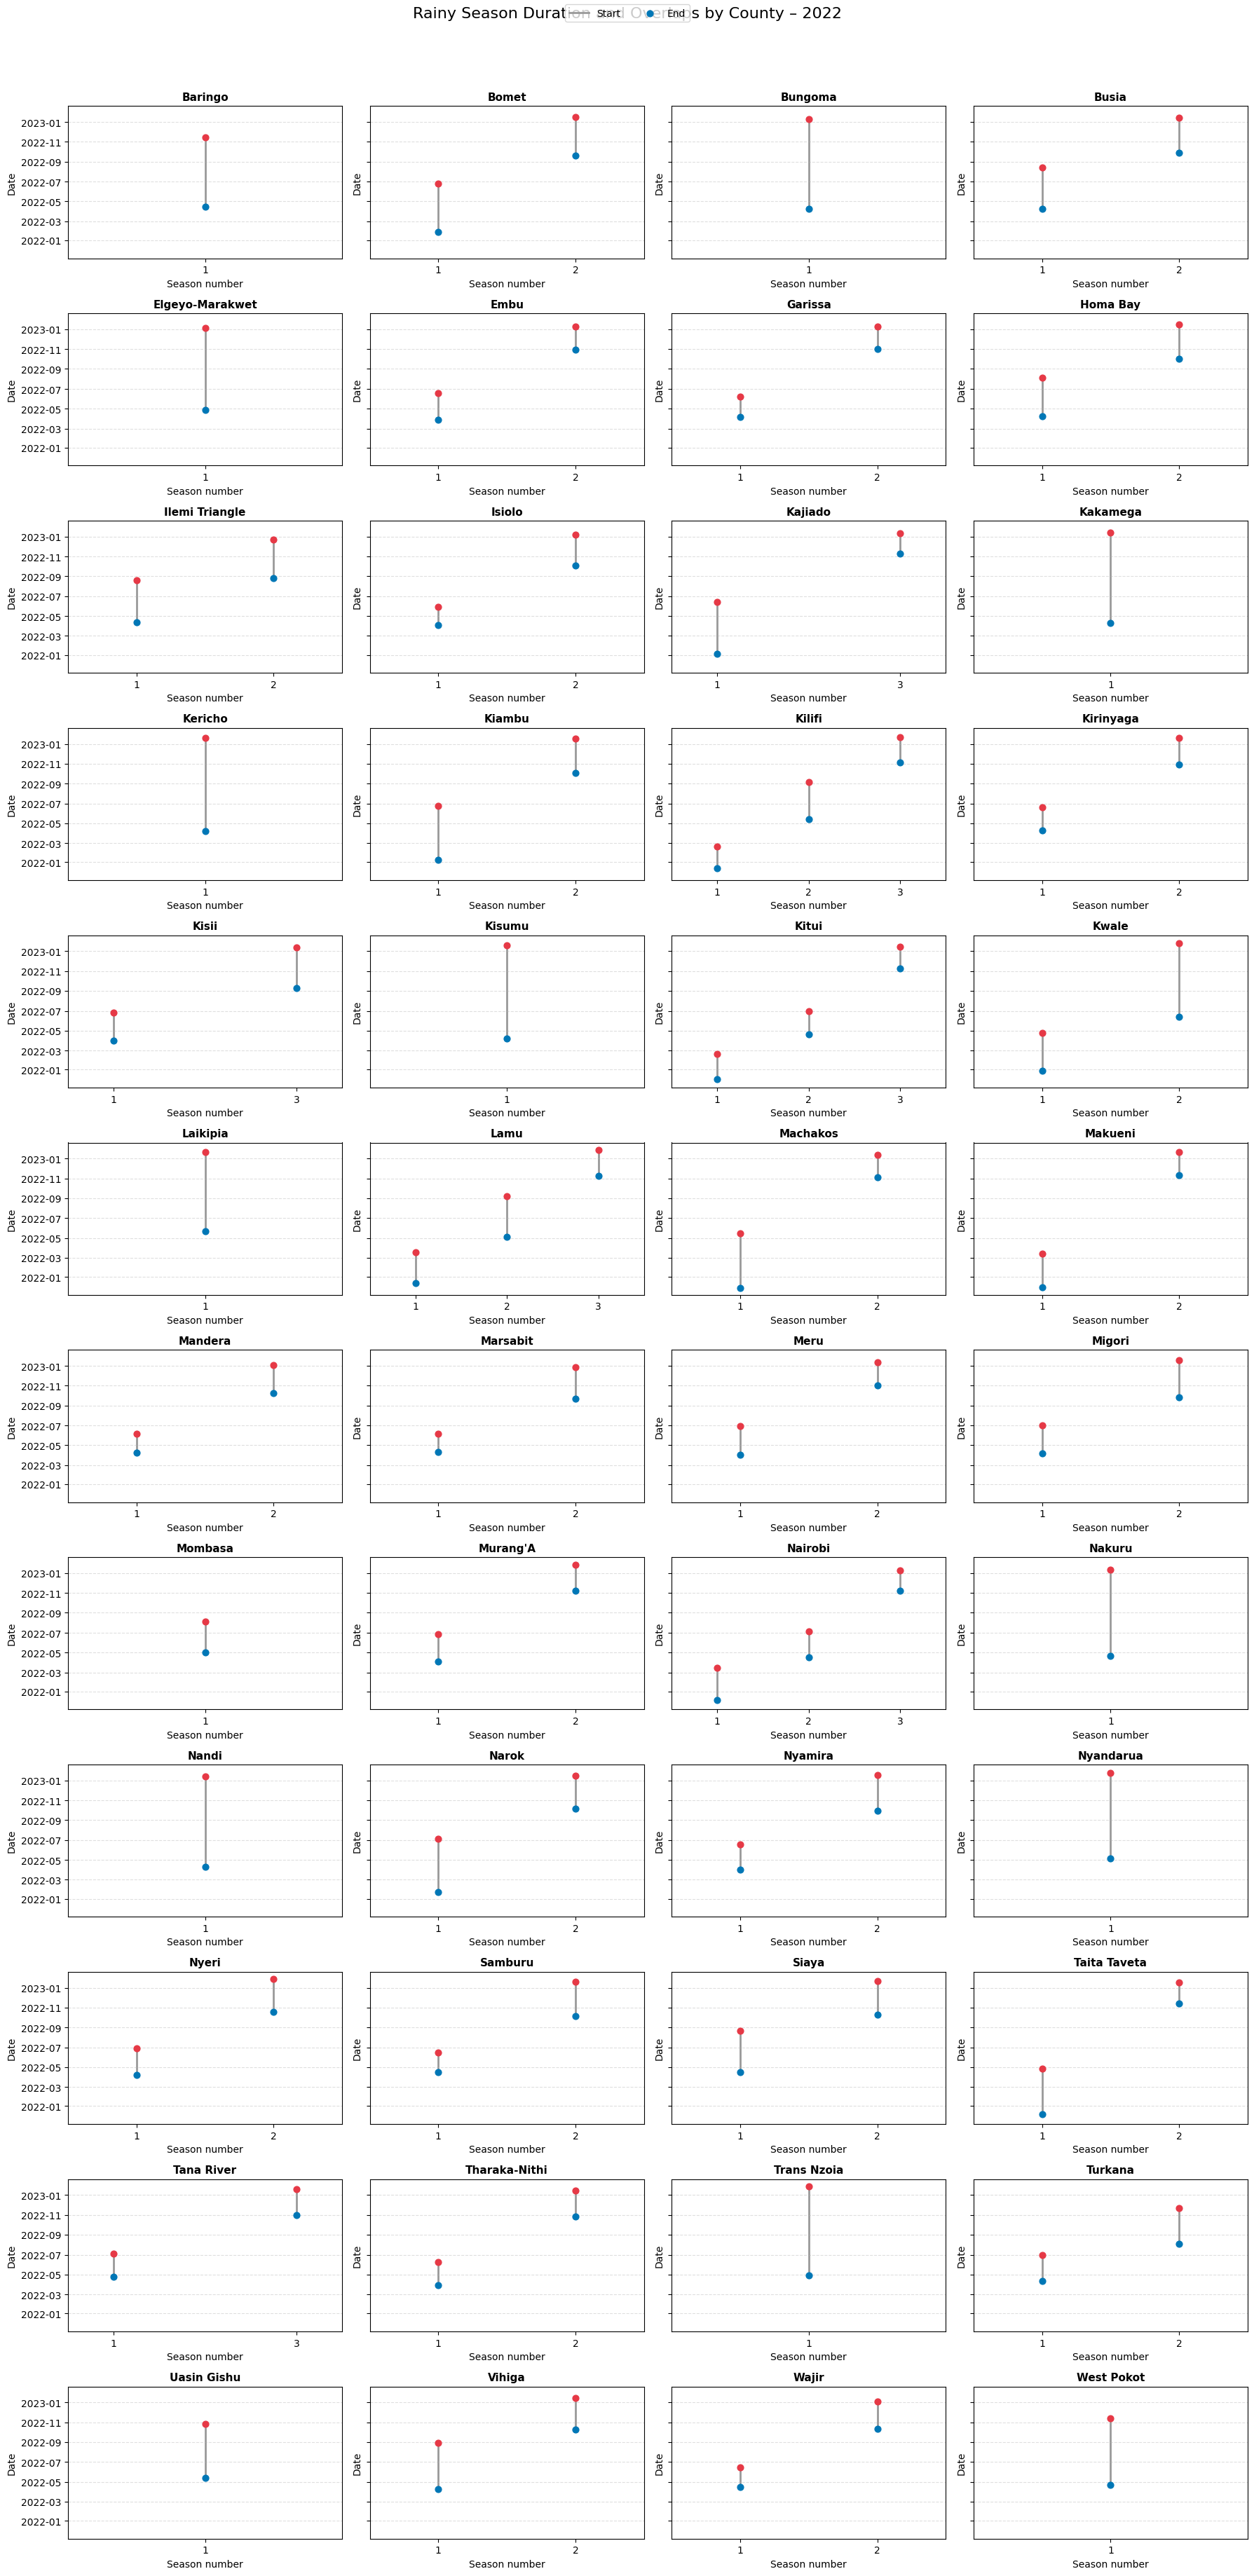

In [153]:
# --- 1️⃣ Filtrer pour l'année choisie ---
year_target = 2022
df_year = data_median_sos_eos_corrected[data_median_sos_eos_corrected["season_yr"] == year_target].copy()

# --- 2️⃣ Préparer la grille de sous-graphiques ---
counties = sorted(df_year["admin1_name"].unique())
cols = 4
rows = math.ceil(len(counties) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3), sharey=True)
axes = axes.flatten()

# --- 3️⃣ Boucle sur chaque comté ---
for i, county in enumerate(counties):
    ax = axes[i]
    subset = df_year[df_year["admin1_name"] == county]

    # Tracer chaque saison comme un segment vertical
    for _, row in subset.iterrows():
        ax.plot(
            [row["season_num"], row["season_num"]],
            [row["DER.sos"], row["DER.eos"]],
            color="#999", linewidth=2, zorder=1
        )

        # Points de début et fin
        ax.scatter(row["season_num"], row["DER.sos"], color="#0077b6", s=40, label="Start" if i == 0 else "", zorder=2)
        ax.scatter(row["season_num"], row["DER.eos"], color="#e63946", s=40, label="End" if i == 0 else "", zorder=2)

    # Mise en forme
    ax.set_title(county, fontsize=11, fontweight="bold")
    ax.set_xlabel("Season number")
    ax.set_ylabel("Date")
    ax.set_xticks(sorted(subset["season_num"].unique()))
    ax.set_xlim(0.5, subset["season_num"].max() + 0.5)
    ax.grid(axis="y", linestyle="--", alpha=0.4)

# --- 4️⃣ Supprimer les cases vides ---
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# --- 5️⃣ Ajustements globaux ---
fig.suptitle(f"Rainy Season Duration and Overlaps by County – {year_target}", fontsize=16, y=1.02)
fig.legend(["Start", "End"], loc="upper center", ncol=2)
plt.tight_layout()
plt.show()


In [154]:
data_median_sos_eos_corrected

admin1_name  season_yr  season_num             DER.sos  \
0        Baringo       2000           1 2000-06-19 12:00:00   
1        Baringo       2001           1 2001-04-05 12:00:00   
2        Baringo       2002           1 2002-04-05 00:00:00   
3        Baringo       2002           2 2002-11-04 00:00:00   
4        Baringo       2003           1 2002-12-14 00:00:00   
...          ...        ...         ...                 ...   
2065  West Pokot       2021           1 2021-04-13 00:00:00   
2066  West Pokot       2022           1 2022-04-21 00:00:00   
2067  West Pokot       2023           1 2023-03-26 00:00:00   
2068  West Pokot       2023           2 2023-10-03 00:00:00   
2069  West Pokot       2024           1 2024-04-03 00:00:00   

                 DER.eos  
0    2000-12-27 00:00:00  
1    2002-02-05 00:00:00  
2    2002-07-31 00:00:00  
3    2003-01-29 00:00:00  
4    2003-02-15 00:00:00  
...                  ...  
2065 2021-11-17 00:00:00  
2066 2022-11-14 00:00:00  
2067 2023-08-03 12:00:00  
2068 2023-12-20 00:00:00  
2069 2024-12-04 00:00:00  

[2070 rows x 5 columns]

In [ ]:
# Vérifions la cohérence après correction
mask_anomalies_med = data_median_sos_eos_corrected["DER.eos"] < data_median_sos_eos_corrected["DER.sos"]
anomalies_med = data_median_sos_eos_corrected[mask_anomalies_med]
anomalies_med

Empty DataFrame
Columns: [admin1_name, season_yr, season_num, DER.sos, DER.eos]
Index: []

Calcul de la durée de la saison 

In [12]:
data_median_sos_eos_corrected["season_length_days"] = (data_median_sos_eos_corrected["DER.eos"] - data_median_sos_eos_corrected["DER.sos"]).dt.days
data_median_sos_eos_corrected

admin1_name  season_yr  season_num             DER.sos  \
0        Baringo       2000           1 2000-06-19 12:00:00   
1        Baringo       2001           1 2001-04-05 12:00:00   
2        Baringo       2002           1 2002-04-05 00:00:00   
3        Baringo       2002           2 2002-11-04 00:00:00   
4        Baringo       2003           1 2002-12-14 00:00:00   
...          ...        ...         ...                 ...   
2065  West Pokot       2021           1 2021-04-13 00:00:00   
2066  West Pokot       2022           1 2022-04-21 00:00:00   
2067  West Pokot       2023           1 2023-03-26 00:00:00   
2068  West Pokot       2023           2 2023-10-03 00:00:00   
2069  West Pokot       2024           1 2024-04-03 00:00:00   

                 DER.eos  season_length_days  
0    2000-12-27 00:00:00                 190  
1    2002-02-05 00:00:00                 305  
2    2002-07-31 00:00:00                 117  
3    2003-01-29 00:00:00                  86  
4    2003-02-15 00:00:00                  63  
...                  ...                 ...  
2065 2021-11-17 00:00:00                 218  
2066 2022-11-14 00:00:00                 207  
2067 2023-08-03 12:00:00                 130  
2068 2023-12-20 00:00:00                  78  
2069 2024-12-04 00:00:00                 245  

[2070 rows x 6 columns]

In [13]:
data_median_sos_eos_corrected["season_length_days"].describe()

count    2070.000000
mean      124.498068
std        66.972548
min        38.000000
25%        79.000000
50%       101.000000
75%       140.000000
max       422.000000
Name: season_length_days, dtype: float64

C:\Users\KPS\AppData\Local\Temp\ipykernel_20204\1325517237.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


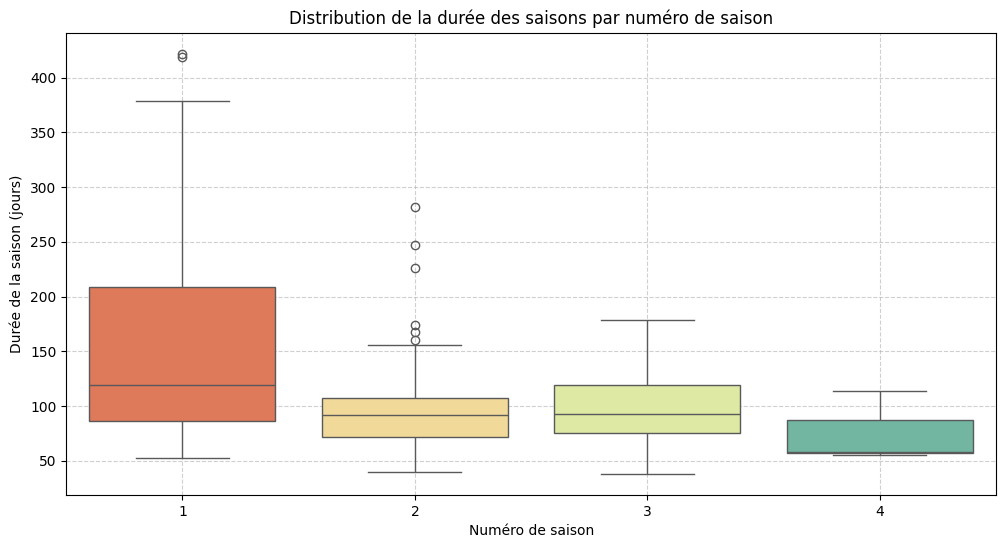

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.boxplot(
    data=data_median_sos_eos_corrected,
    x="season_num",
    y="season_length_days",
    palette="Spectral"
)

plt.title("Distribution de la durée des saisons par numéro de saison")
plt.xlabel("Numéro de saison")
plt.ylabel("Durée de la saison (jours)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


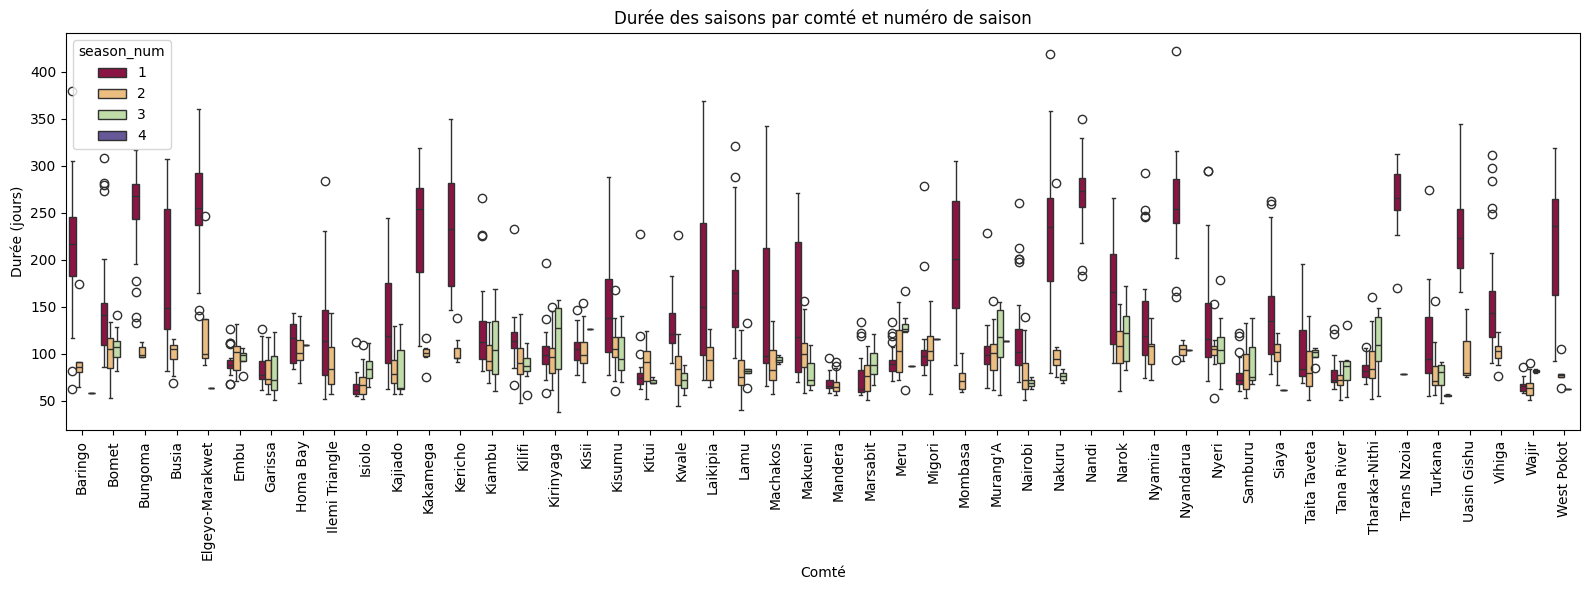

In [166]:
plt.figure(figsize=(16, 6))
sns.boxplot(
    data=data_median_sos_eos_corrected,
    x="admin1_name",
    y="season_length_days",
    hue="season_num",
    palette="Spectral"
)
plt.xticks(rotation=90)
plt.title("Durée des saisons par comté et numéro de saison")
plt.xlabel("Comté")
plt.ylabel("Durée (jours)")
plt.tight_layout()
plt.show()


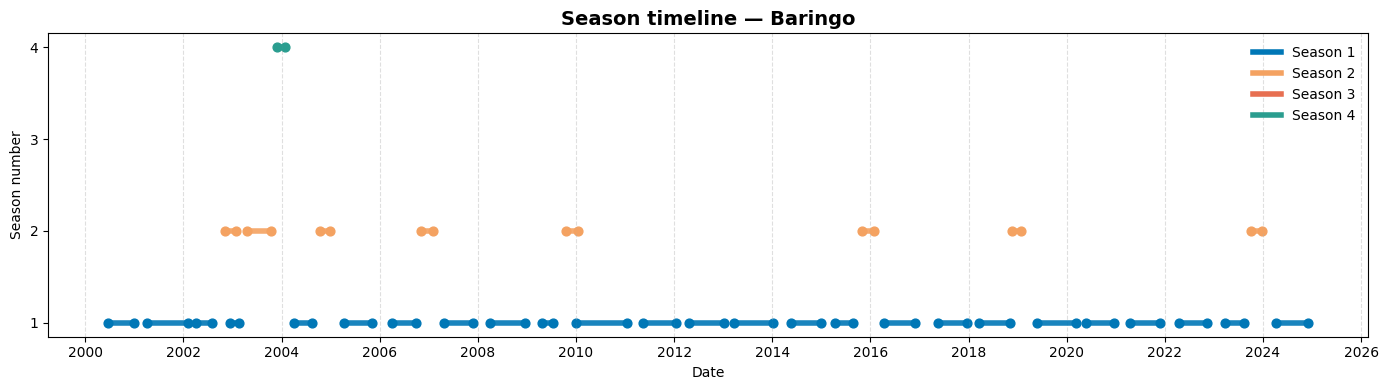

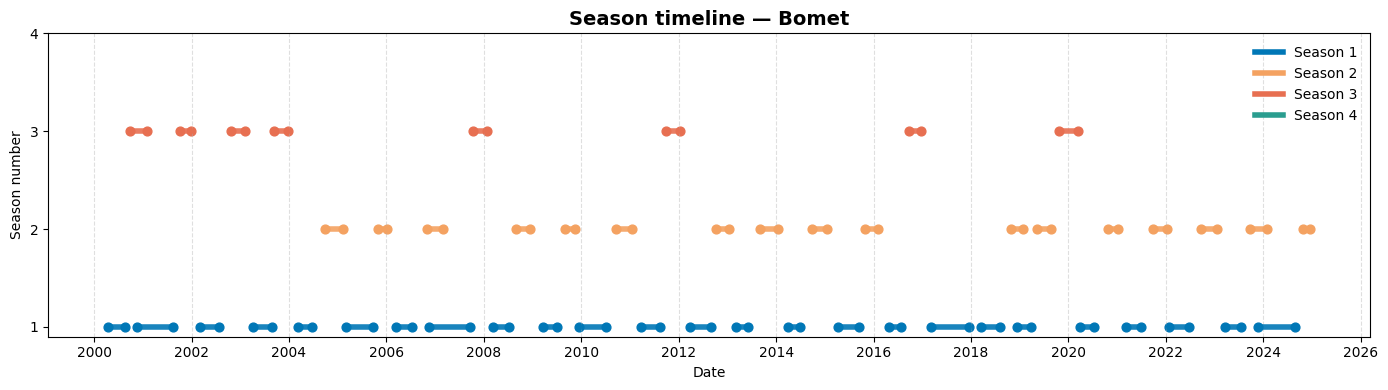

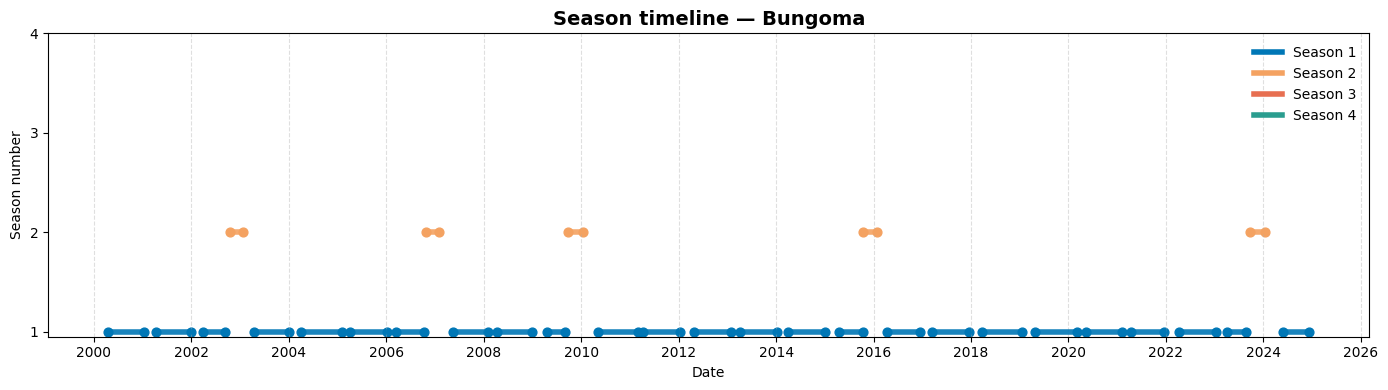

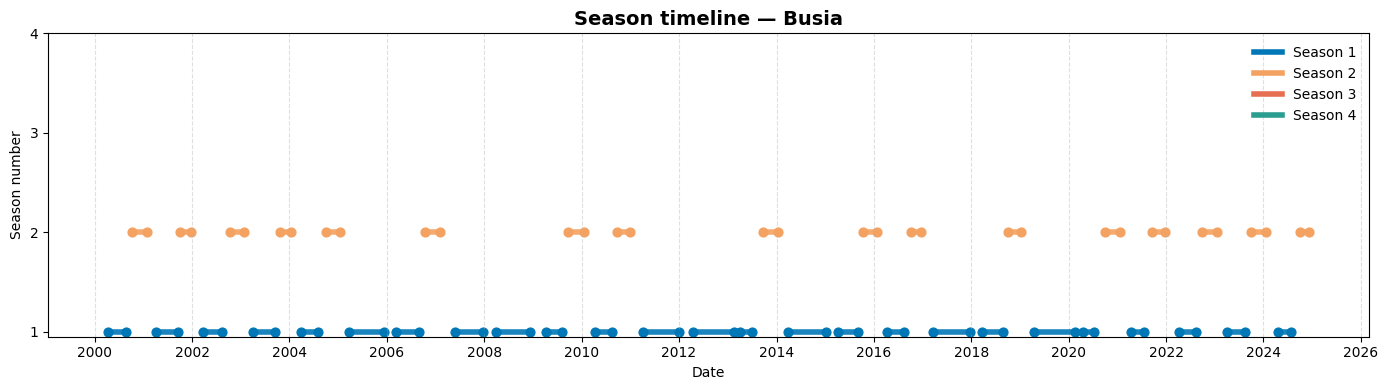

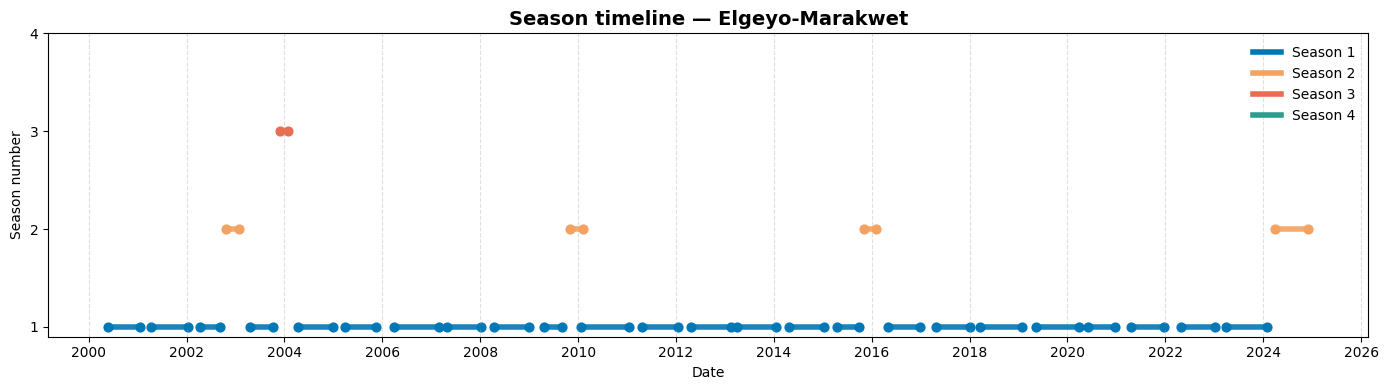

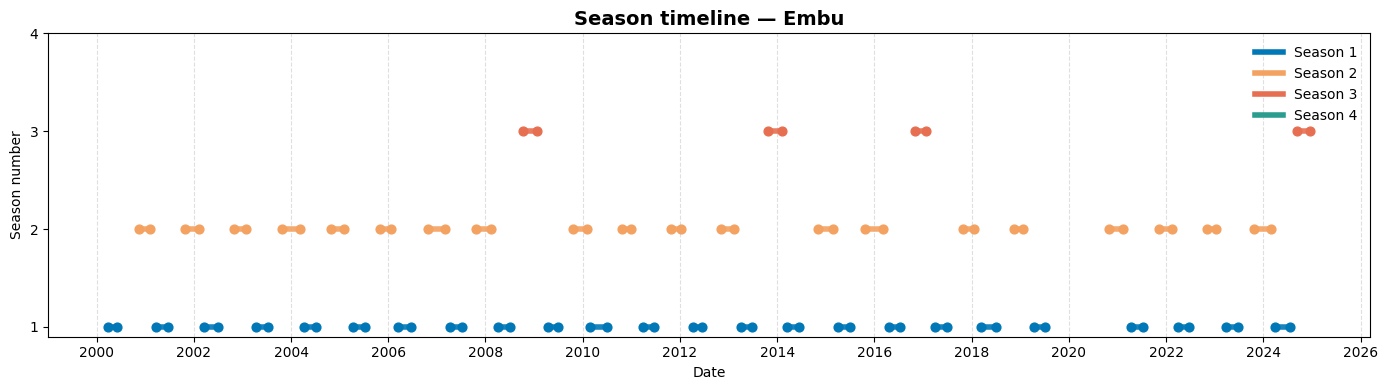

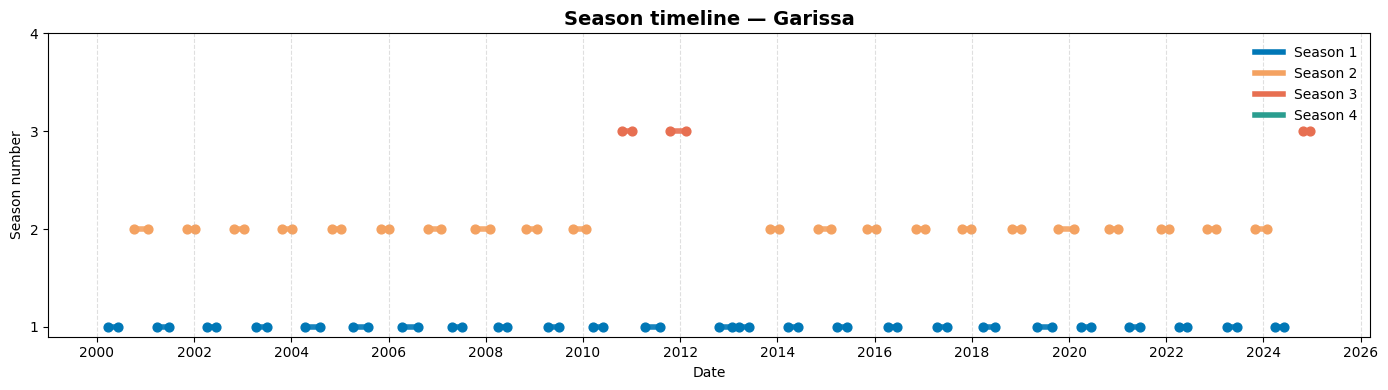

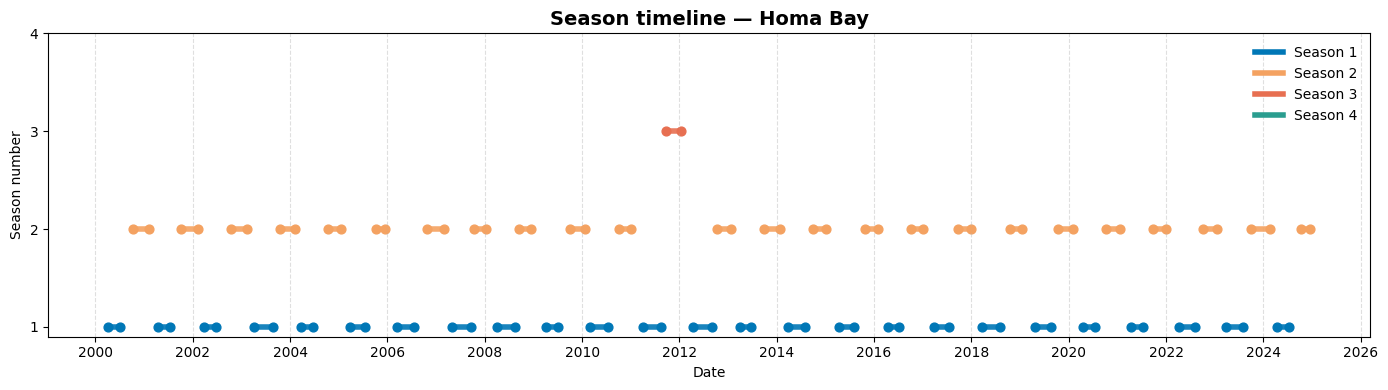

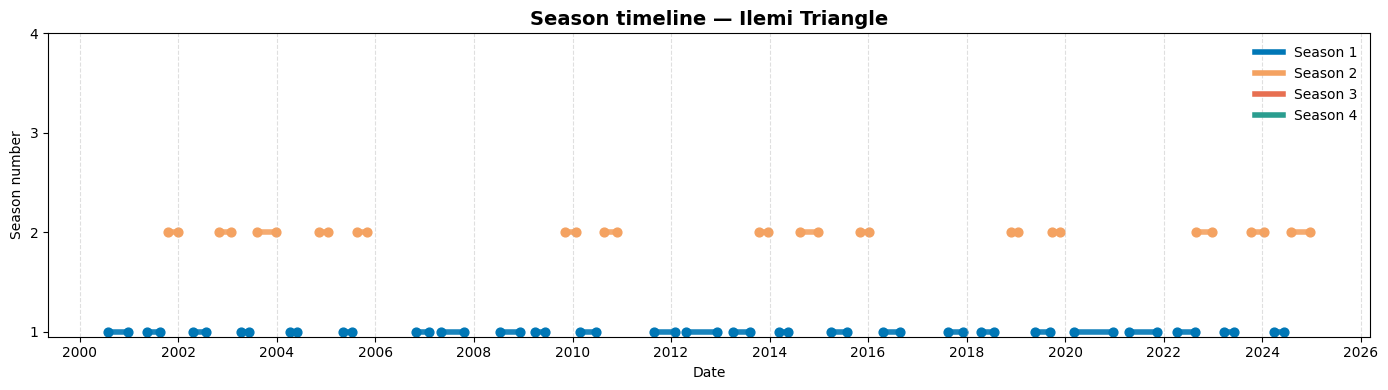

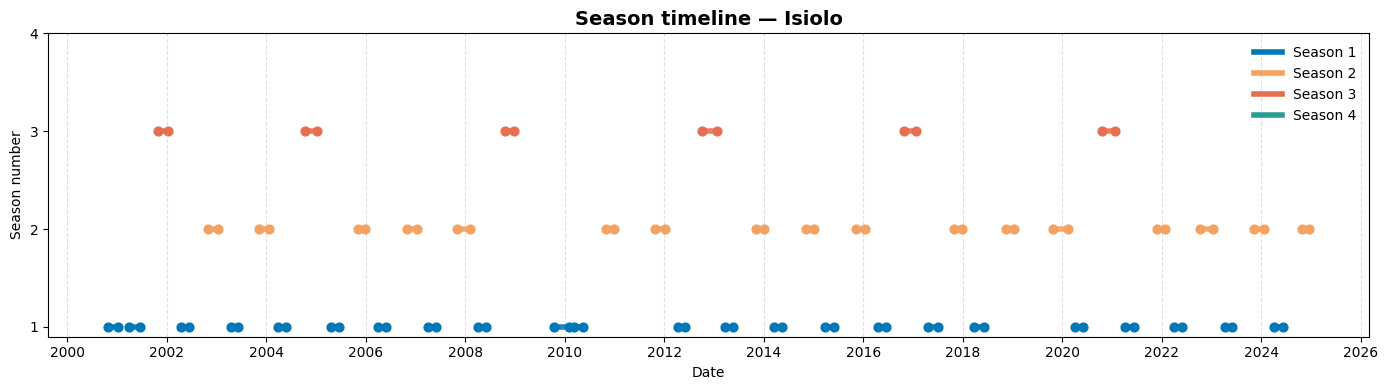

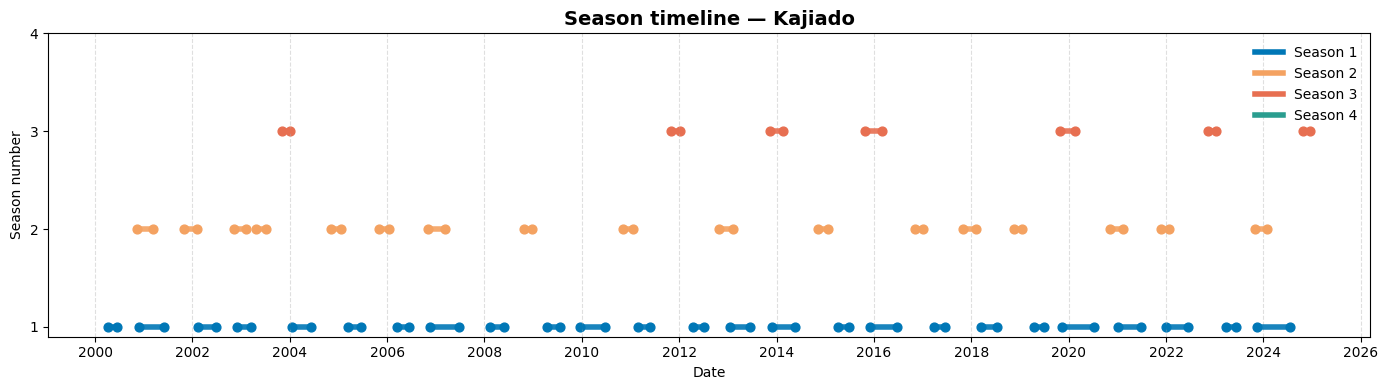

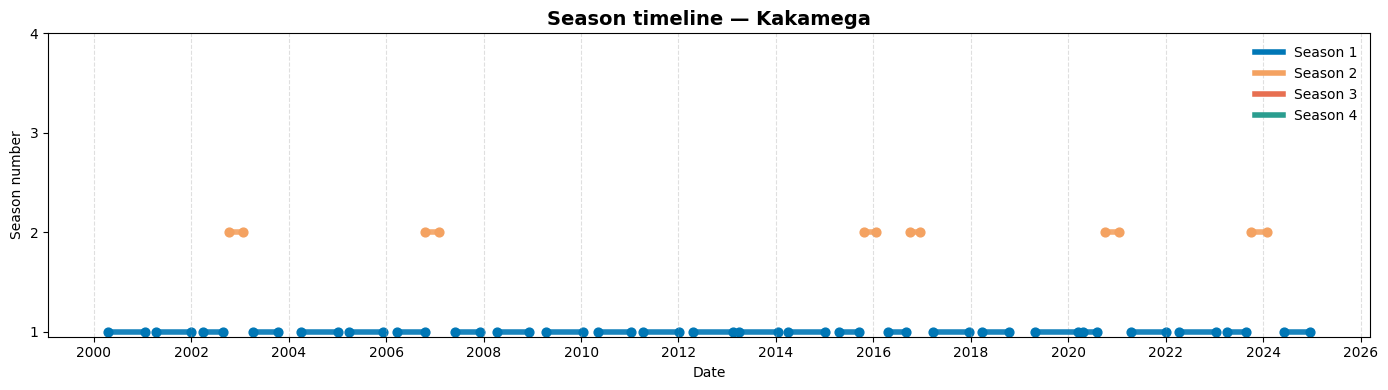

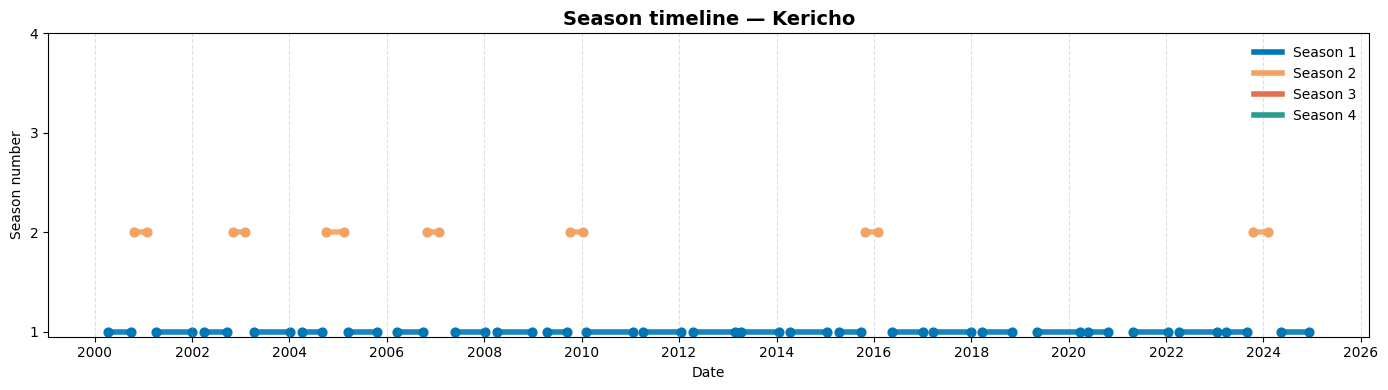

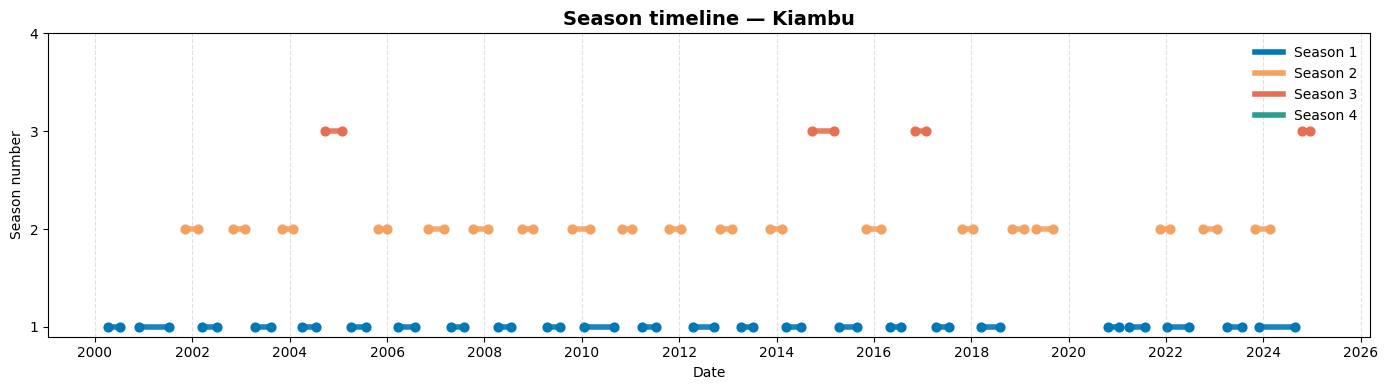

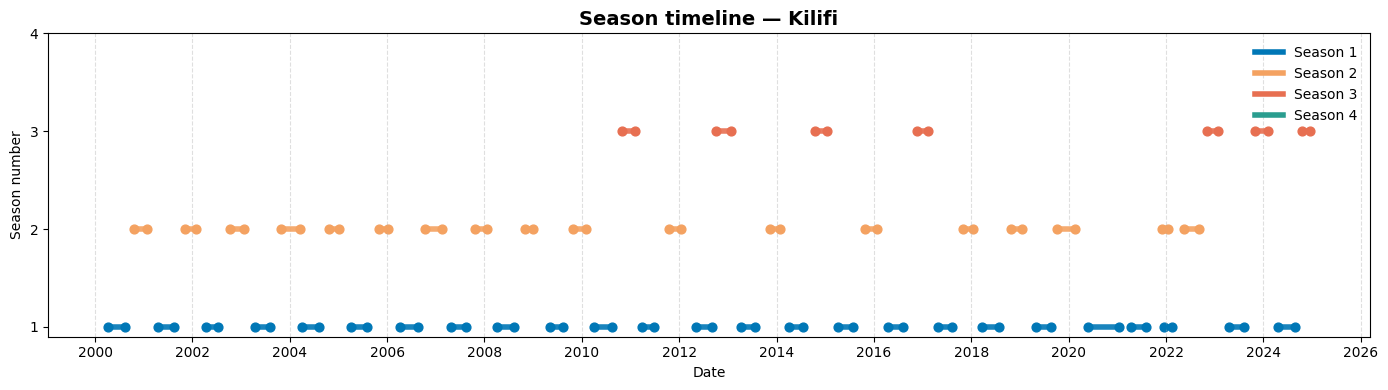

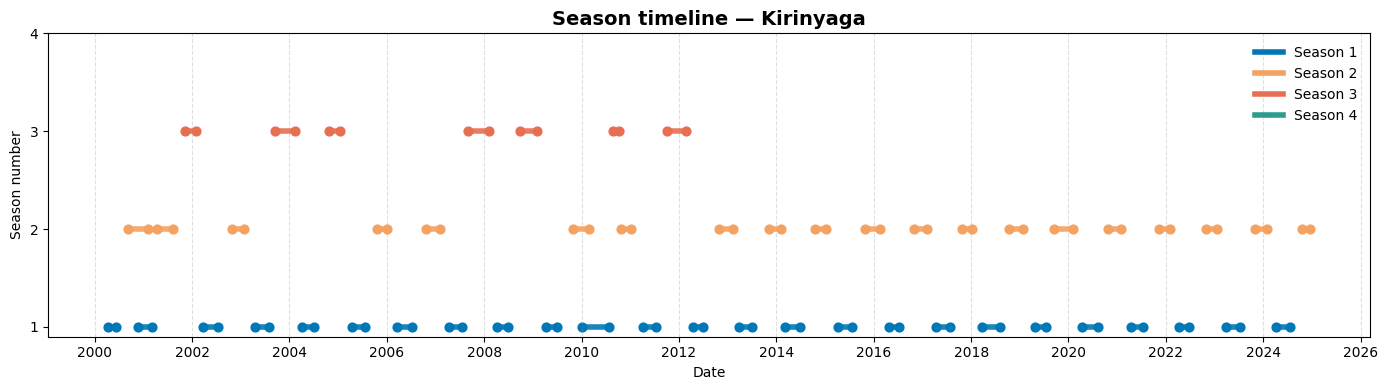

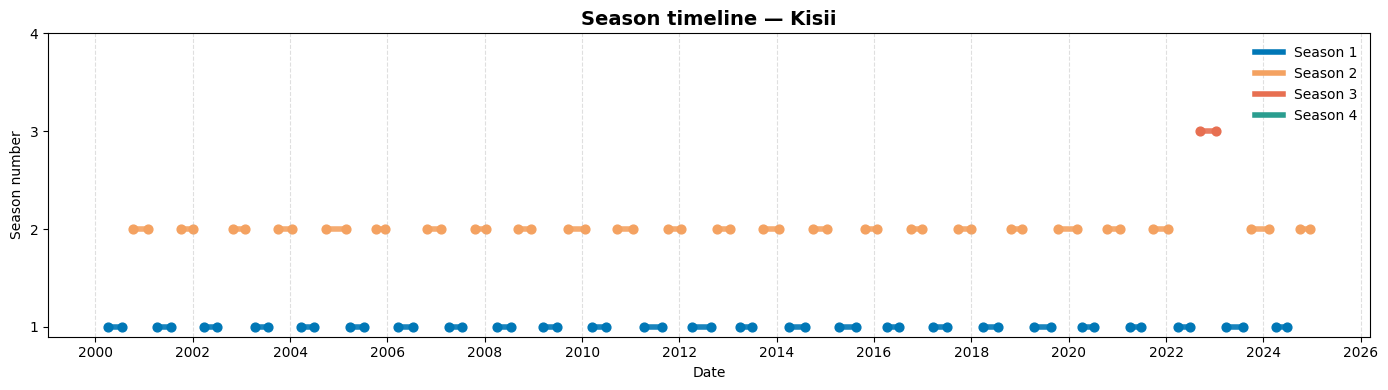

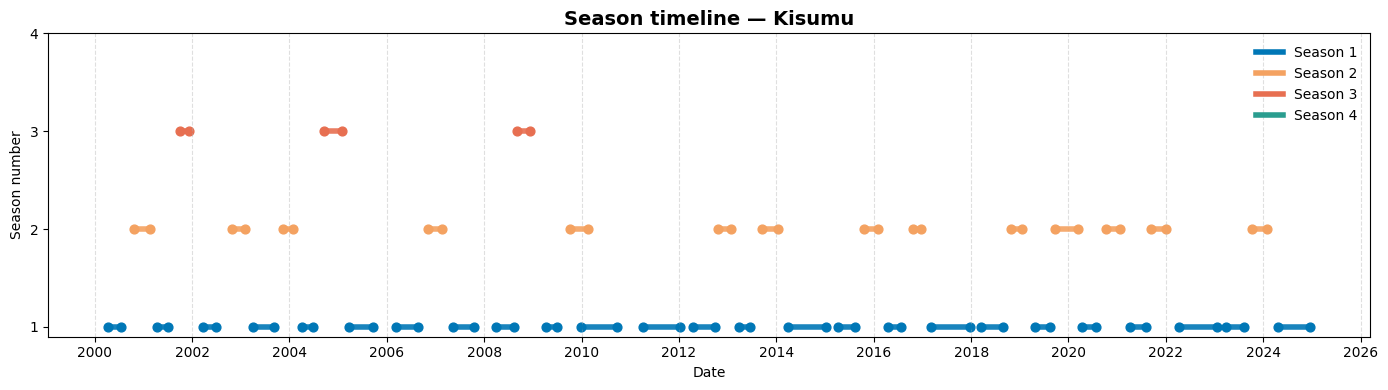

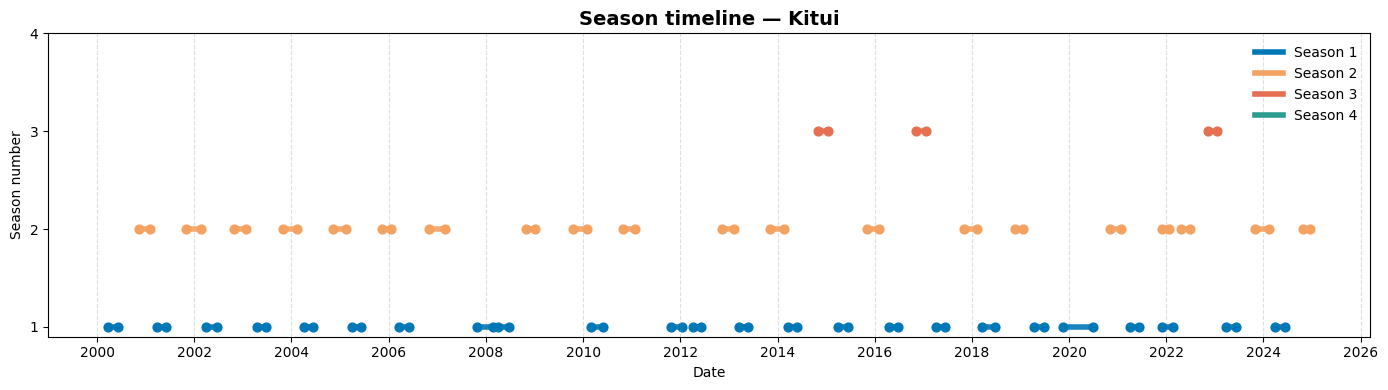

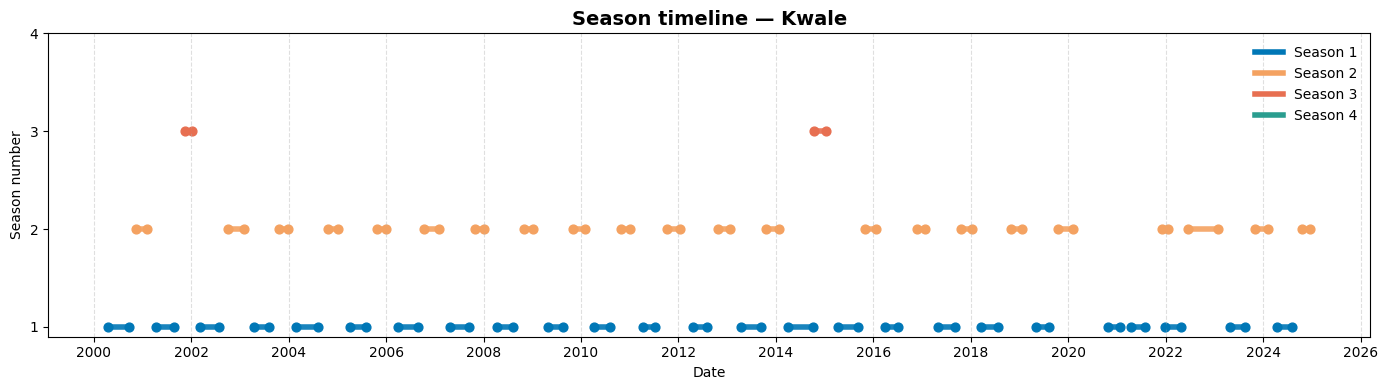

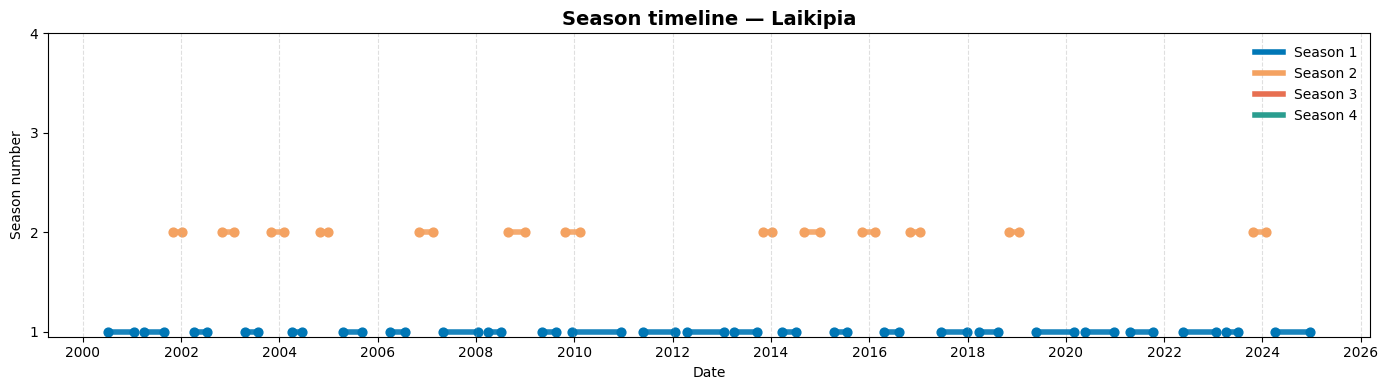

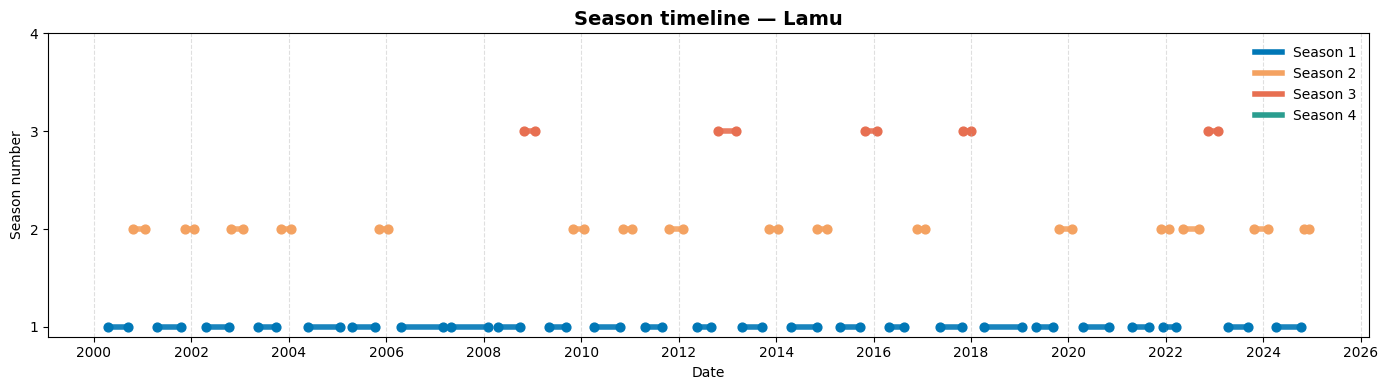

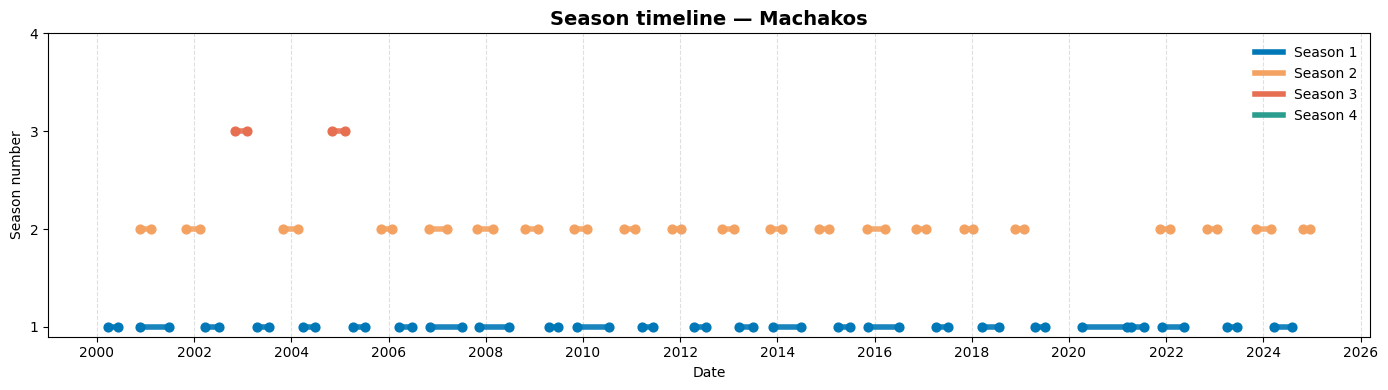

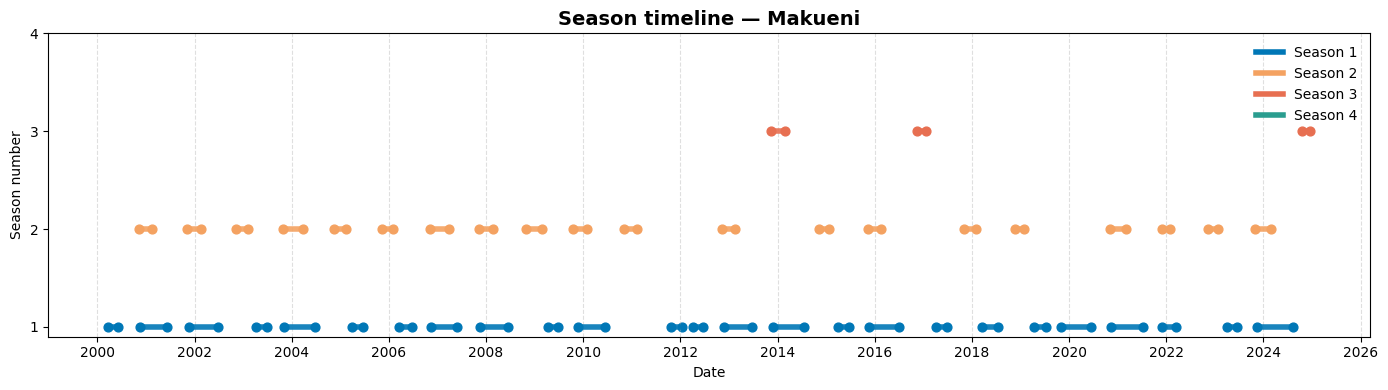

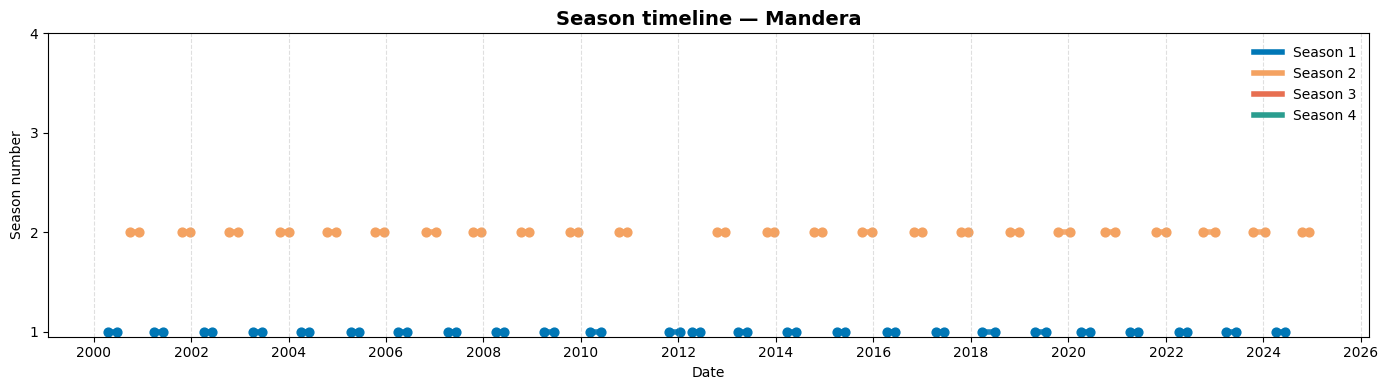

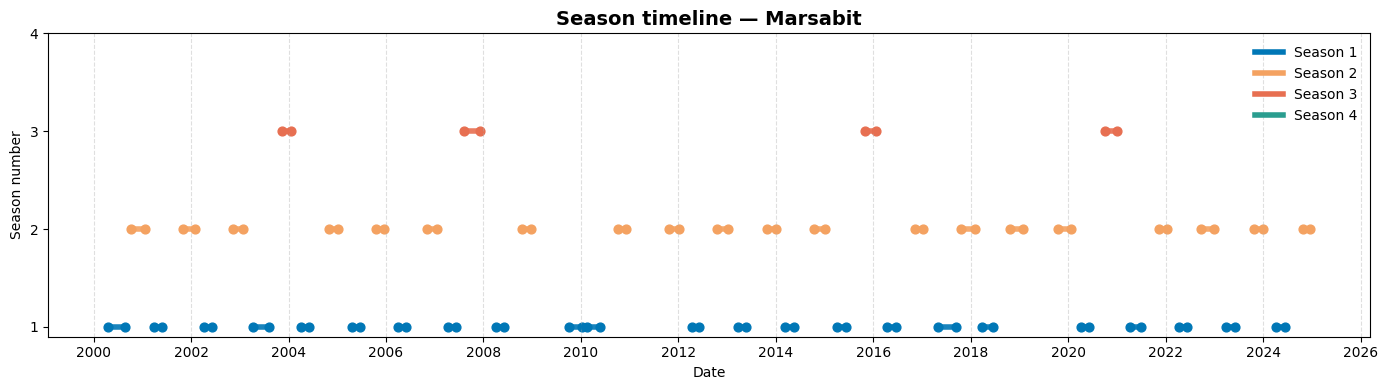

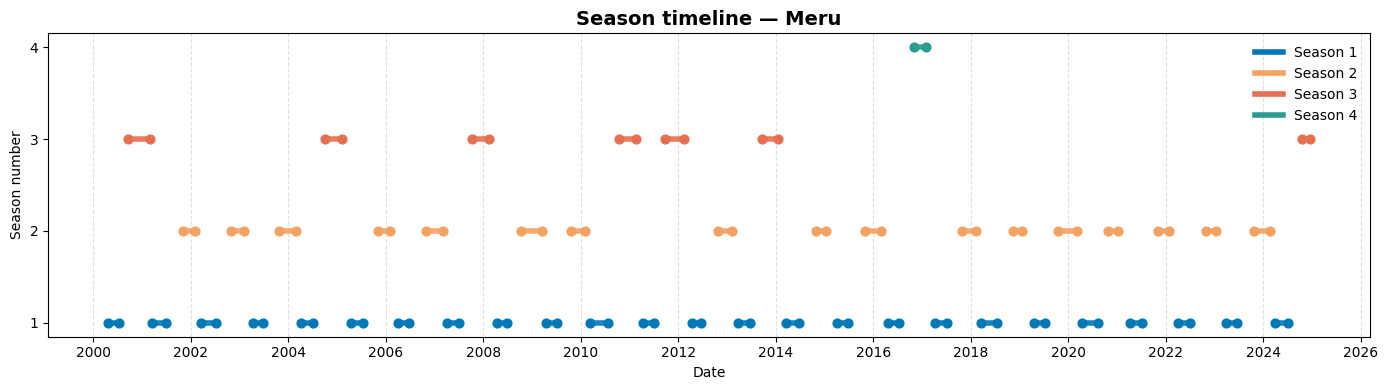

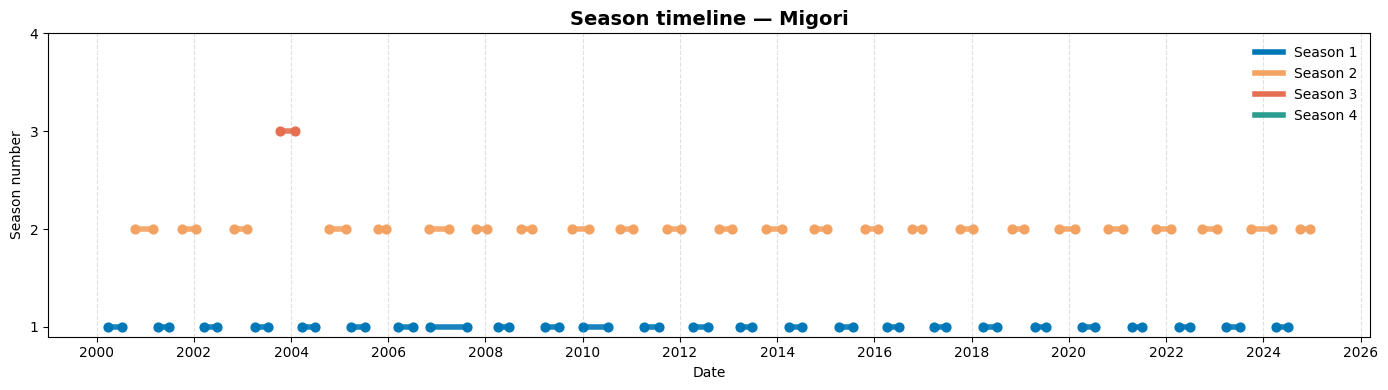

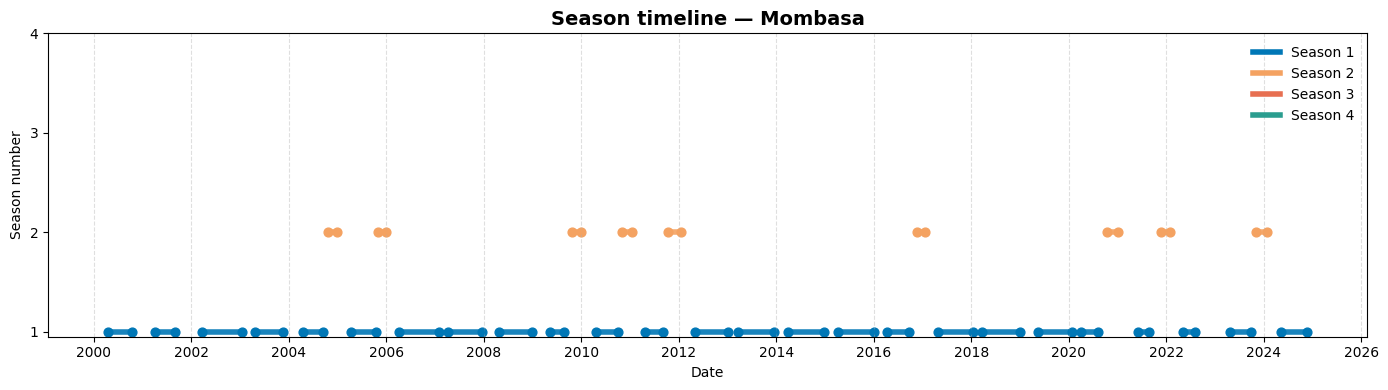

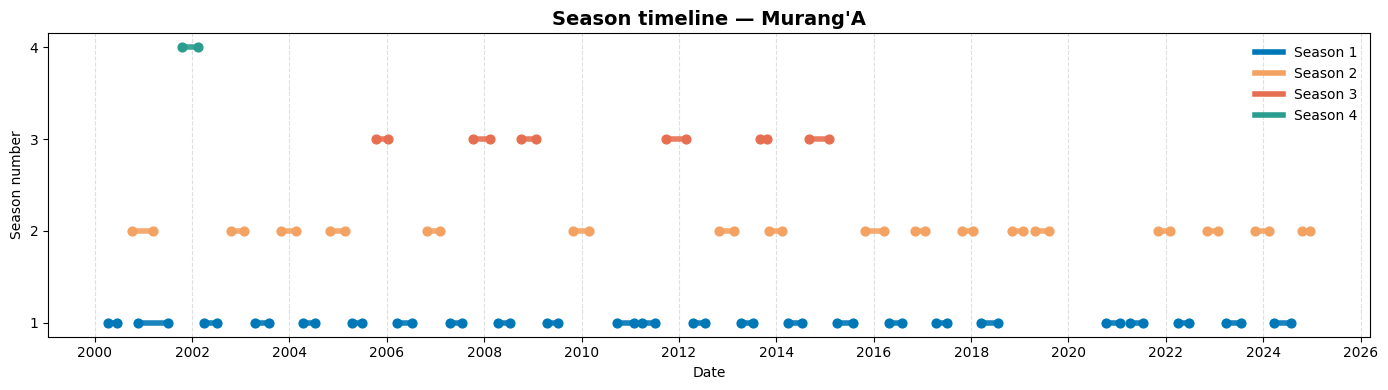

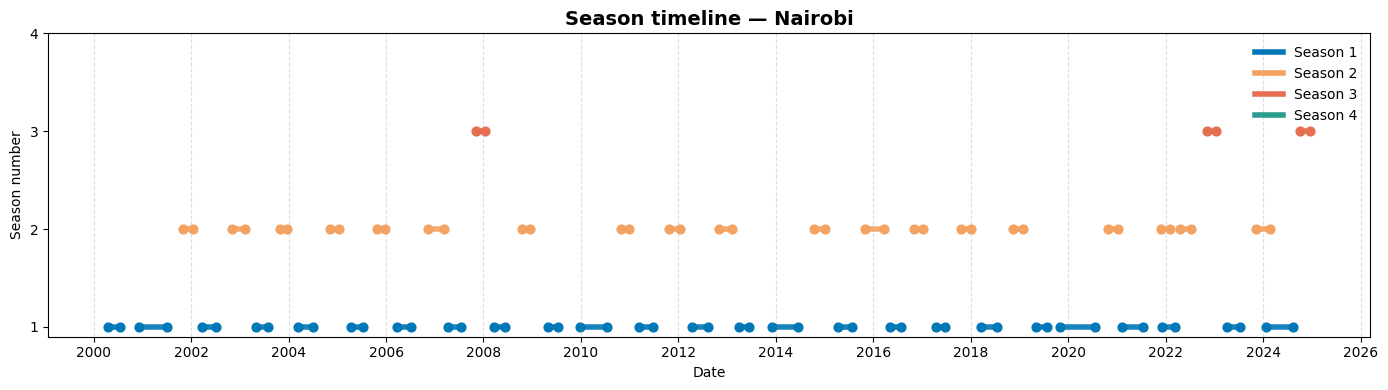

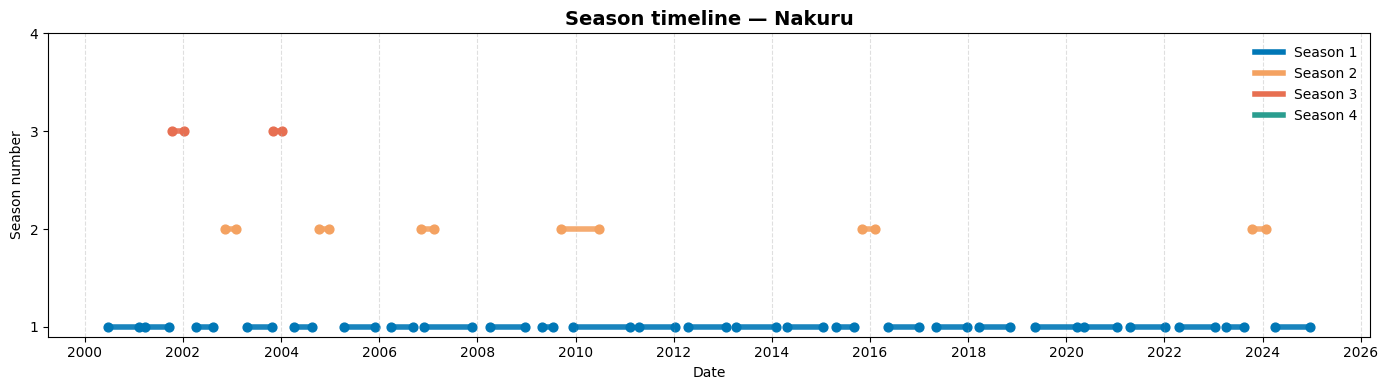

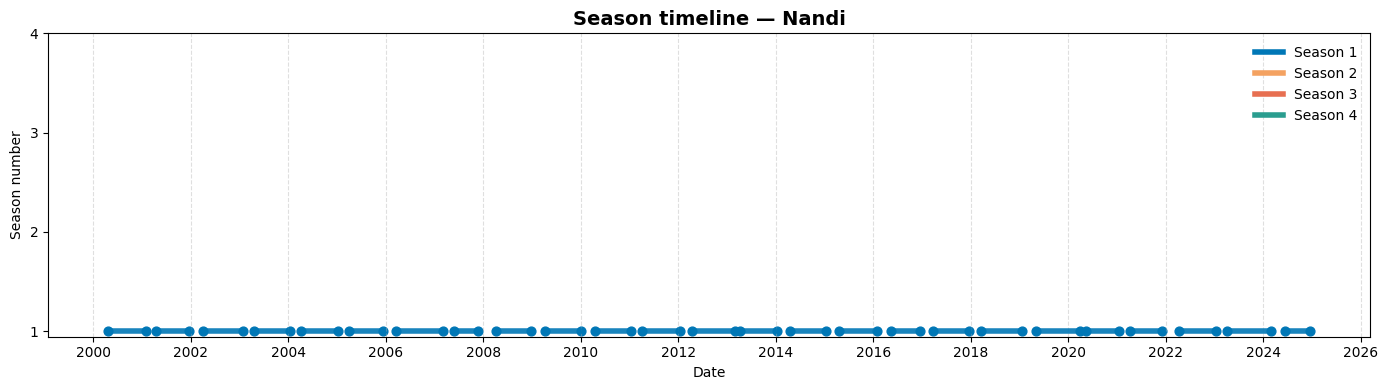

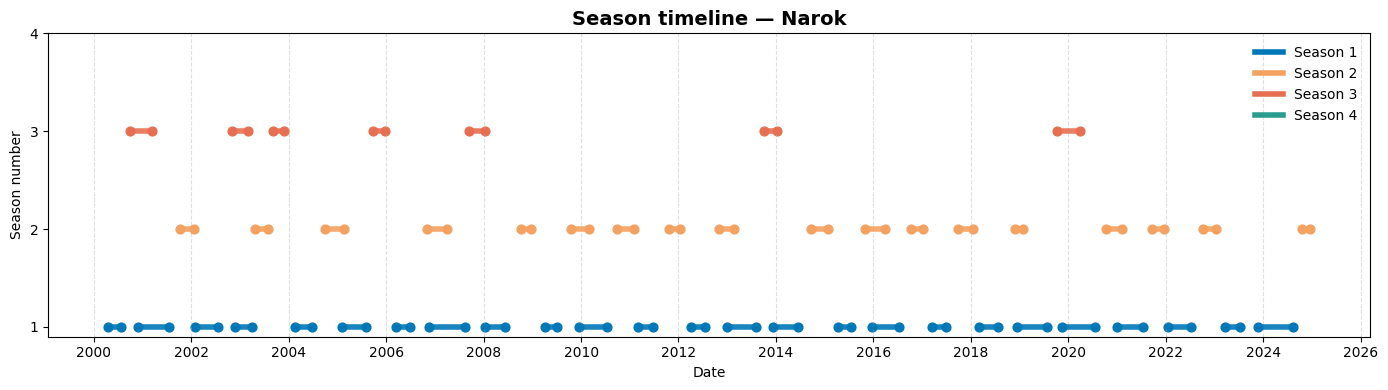

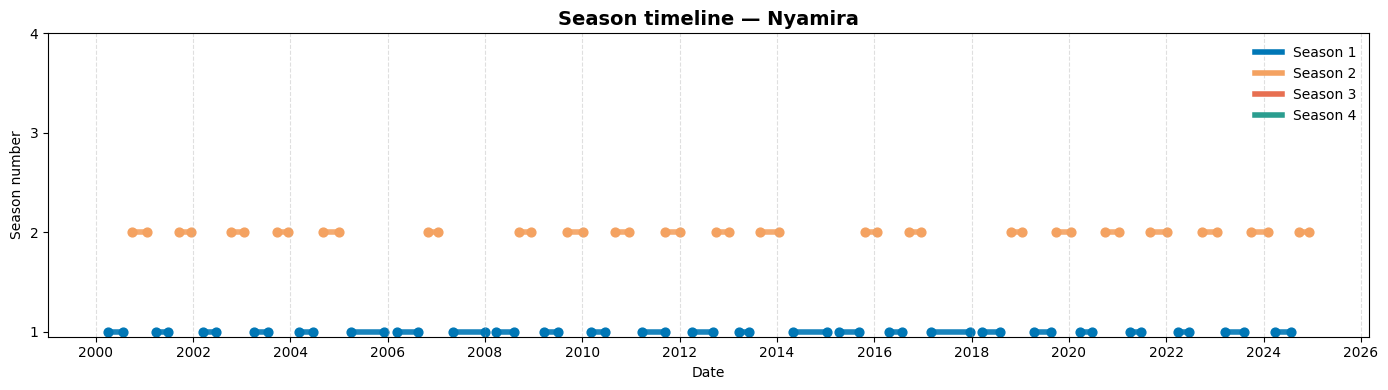

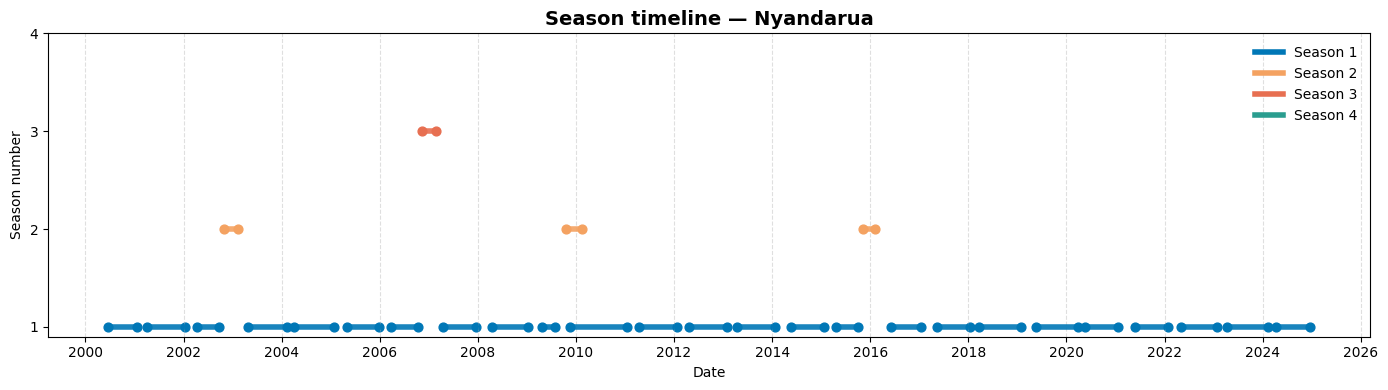

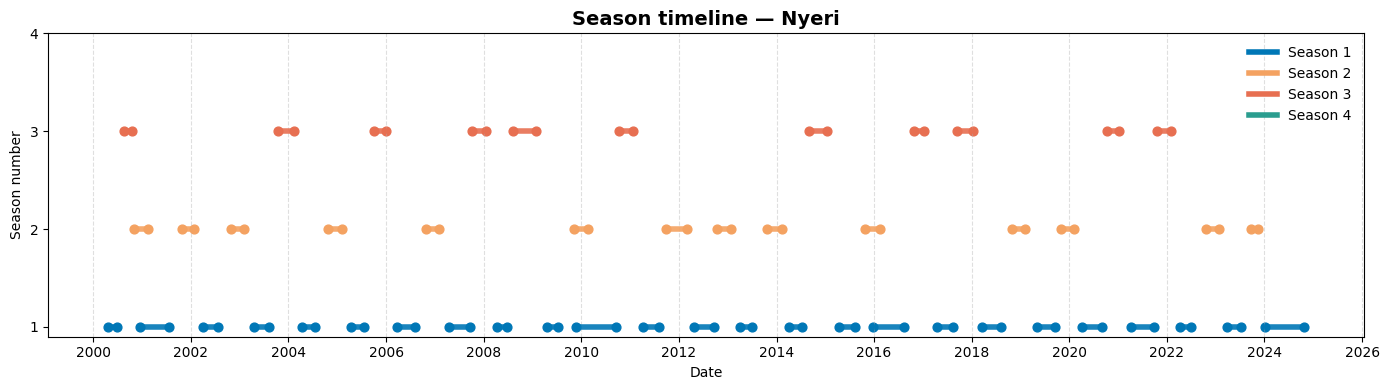

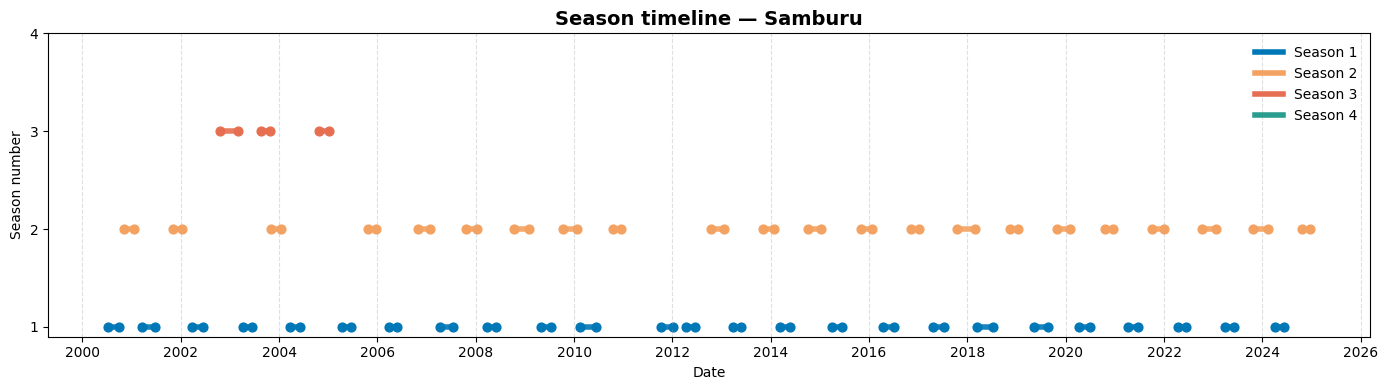

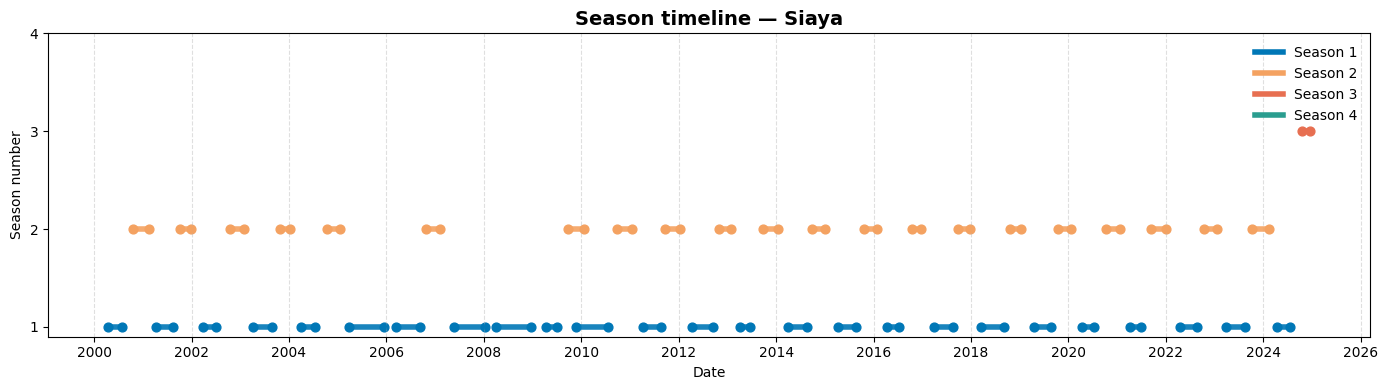

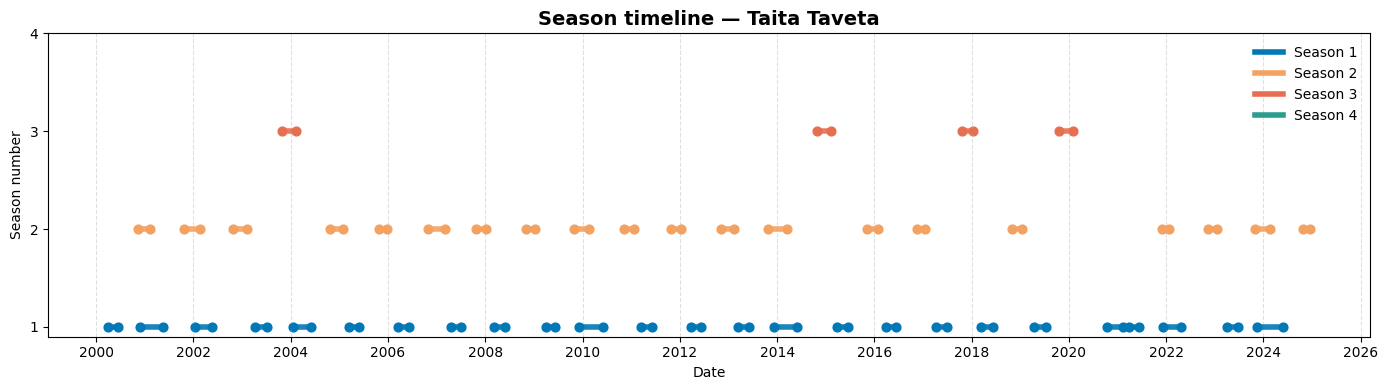

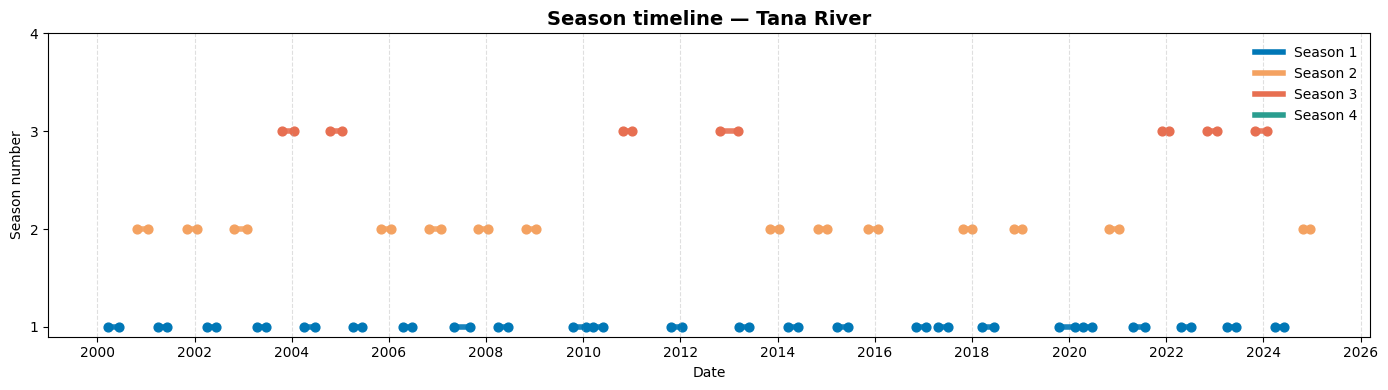

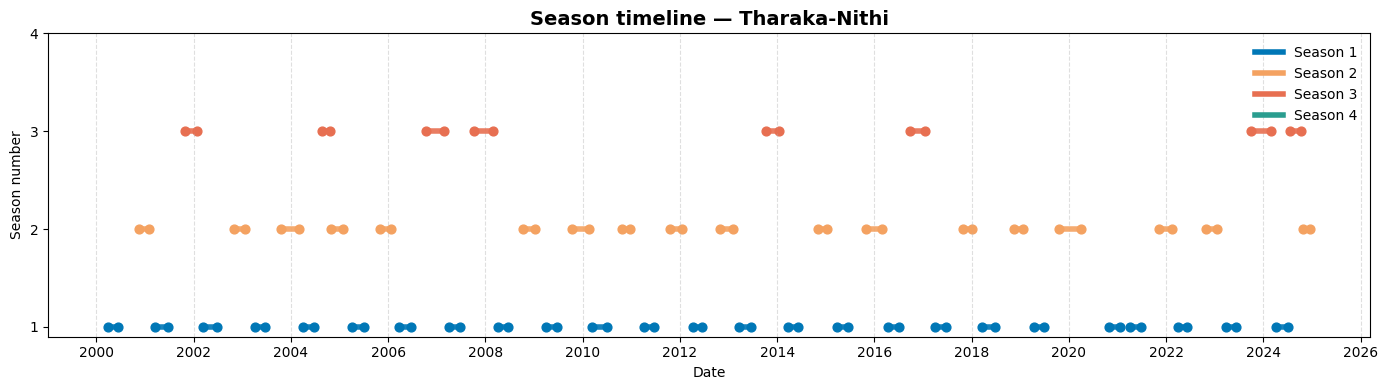

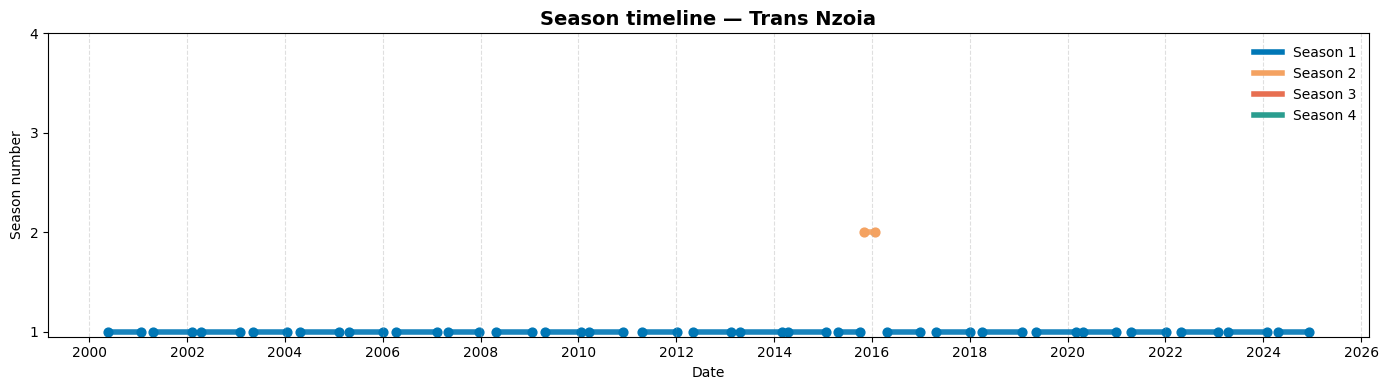

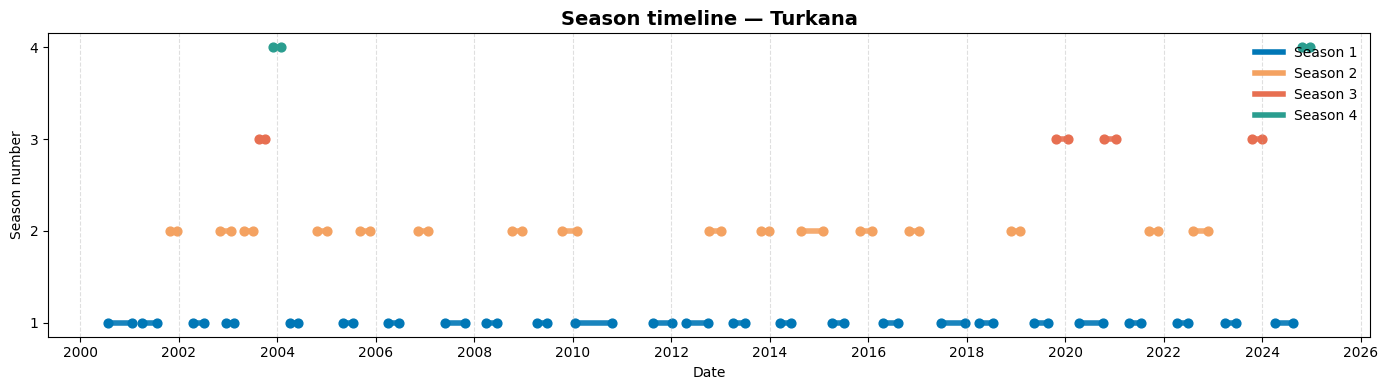

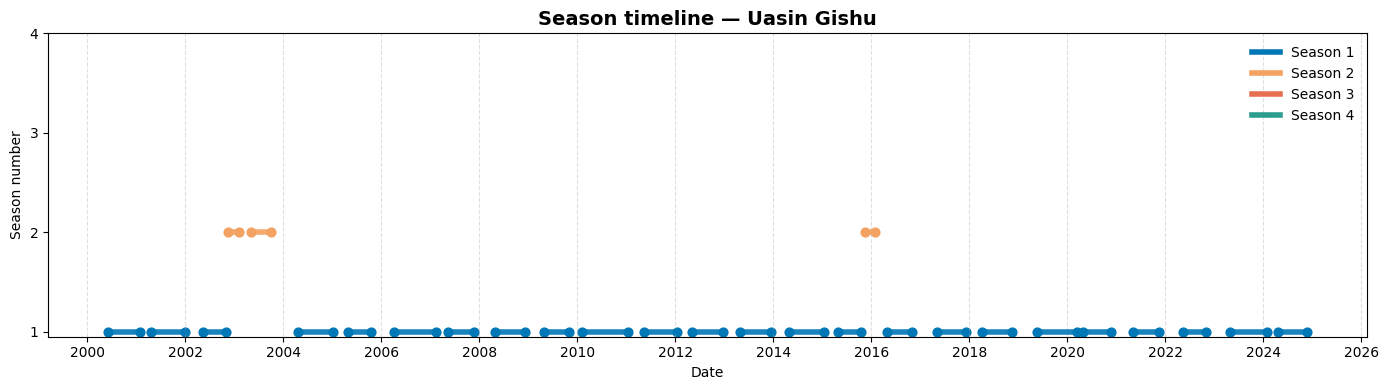

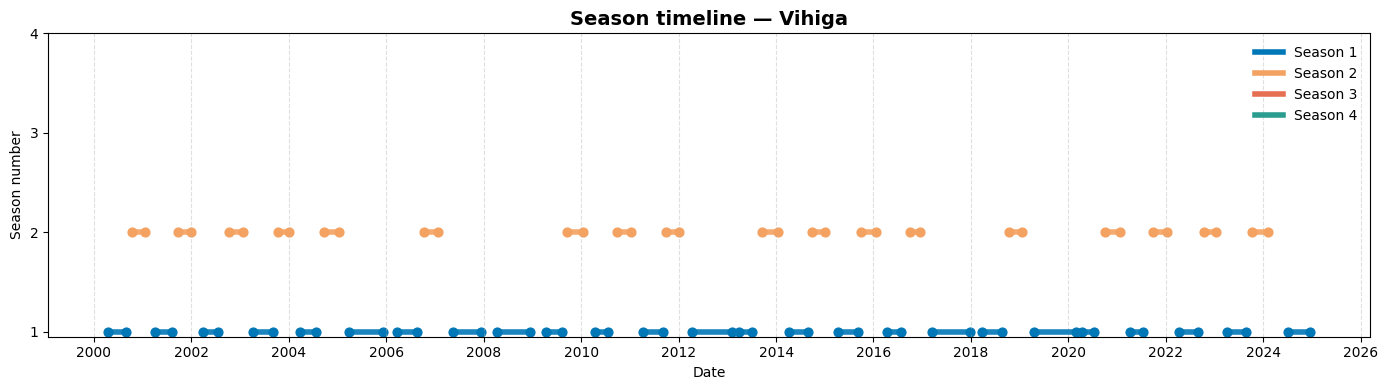

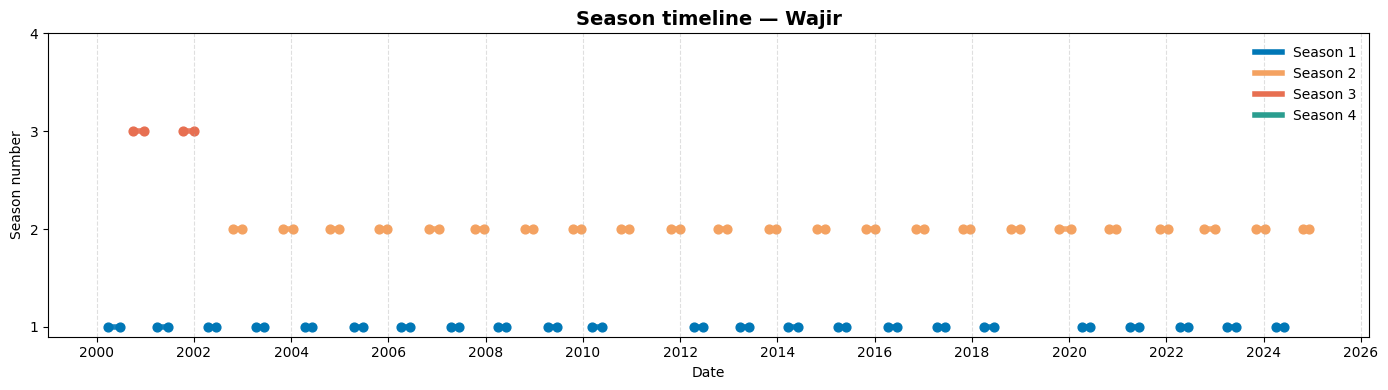

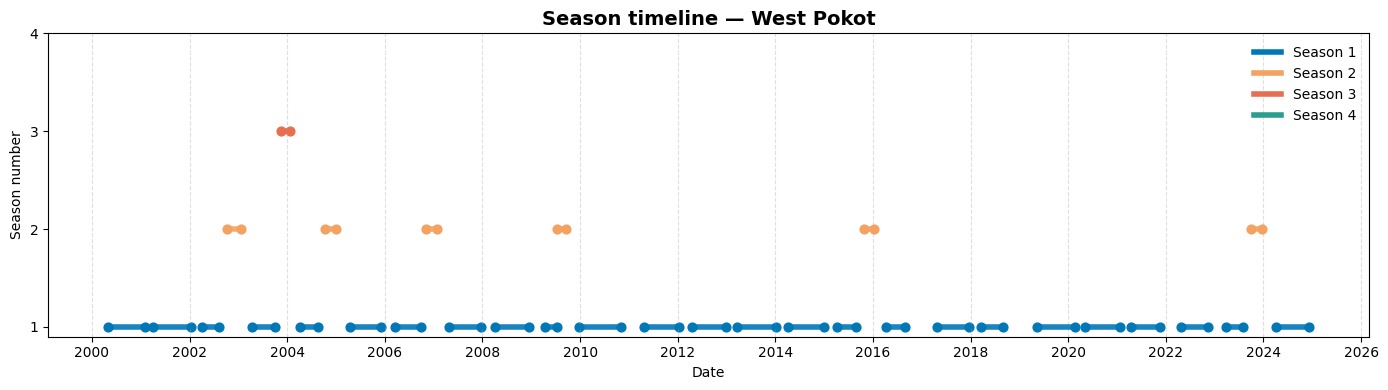

In [195]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Copie de ton DataFrame
df = data_median_sos_eos_corrected.copy()

# Conversion en datetime au cas où
df["DER.sos"] = pd.to_datetime(df["DER.sos"])
df["DER.eos"] = pd.to_datetime(df["DER.eos"])

# Tri global pour garantir l’ordre chronologique
df = df.sort_values(["admin1_name", "DER.sos"])

# Palette de couleurs par saison
colors = {
    1: "#0077b6",  # bleu
    2: "#f4a261",  # orange
    3: "#e76f51",  # rouge clair
    4: "#2a9d8f"   # vert eau
}

# Liste des comtés
counties = sorted(df["admin1_name"].unique())

# Boucle pour afficher un graphique par comté
for county in counties:
    subset = df[df["admin1_name"] == county]

    plt.figure(figsize=(14, 4))
    for _, row in subset.iterrows():
        plt.plot(
            [row["DER.sos"], row["DER.eos"]],
            [row["season_num"], row["season_num"]],
            color=colors.get(row["season_num"], "gray"),
            linewidth=4,
            alpha=0.9
        )
        plt.scatter(row["DER.sos"], row["season_num"], color=colors.get(row["season_num"], "gray"), s=40)
        plt.scatter(row["DER.eos"], row["season_num"], color=colors.get(row["season_num"], "gray"), s=40)

    plt.title(f"Season timeline — {county}", fontsize=14, fontweight="bold")
    plt.xlabel("Date")
    plt.ylabel("Season number")
    plt.yticks([1, 2, 3, 4])
    plt.grid(axis="x", linestyle="--", alpha=0.4)

    # Format de l’axe temporel
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # tous les 2 ans
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

    # Légende
    handles = [plt.Line2D([0], [0], color=c, lw=4, label=f"Season {s}") for s, c in colors.items()]
    plt.legend(handles=handles, loc="upper right", frameon=False)

    plt.tight_layout()
    plt.show()


In [14]:
def ajuster_saisons_interannuelles(df):
    """
    Adjusts seasonal boundaries across multiple years to ensure strict chronological consistency
    within each county, without merging any seasons.

    ------------------------------------------------------------------------
    PURPOSE
    ------------------------------------------------------------------------
    This function enforces a non-overlapping temporal sequence of seasons for each county.
    It ensures that no season extends beyond the start of the next one — even when the
    following season belongs to the next calendar year.

    Unlike overlap-correction functions that merge seasons, this one preserves all
    existing seasonal records (1–4), only truncating their end date (DER.eos) if needed.

    ------------------------------------------------------------------------
    INPUT
    ------------------------------------------------------------------------
    df : pandas.DataFrame
        Must contain the following columns:
        - "admin1_name" : county name (string)
        - "season_yr"   : season year (int)
        - "season_num"  : season number (int, typically 1–4)
        - "DER.sos"     : start of season (datetime64)
        - "DER.eos"     : end of season (datetime64)

    ------------------------------------------------------------------------
    LOGIC
    ------------------------------------------------------------------------
    For each county independently:
      1. Sort all records chronologically by `DER.sos` across *all years*.
      2. Traverse the list in temporal order.
      3. If the current season ends after the next season begins:
            → truncate DER.eos = next.DER.sos
         (This preserves the integrity of both seasons without overlap.)
      4. Keep all other seasons untouched.

    ------------------------------------------------------------------------
    OUTPUT
    ------------------------------------------------------------------------
    Returns a new pandas.DataFrame with identical structure but with corrected
    end dates (DER.eos). No new rows are added, and none are merged or deleted.

    ------------------------------------------------------------------------
    NOTES
    ------------------------------------------------------------------------
    - Chronology is guaranteed for all counties.
    - Seasonal numbering (1–4) is preserved.
    - Seasonal continuity is respected over time, including cross-year sequences.
    - Remaining overlaps (if any) likely indicate true anomalies in the raw data.

    Example:
    --------
    Before correction:
        County   |  Season_yr | Season_num | DER.sos     | DER.eos
        ----------|------------|-------------|--------------|--------------
        Baringo   | 2020       | 2           | 2020-11-15  | 2021-03-20
        Baringo   | 2021       | 1           | 2021-02-10  | 2021-05-01

    After correction:
        Baringo   | 2020       | 2           | 2020-11-15  | 2021-02-10  ← truncated
        Baringo   | 2021       | 1           | 2021-02-10  | 2021-05-01
    """
    import pandas as pd

    # Defensive copy
    df = df.copy()

    # Ensure datetime type
    df["DER.sos"] = pd.to_datetime(df["DER.sos"])
    df["DER.eos"] = pd.to_datetime(df["DER.eos"])

    corrected_rows = []

    # Process each county independently
    for county, group in df.groupby("admin1_name"):
        group_sorted = group.sort_values("DER.sos").reset_index(drop=True)

        for i in range(len(group_sorted) - 1):
            current = group_sorted.loc[i]
            next_row = group_sorted.loc[i + 1]

            # If current season ends after the next season starts → truncate it
            if current["DER.eos"] > next_row["DER.sos"]:
                group_sorted.at[i, "DER.eos"] = next_row["DER.sos"]

        corrected_rows.append(group_sorted)

    # Reassemble cleaned DataFrame
    df_corrected = pd.concat(corrected_rows, ignore_index=True)

    return df_corrected


In [15]:
data_median_sos_eos_cleaned = ajuster_saisons_interannuelles(data_median_sos_eos_corrected)

# Vérification
overlaps = (
    data_median_sos_eos_cleaned.sort_values(["admin1_name", "DER.sos"])
    .groupby("admin1_name")
    .apply(lambda g: (g["DER.eos"].shift() > g["DER.sos"]).sum())
)

print("Nombre total de chevauchements restants :", overlaps.sum())


Nombre total de chevauchements restants : 0


C:\Users\KPS\AppData\Local\Temp\ipykernel_21296\688030647.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: (g["DER.eos"].shift() > g["DER.sos"]).sum())


In [16]:
data_median_sos_eos_cleaned["season_length_days"] = (data_median_sos_eos_cleaned["DER.eos"] - data_median_sos_eos_cleaned["DER.sos"]).dt.days


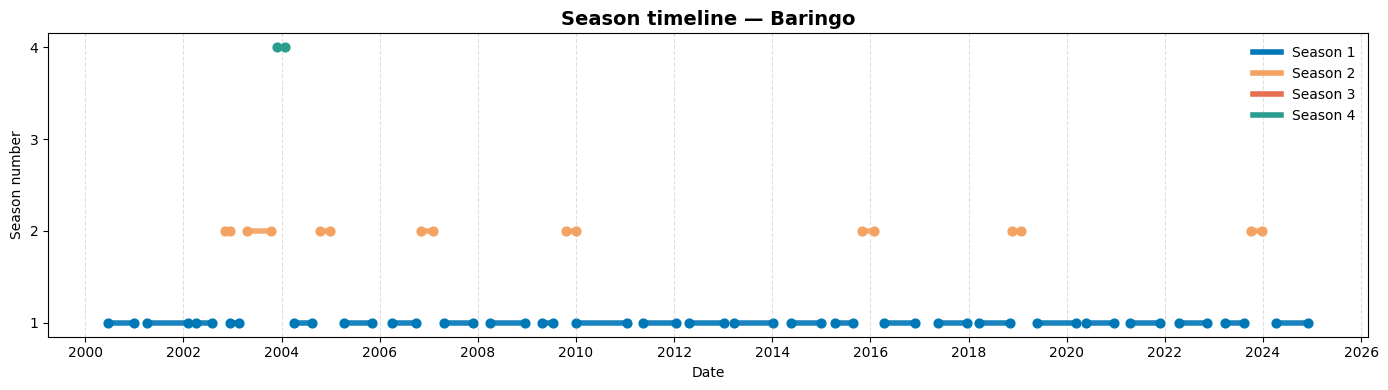

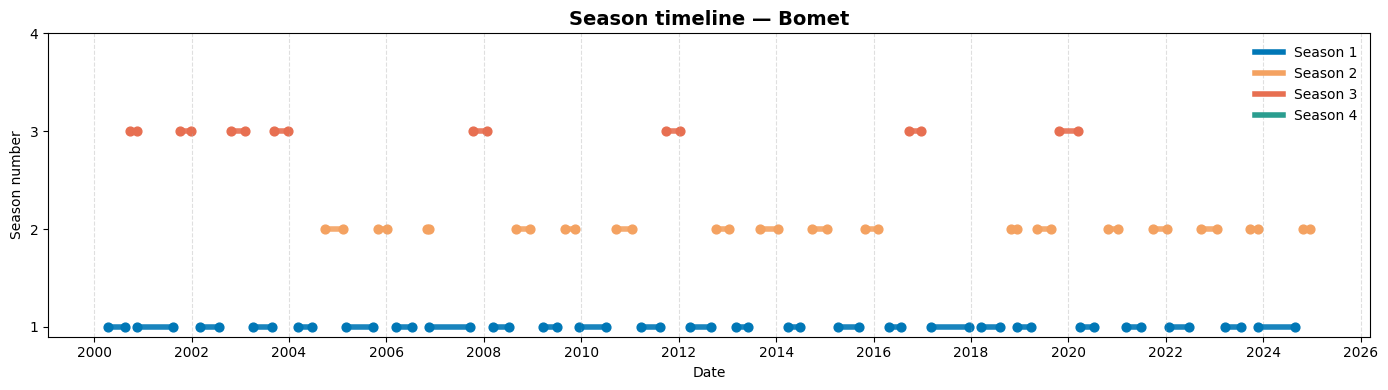

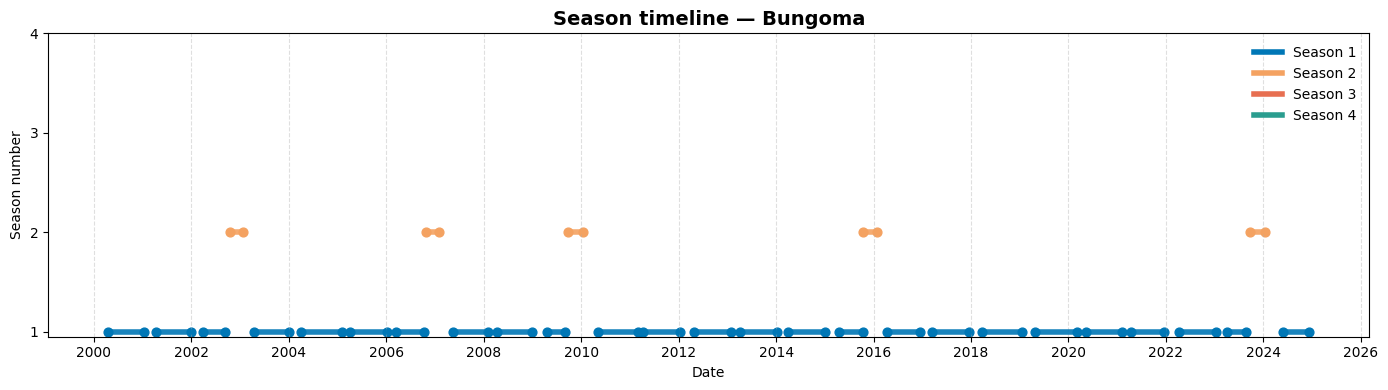

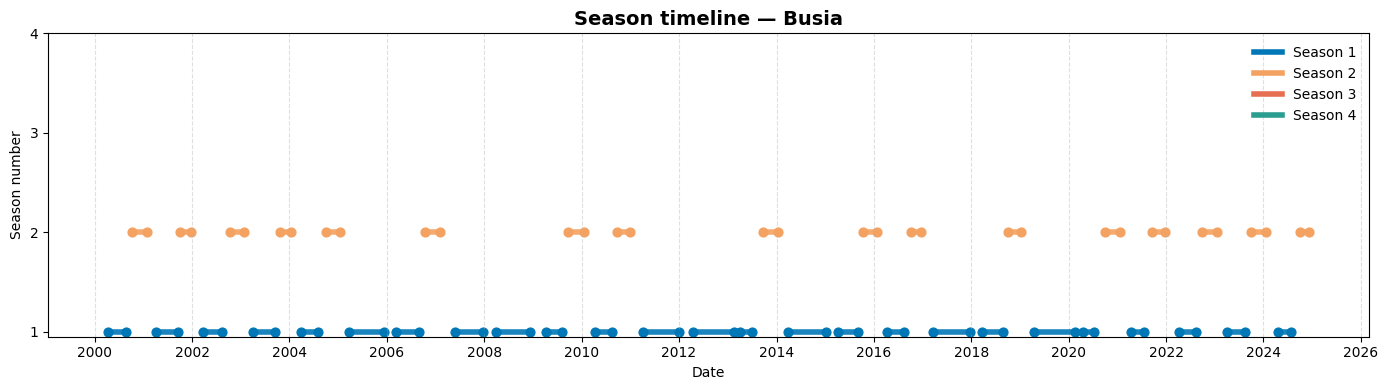

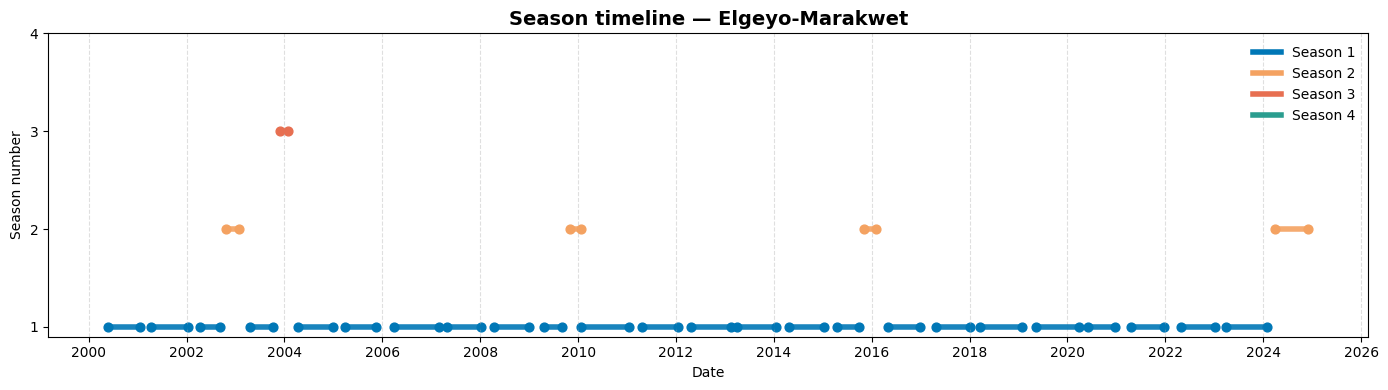

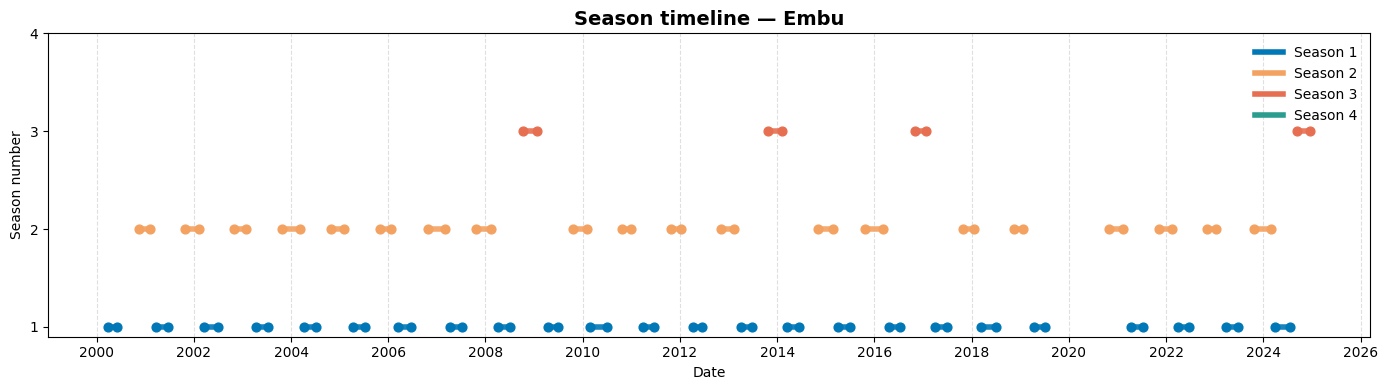

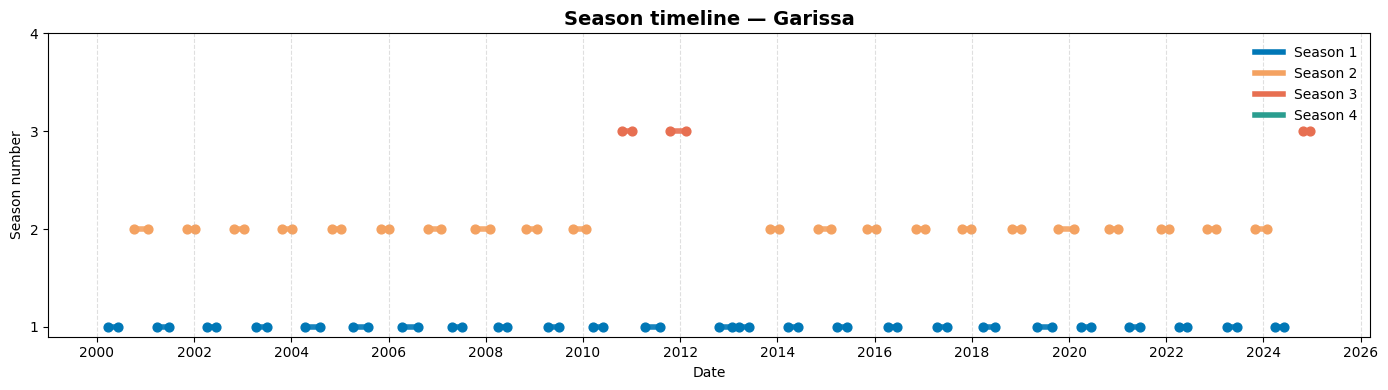

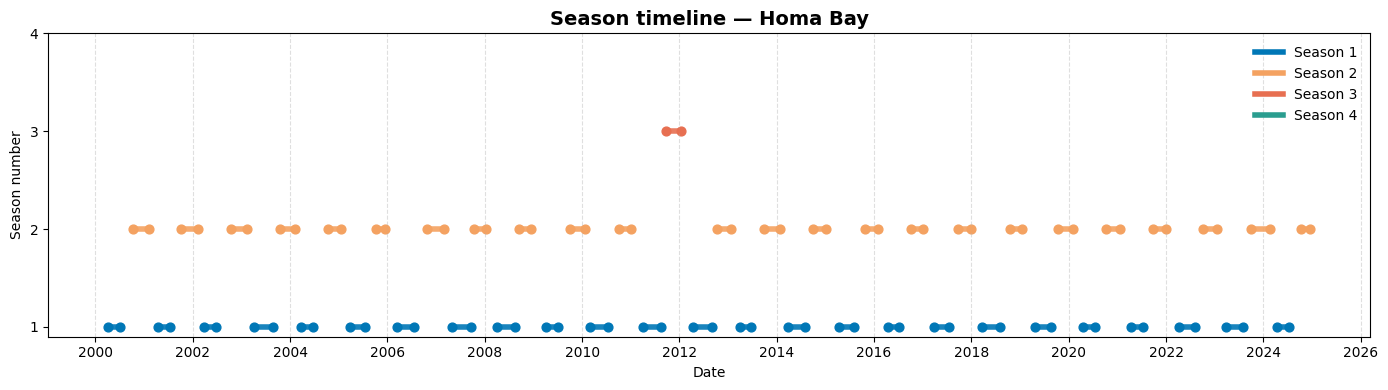

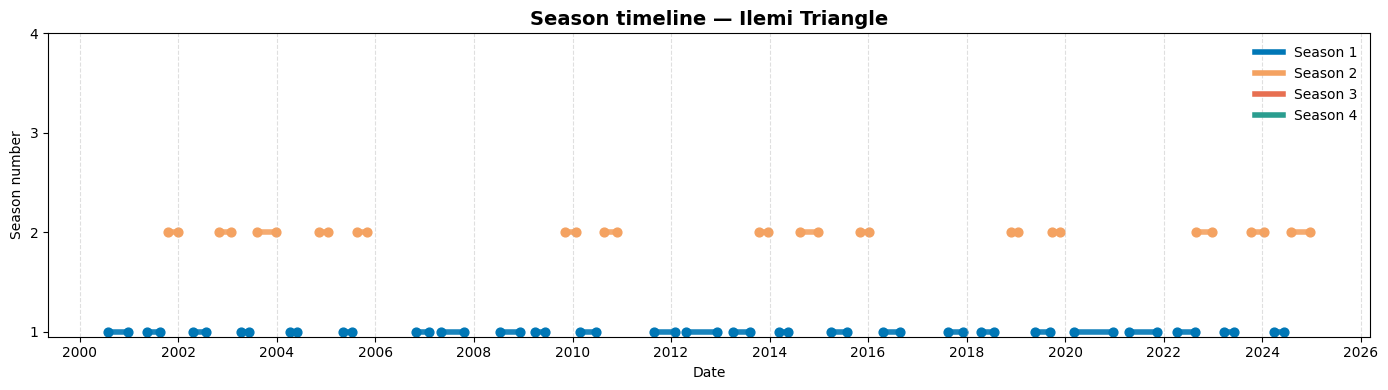

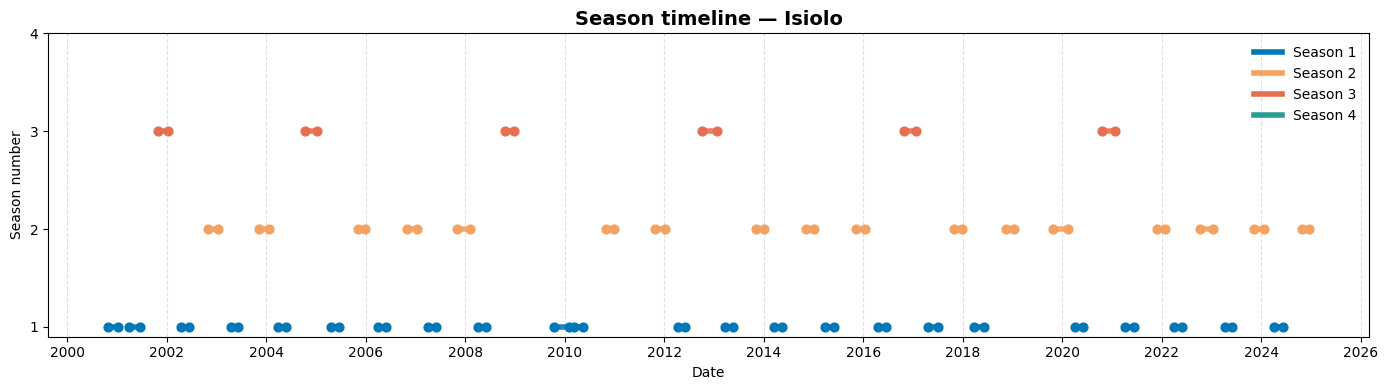

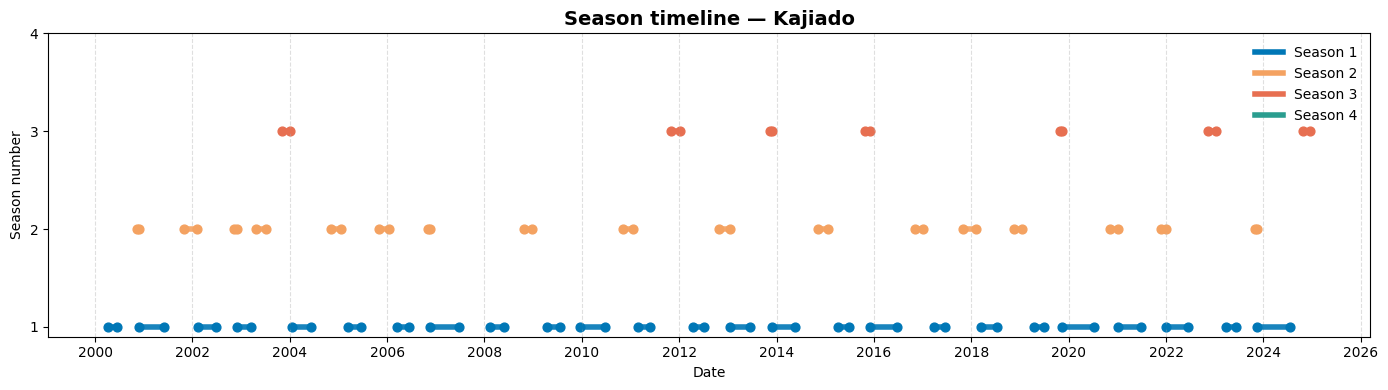

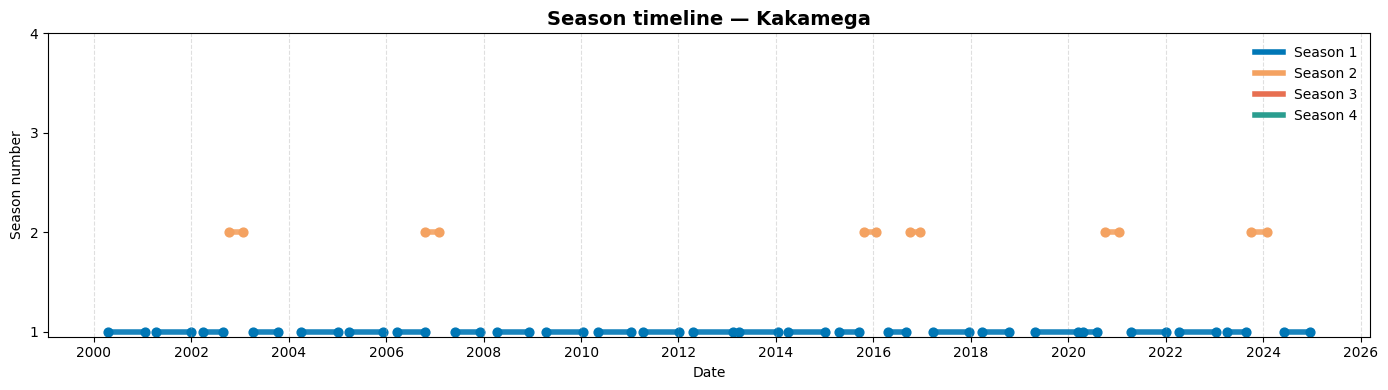

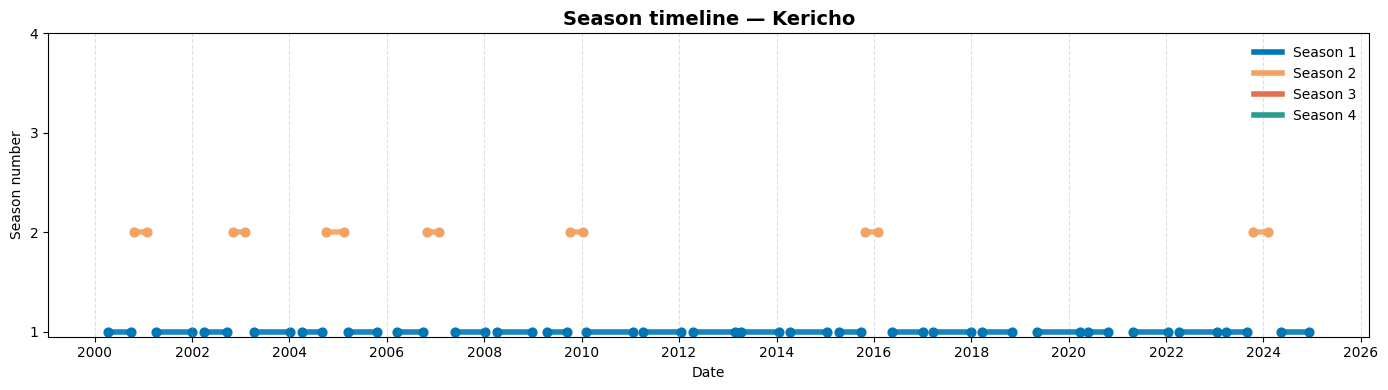

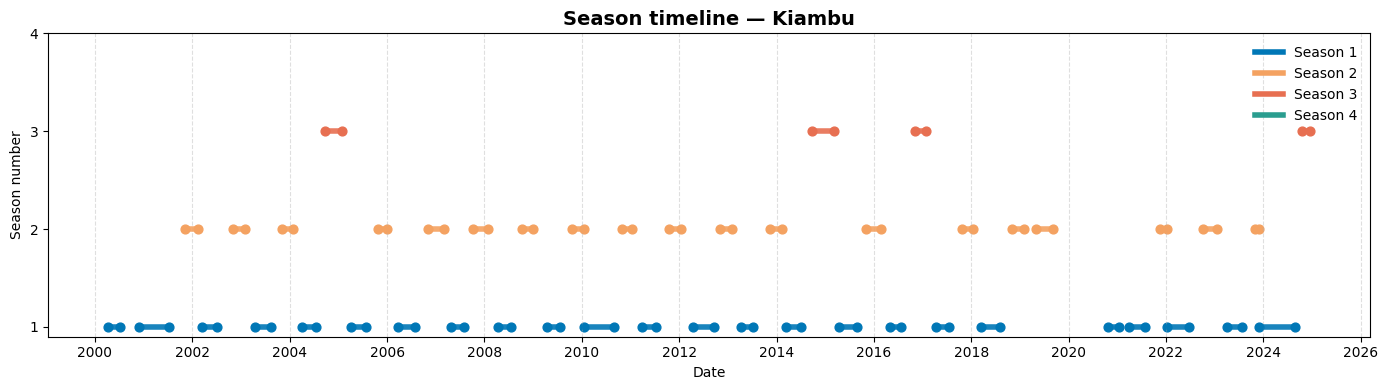

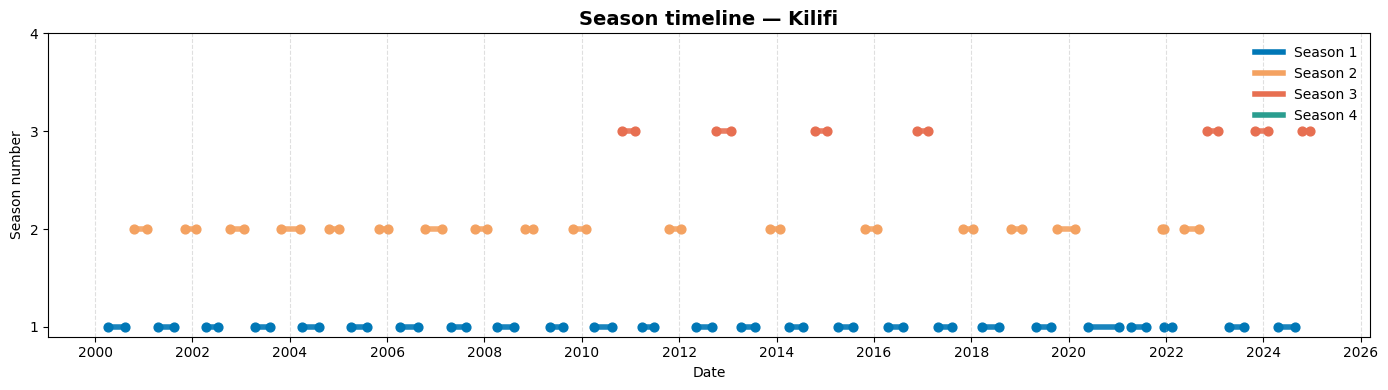

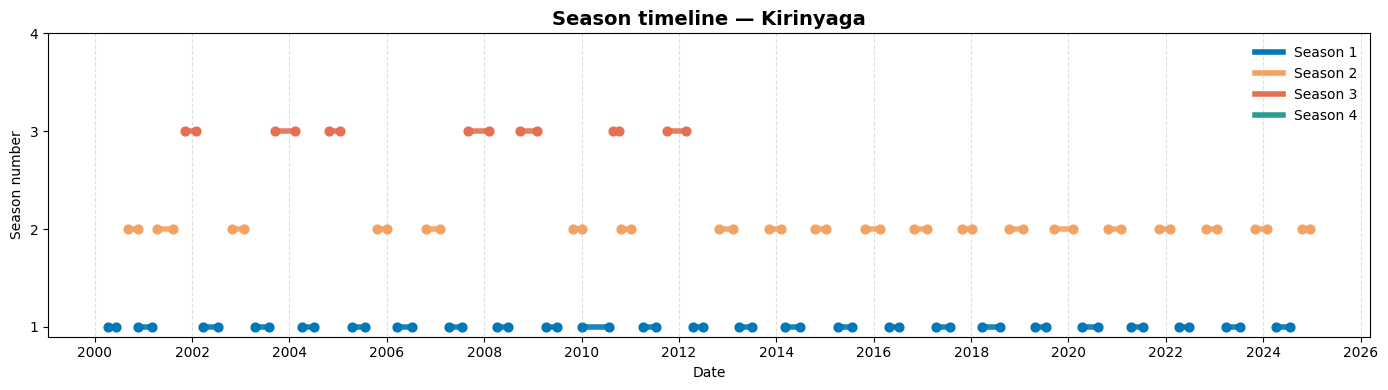

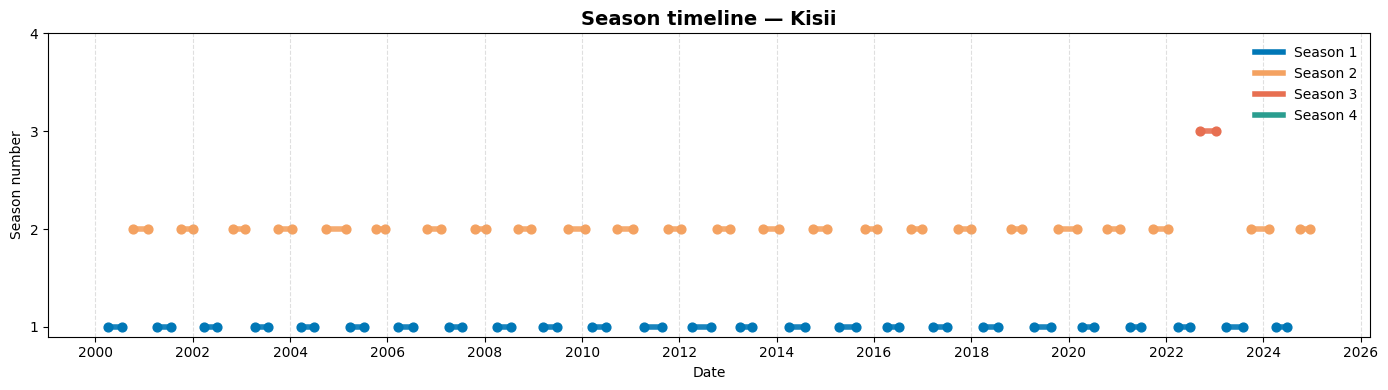

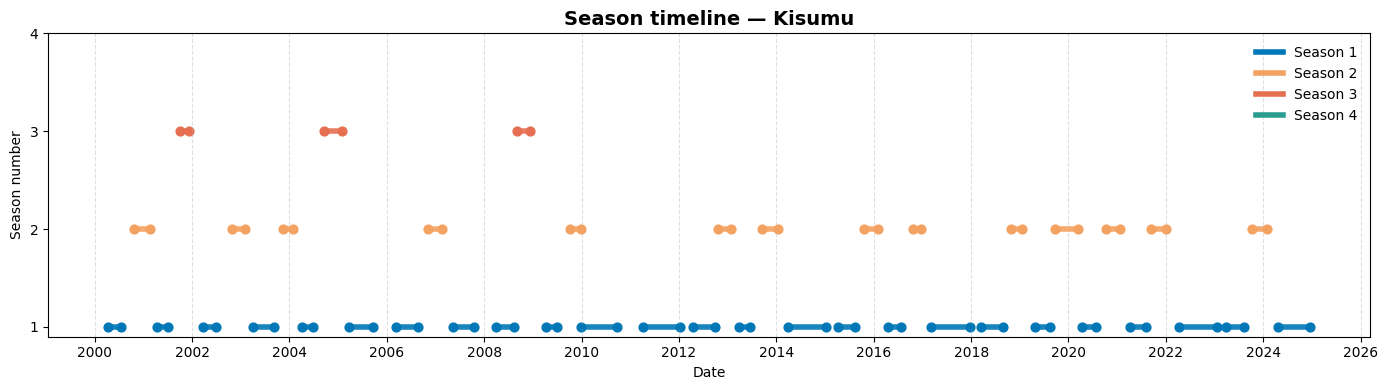

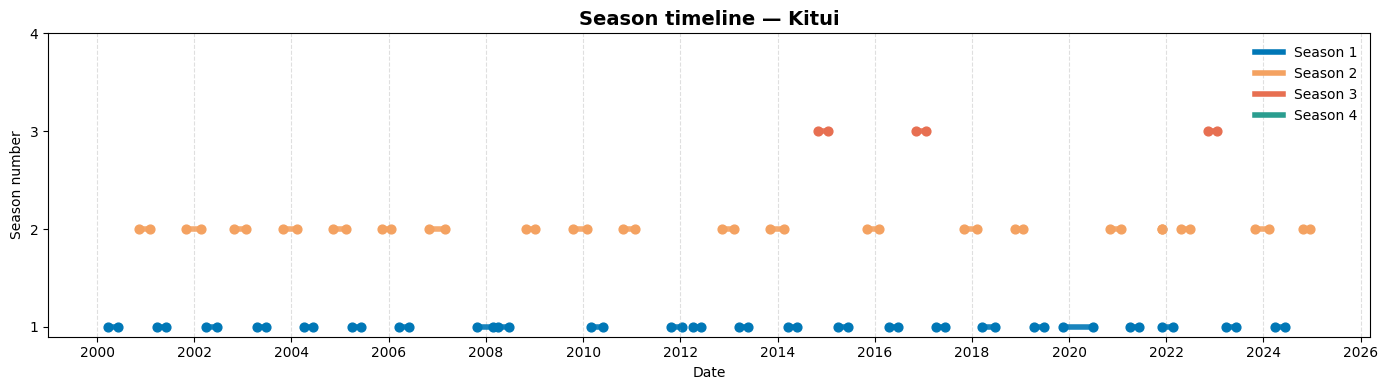

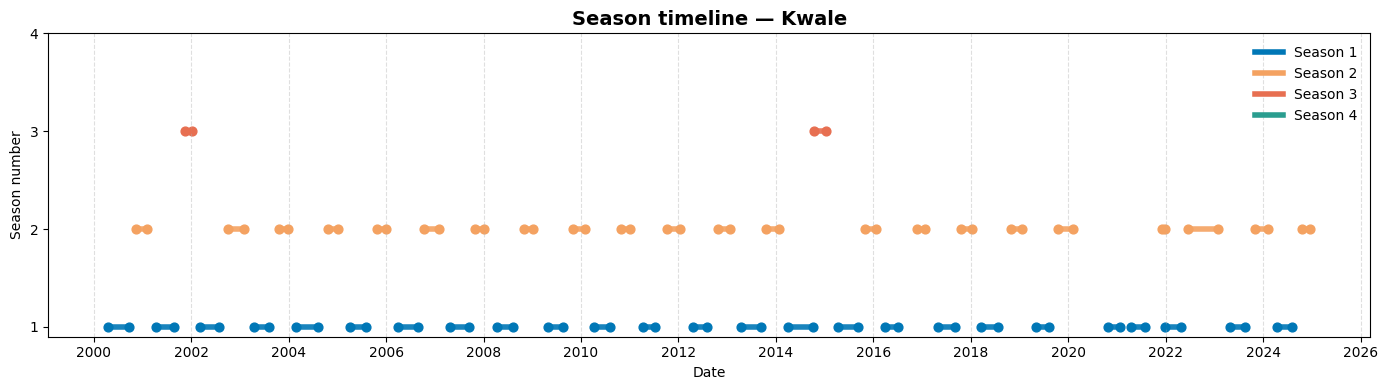

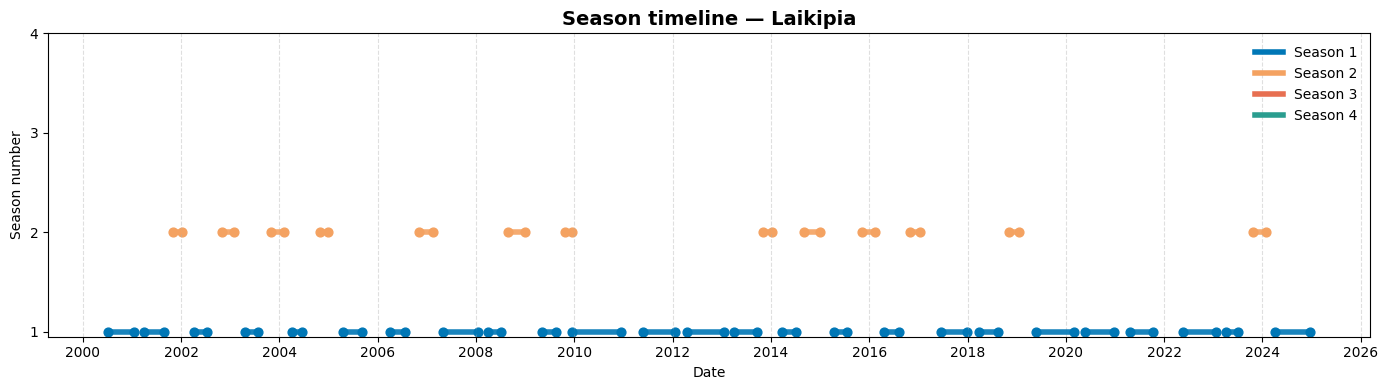

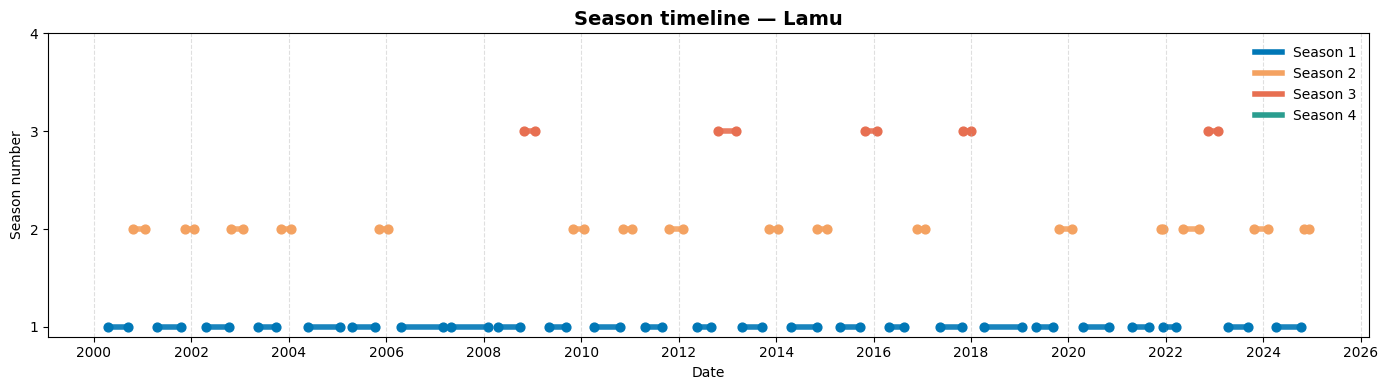

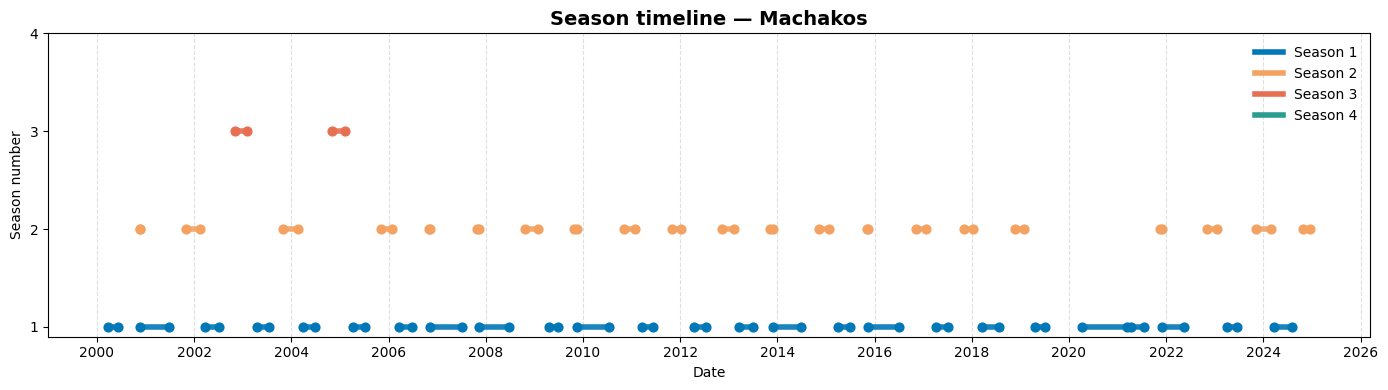

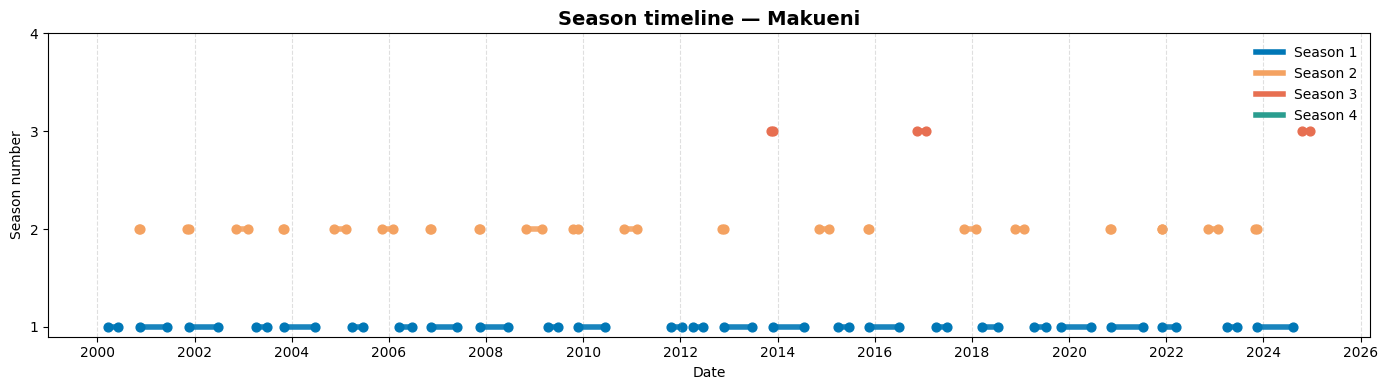

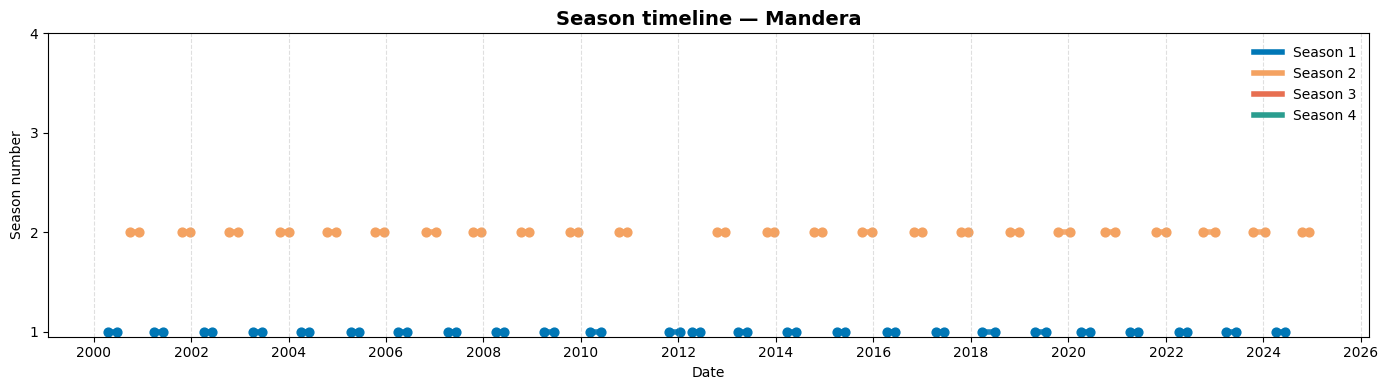

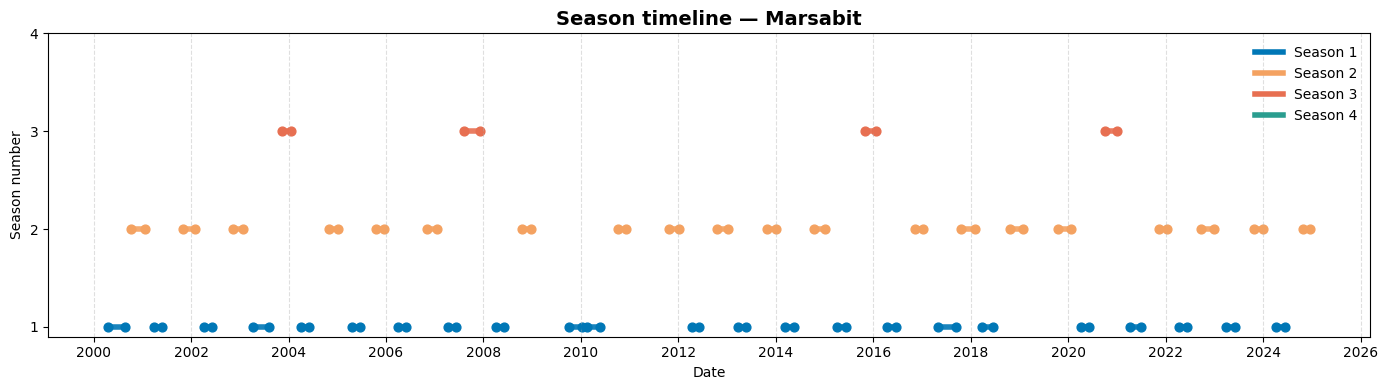

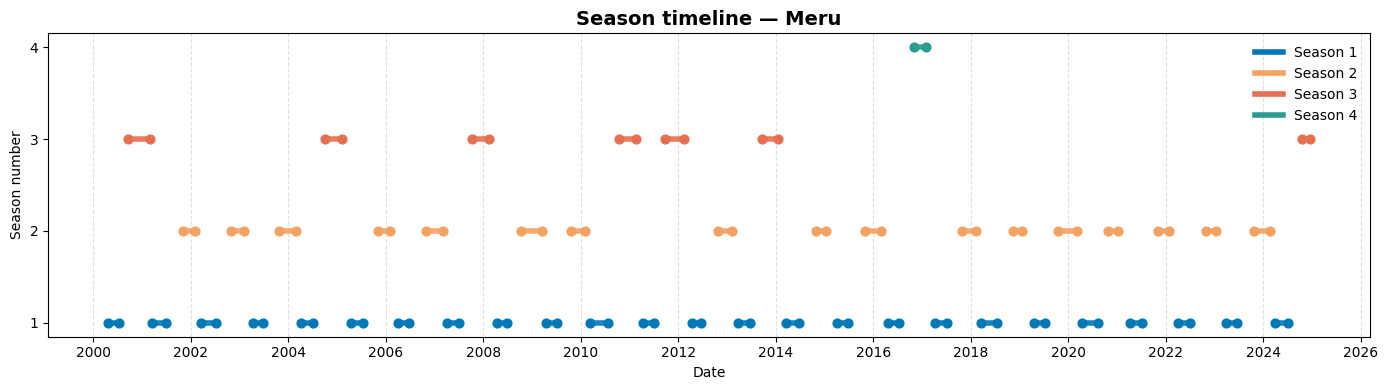

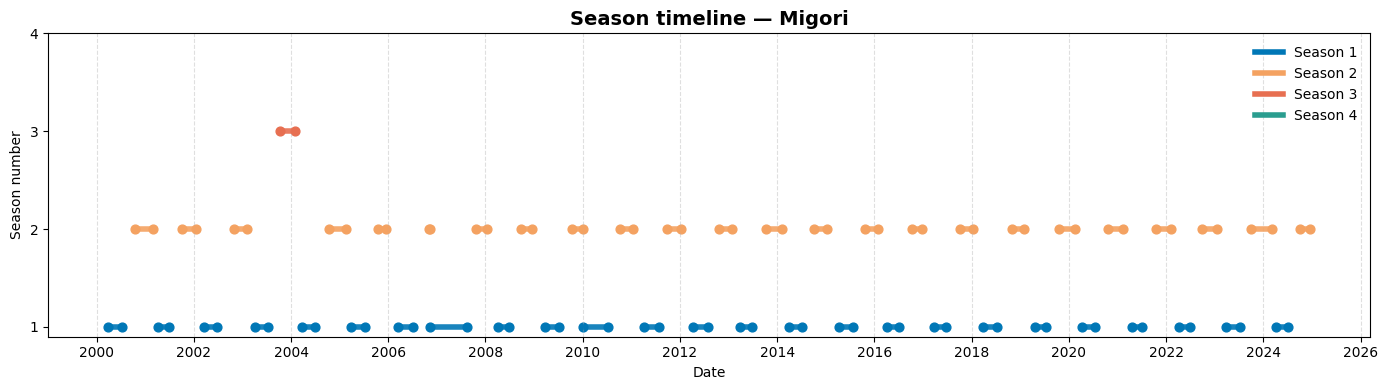

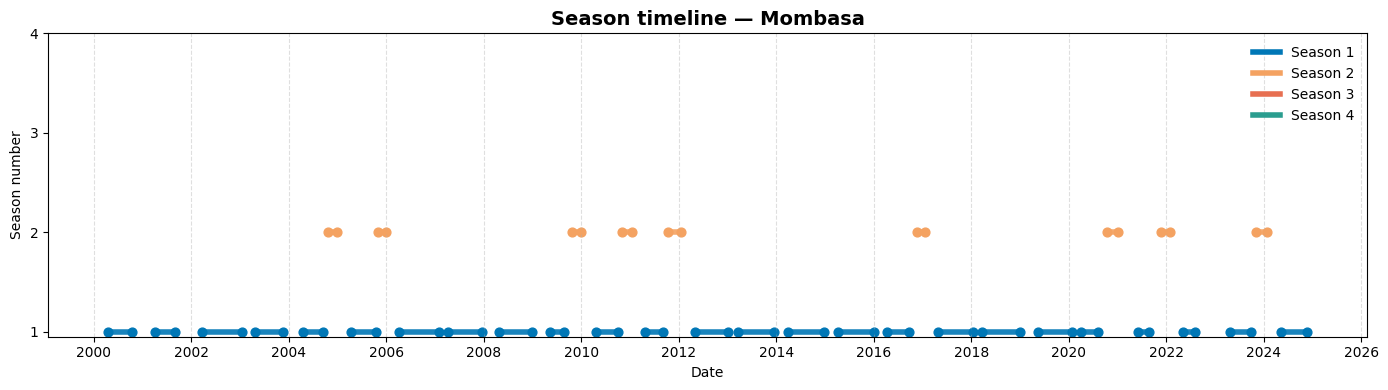

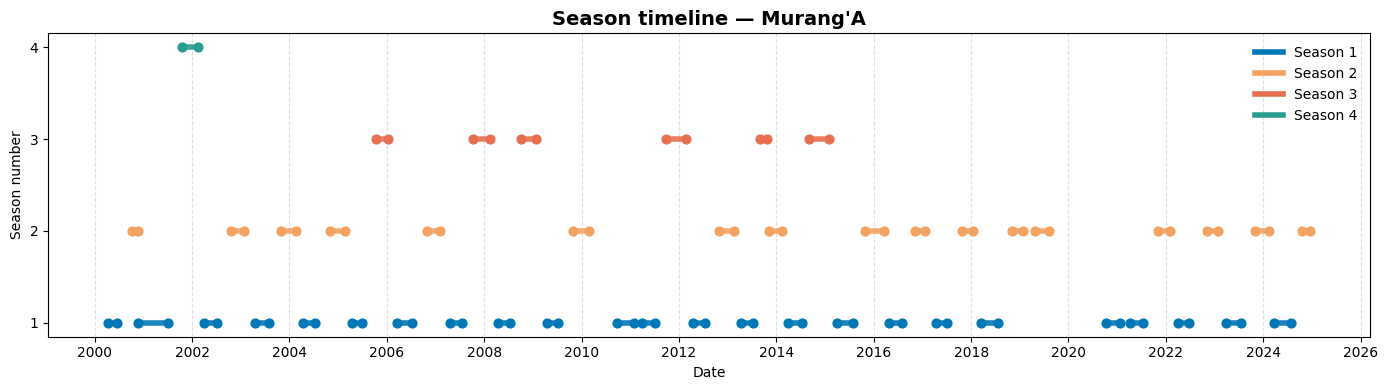

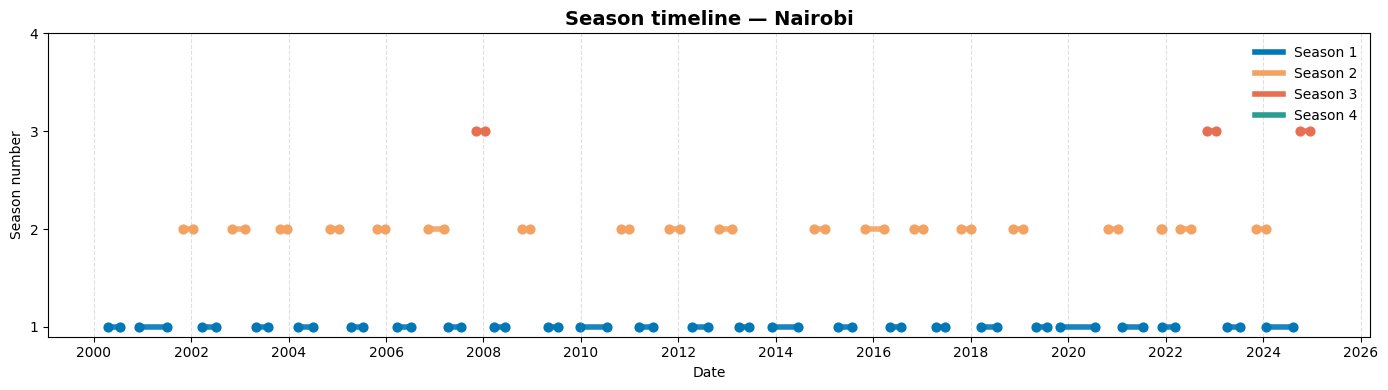

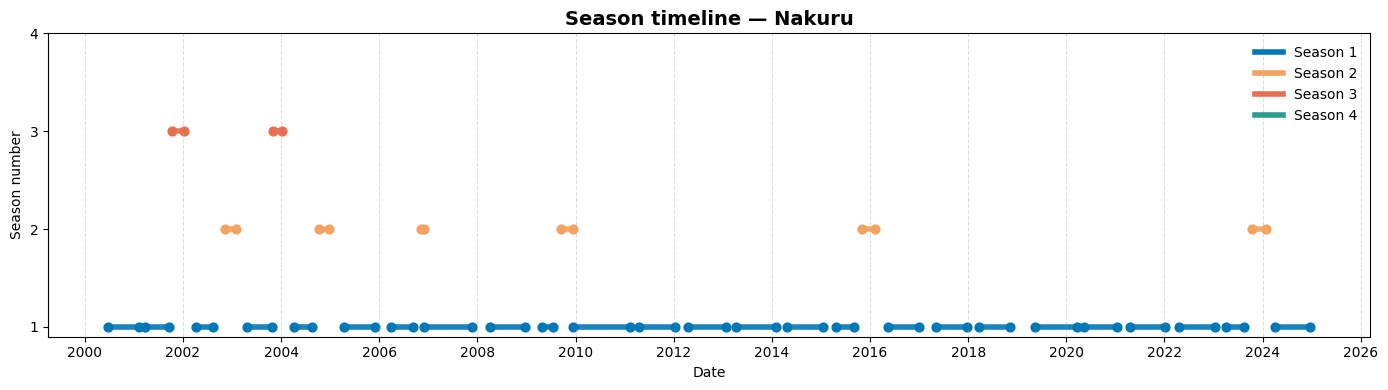

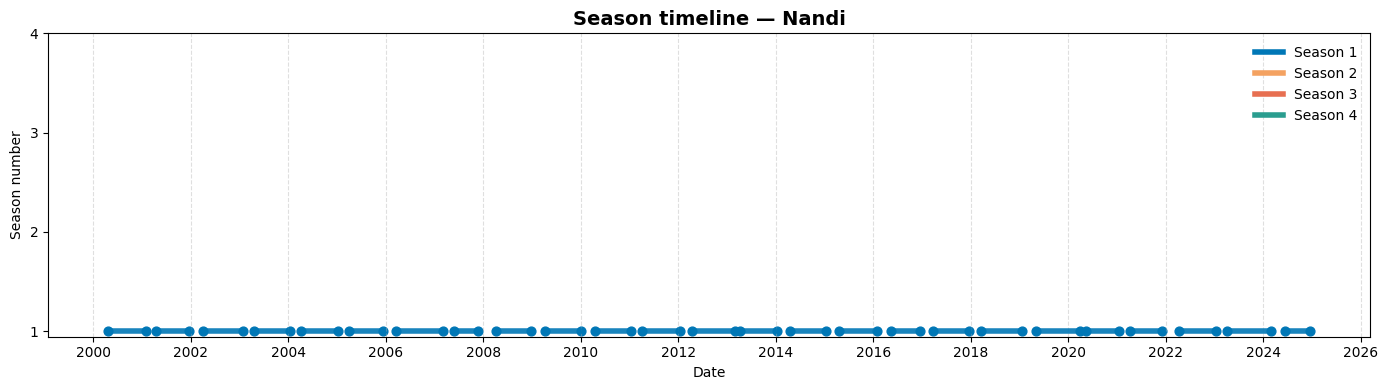

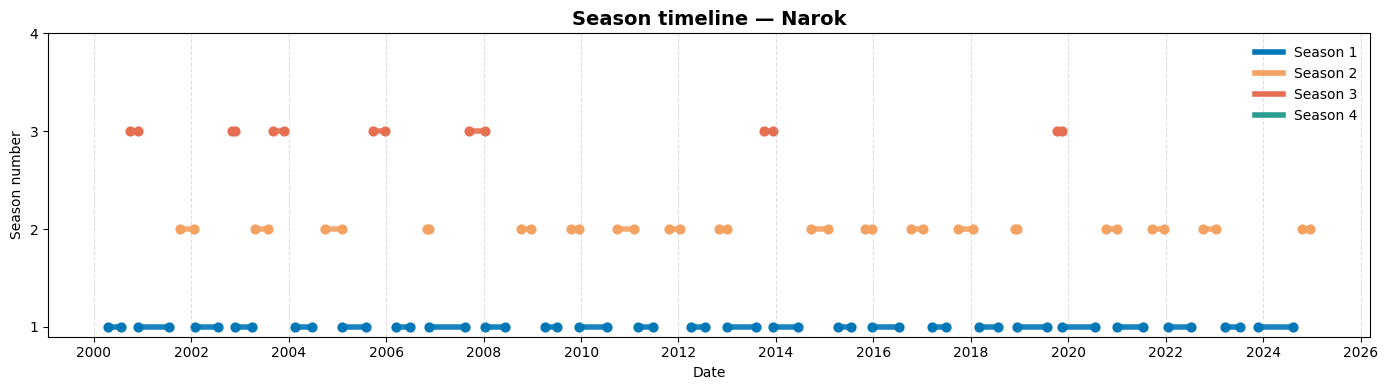

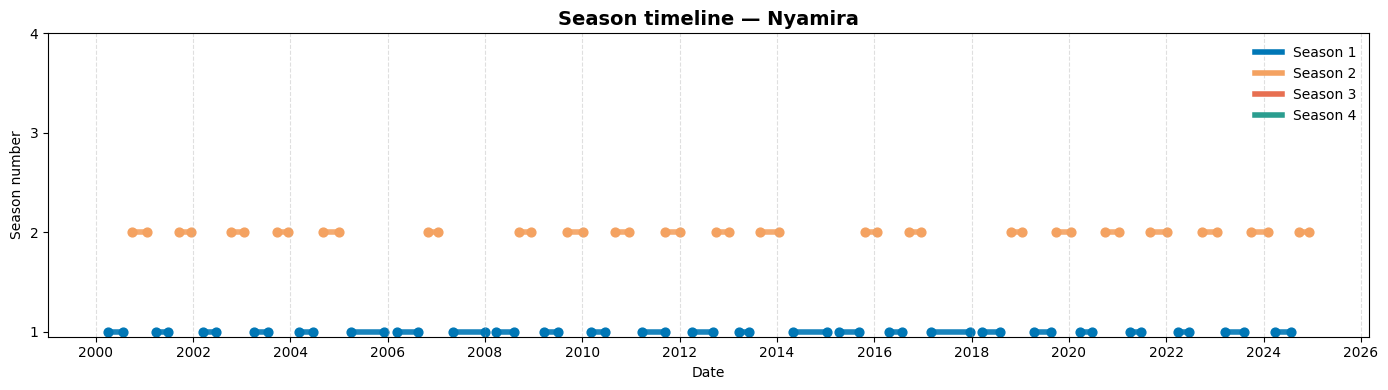

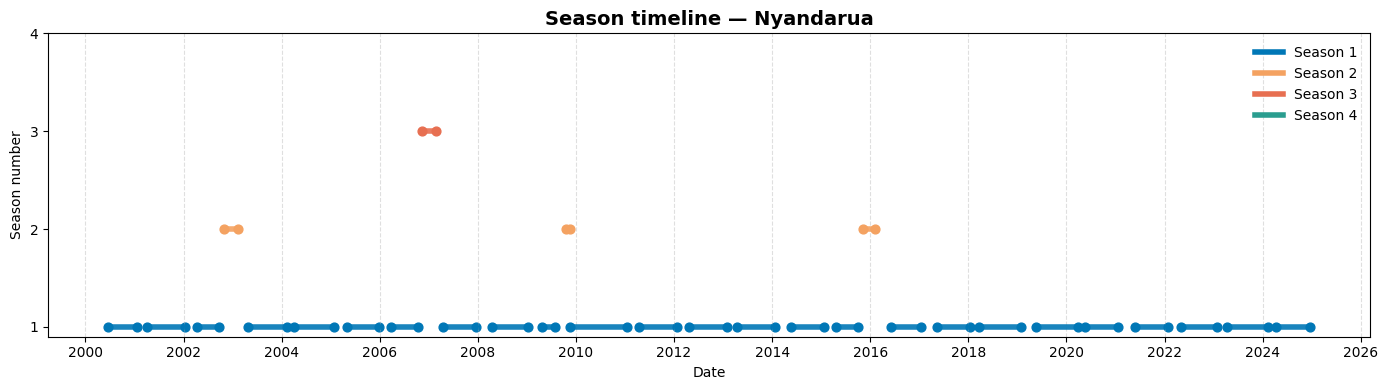

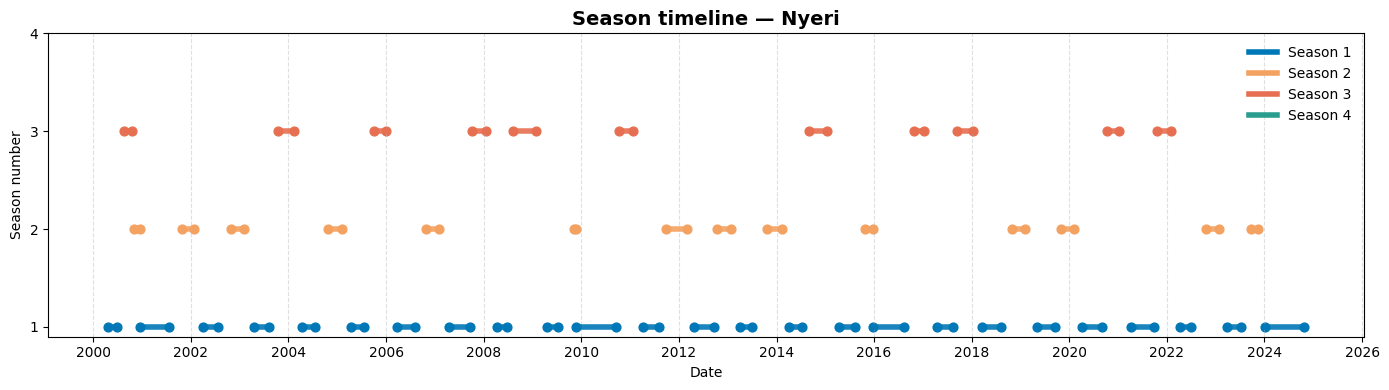

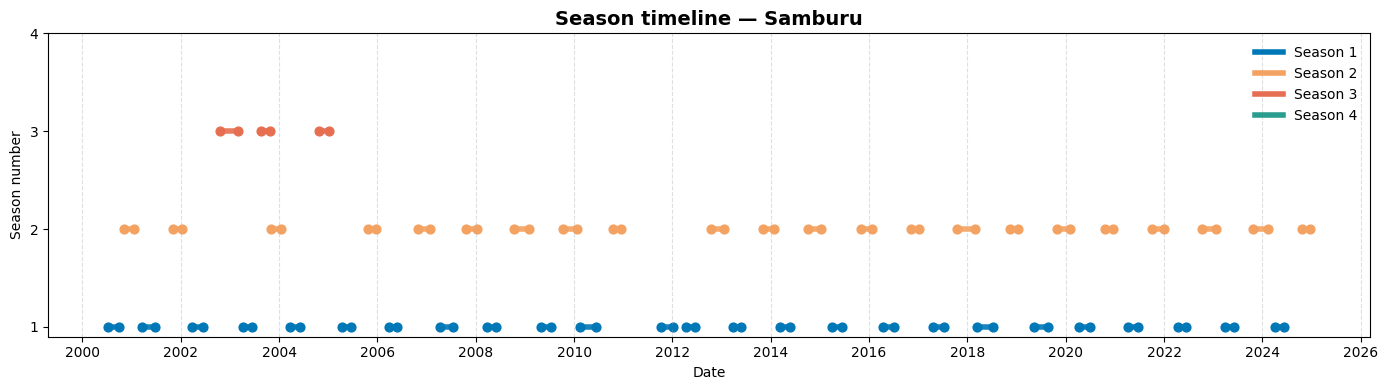

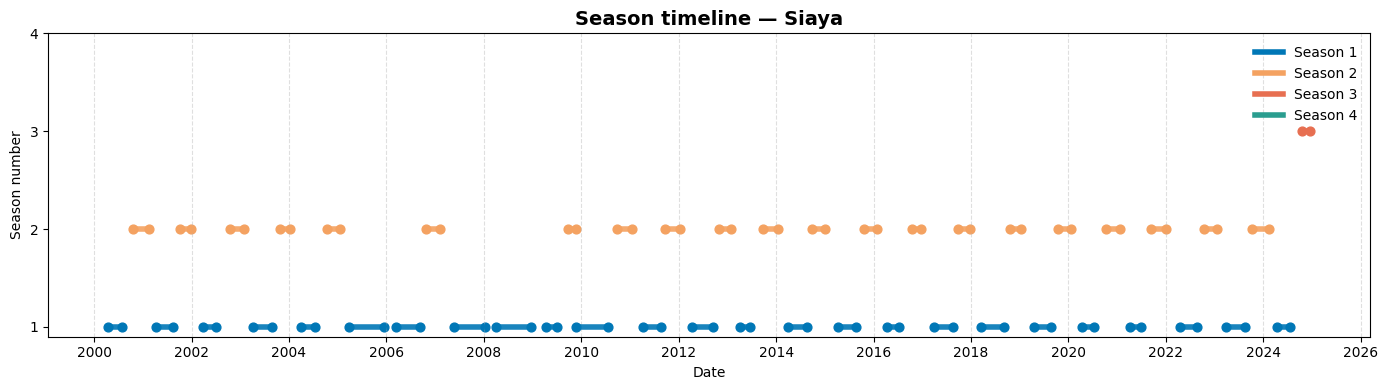

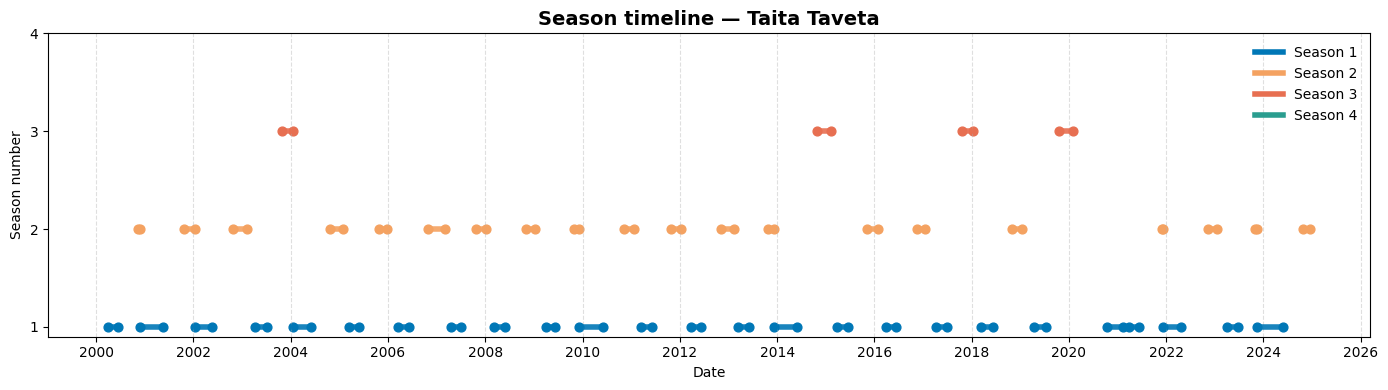

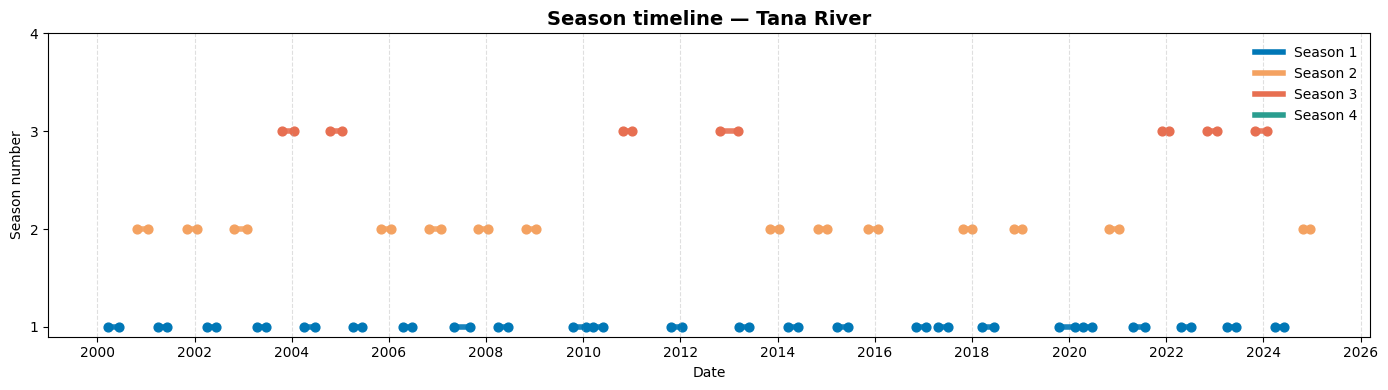

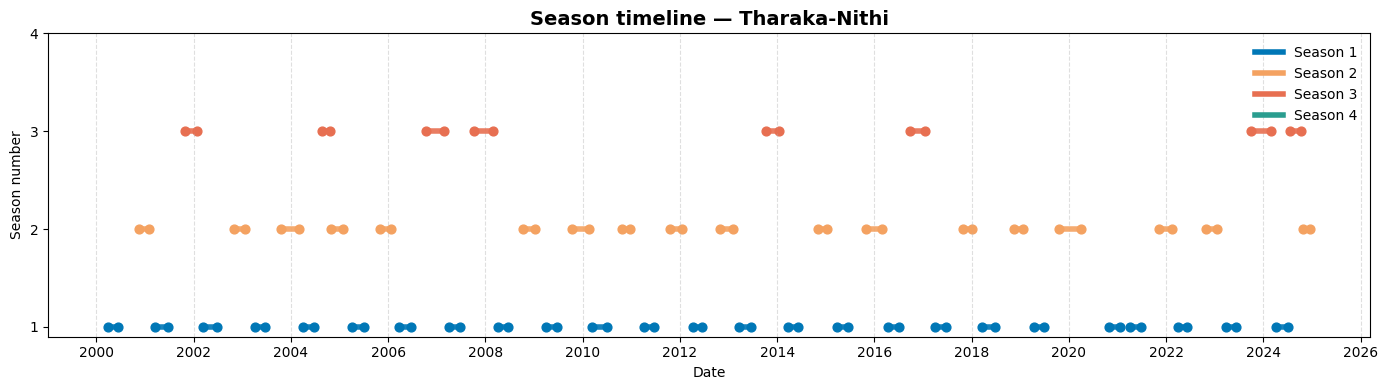

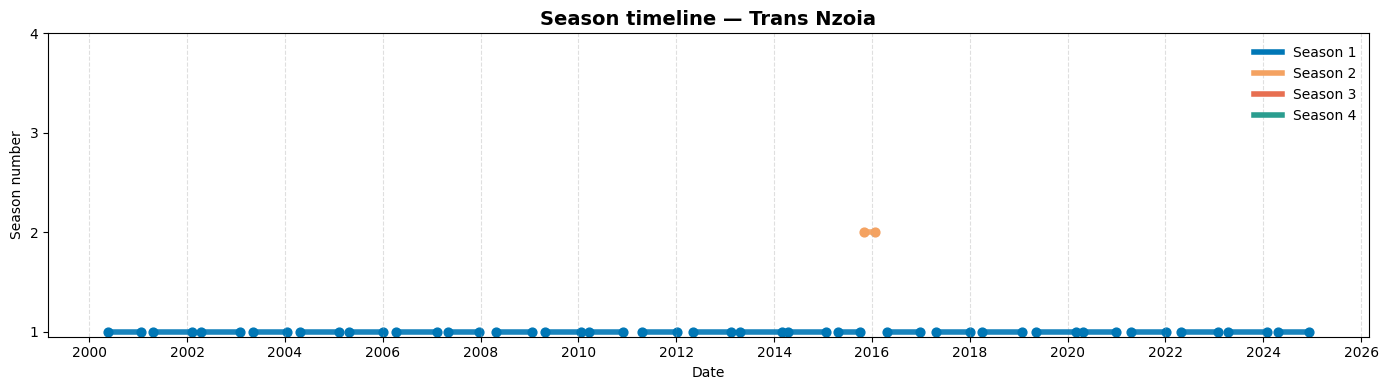

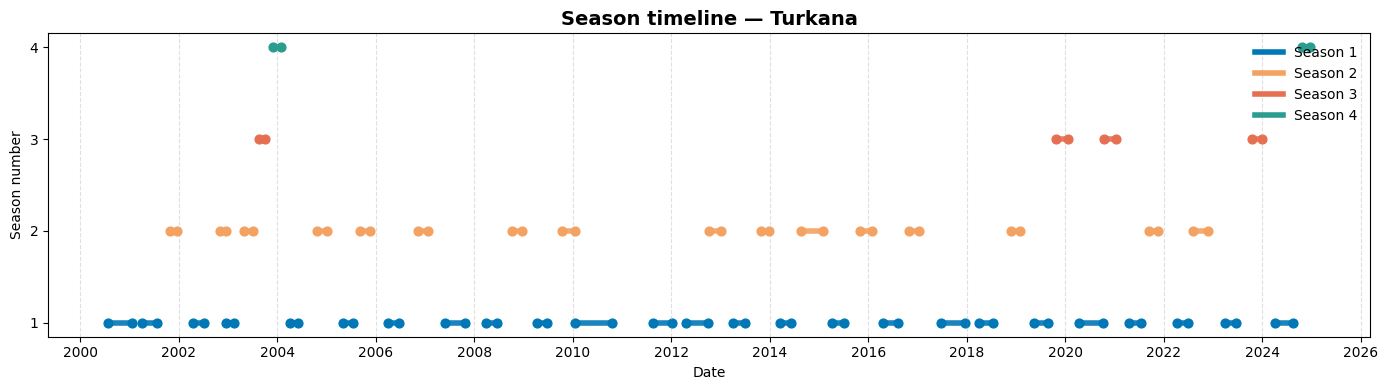

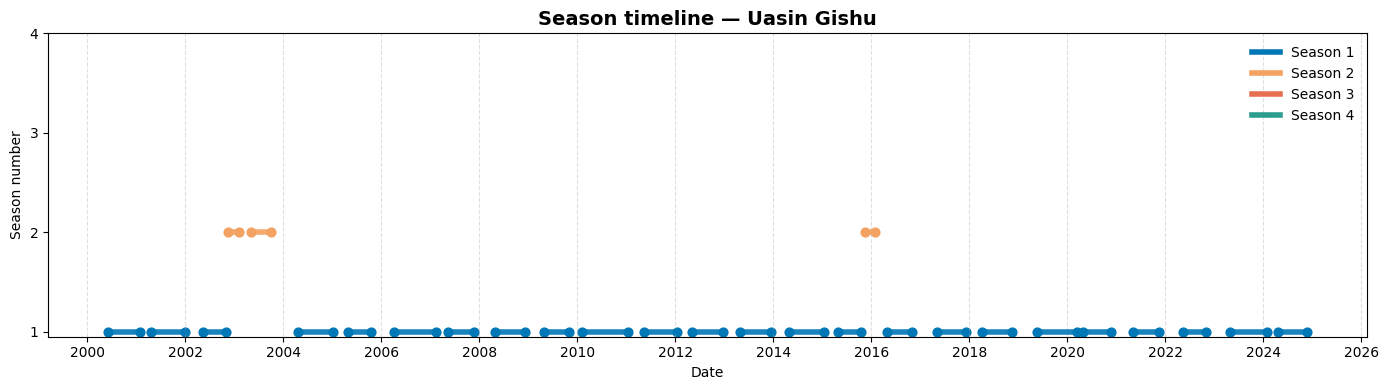

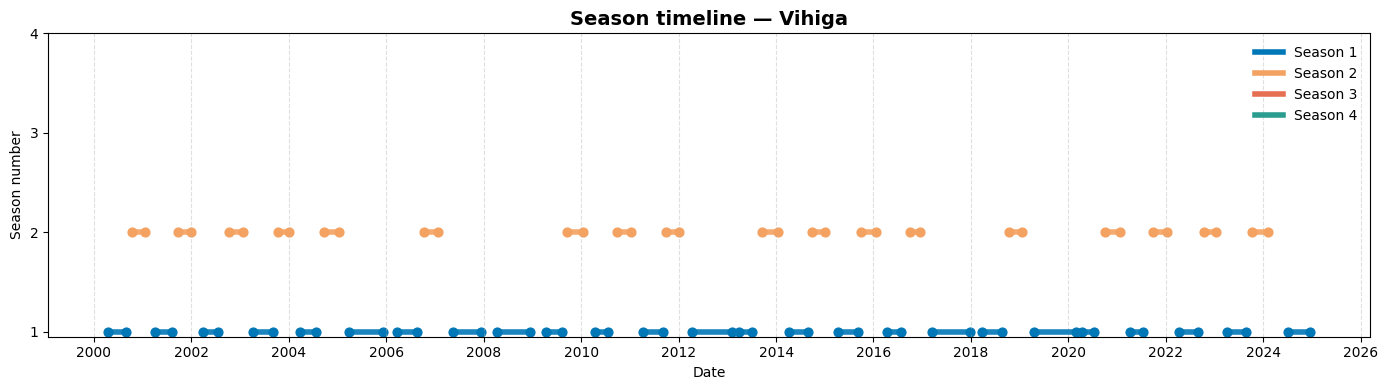

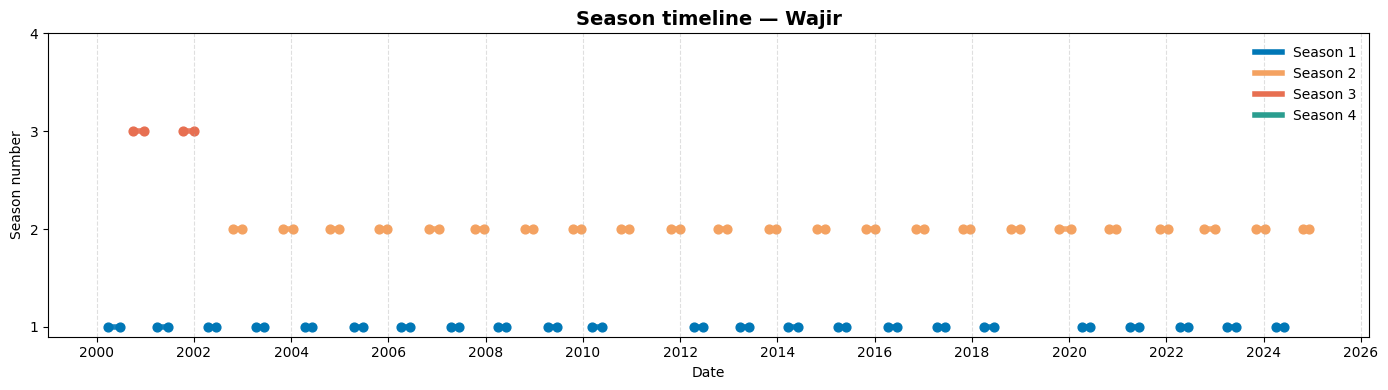

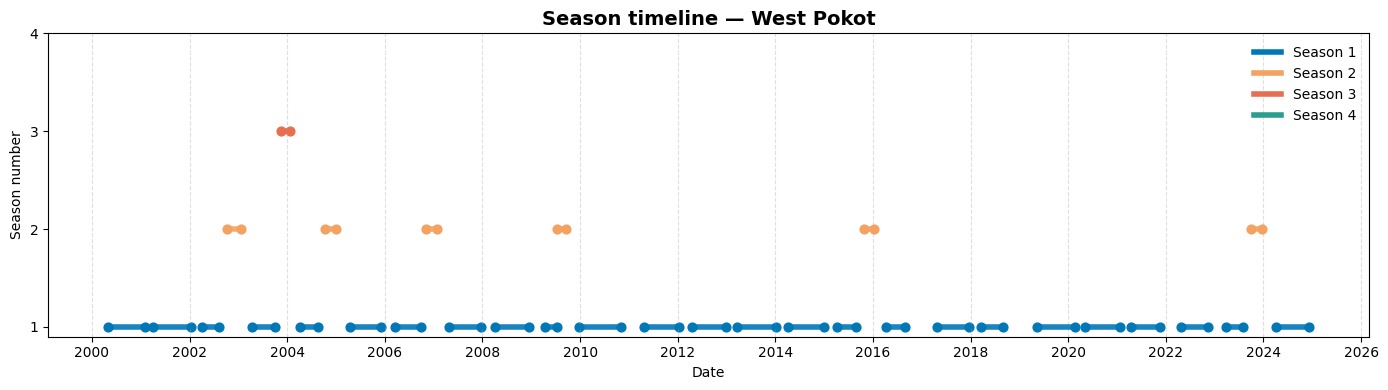

In [196]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Copie de ton DataFrame
df = data_median_sos_eos_cleaned.copy()

# Conversion en datetime au cas où
df["DER.sos"] = pd.to_datetime(df["DER.sos"])
df["DER.eos"] = pd.to_datetime(df["DER.eos"])

# Tri global pour garantir l’ordre chronologique
df = df.sort_values(["admin1_name", "DER.sos"])

# Palette de couleurs par saison
colors = {
    1: "#0077b6",  # bleu
    2: "#f4a261",  # orange
    3: "#e76f51",  # rouge clair
    4: "#2a9d8f"   # vert eau
}

# Liste des comtés
counties = sorted(df["admin1_name"].unique())

# Boucle pour afficher un graphique par comté
for county in counties:
    subset = df[df["admin1_name"] == county]

    plt.figure(figsize=(14, 4))
    for _, row in subset.iterrows():
        plt.plot(
            [row["DER.sos"], row["DER.eos"]],
            [row["season_num"], row["season_num"]],
            color=colors.get(row["season_num"], "gray"),
            linewidth=4,
            alpha=0.9
        )
        plt.scatter(row["DER.sos"], row["season_num"], color=colors.get(row["season_num"], "gray"), s=40)
        plt.scatter(row["DER.eos"], row["season_num"], color=colors.get(row["season_num"], "gray"), s=40)

    plt.title(f"Season timeline — {county}", fontsize=14, fontweight="bold")
    plt.xlabel("Date")
    plt.ylabel("Season number")
    plt.yticks([1, 2, 3, 4])
    plt.grid(axis="x", linestyle="--", alpha=0.4)

    # Format de l’axe temporel
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # tous les 2 ans
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

    # Légende
    handles = [plt.Line2D([0], [0], color=c, lw=4, label=f"Season {s}") for s, c in colors.items()]
    plt.legend(handles=handles, loc="upper right", frameon=False)

    plt.tight_layout()
    plt.show()


In [17]:
Q1 = data_median_sos_eos_cleaned["season_length_days"].quantile(0.25)
Q3 = data_median_sos_eos_cleaned["season_length_days"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data_median_sos_eos_cleaned[
    (data_median_sos_eos_cleaned["season_length_days"] < lower_bound) |
    (data_median_sos_eos_cleaned["season_length_days"] > upper_bound)
]


In [18]:
print(f"Nombre de valeurs aberrantes détectées : {len(outliers)}")
outliers.sort_values("season_length_days", ascending=False).head(10)


Nombre de valeurs aberrantes détectées : 251


admin1_name  season_yr  season_num             DER.sos    DER.eos  \
1539        Nyandarua       2010           1 2009-11-18 12:00:00 2011-01-15   
1388           Nakuru       2010           1 2009-12-15 12:00:00 2011-02-08   
16            Baringo       2010           1 2009-12-31 00:00:00 2011-01-14   
884          Laikipia       2010           1 2009-12-13 00:00:00 2010-12-17   
169   Elgeyo-Marakwet       2010           1 2010-01-19 12:00:00 2011-01-15   
1384           Nakuru       2007           1 2006-11-28 00:00:00 2007-11-21   
513           Kericho       2010           1 2010-02-03 00:00:00 2011-01-19   
1411            Nandi       2006           1 2006-03-21 00:00:00 2007-03-06   
1931      Uasin Gishu       2010           1 2010-02-06 00:00:00 2011-01-16   
990          Machakos       2020           1 2020-04-05 12:00:00 2021-03-14   

      season_length_days  
1539                 422  
1388                 419  
16                   379  
884                  369  
169                  360  
1384                 358  
513                  350  
1411                 350  
1931                 344  
990                  342

Despeite having ouliers, they seems to be relevant informartion because they were not sseason for example for Nyandarua during 2010 it last from 2009 to 2011. We will just leave it like that

In [19]:
data_median_sos_eos_cleaned

admin1_name  season_yr  season_num             DER.sos  \
0        Baringo       2000           1 2000-06-19 12:00:00   
1        Baringo       2001           1 2001-04-05 12:00:00   
2        Baringo       2002           1 2002-04-05 00:00:00   
3        Baringo       2002           2 2002-11-04 00:00:00   
4        Baringo       2003           1 2002-12-14 00:00:00   
...          ...        ...         ...                 ...   
2065  West Pokot       2021           1 2021-04-13 00:00:00   
2066  West Pokot       2022           1 2022-04-21 00:00:00   
2067  West Pokot       2023           1 2023-03-26 00:00:00   
2068  West Pokot       2023           2 2023-10-03 00:00:00   
2069  West Pokot       2024           1 2024-04-03 00:00:00   

                 DER.eos  season_length_days  
0    2000-12-27 00:00:00                 190  
1    2002-02-05 00:00:00                 305  
2    2002-07-31 00:00:00                 117  
3    2002-12-14 00:00:00                  40  
4    2003-02-15 00:00:00                  63  
...                  ...                 ...  
2065 2021-11-17 00:00:00                 218  
2066 2022-11-14 00:00:00                 207  
2067 2023-08-03 12:00:00                 130  
2068 2023-12-20 00:00:00                  78  
2069 2024-12-04 00:00:00                 245  

[2070 rows x 6 columns]

In [21]:
import pandas as pd
from tqdm import tqdm

# --- Préparation des données ---
data["DER.sos"] = pd.to_datetime(data["DER.sos"], errors="coerce")
data["DER.eos"] = pd.to_datetime(data["DER.eos"], errors="coerce")
data_median_sos_eos_cleaned["DER.sos"] = pd.to_datetime(data_median_sos_eos_cleaned["DER.sos"])
data_median_sos_eos_cleaned["DER.eos"] = pd.to_datetime(data_median_sos_eos_cleaned["DER.eos"])

# --- On prépare une liste pour stocker les résultats ---
records = []

# --- Boucle par saison propre ---
for _, row in tqdm(data_median_sos_eos_cleaned.iterrows(), total=len(data_median_sos_eos_cleaned)):
    county = row["admin1_name"]
    sos = row["DER.sos"]
    eos = row["DER.eos"]

    # Filtrer les données de pluie correspondant à ce comté et cet intervalle
    mask = (
        (data["admin1_name"] == county)
        & (data["DER.sos"] >= sos)
        & (data["DER.eos"] <= eos)
    )

    total_rain = data.loc[mask, "rain_der"].sum(skipna=True)

    records.append({
        "admin1_name": county,
        "season_yr": row["season_yr"],
        "season_num": row["season_num"],
        "DER.sos": sos,
        "DER.eos": eos,
        "season_length_days": row["season_length_days"],
        "total_rain_mm": total_rain
    })

# --- DataFrame enrichi final ---
data_saison_with_rain = pd.DataFrame(records)
data_saison_with_rain

100%|██████████| 2070/2070 [05:39<00:00,  6.10it/s]


admin1_name  season_yr  season_num             DER.sos  \
0        Baringo       2000           1 2000-06-19 12:00:00   
1        Baringo       2001           1 2001-04-05 12:00:00   
2        Baringo       2002           1 2002-04-05 00:00:00   
3        Baringo       2002           2 2002-11-04 00:00:00   
4        Baringo       2003           1 2002-12-14 00:00:00   
...          ...        ...         ...                 ...   
2065  West Pokot       2021           1 2021-04-13 00:00:00   
2066  West Pokot       2022           1 2022-04-21 00:00:00   
2067  West Pokot       2023           1 2023-03-26 00:00:00   
2068  West Pokot       2023           2 2023-10-03 00:00:00   
2069  West Pokot       2024           1 2024-04-03 00:00:00   

                 DER.eos  season_length_days  total_rain_mm  
0    2000-12-27 00:00:00                 190        20900.6  
1    2002-02-05 00:00:00                 305       150297.5  
2    2002-07-31 00:00:00                 117        16329.0  
3    2002-12-14 00:00:00                  40            0.0  
4    2003-02-15 00:00:00                  63         3839.3  
...                  ...                 ...            ...  
2065 2021-11-17 00:00:00                 218        45337.4  
2066 2022-11-14 00:00:00                 207        53499.4  
2067 2023-08-03 12:00:00                 130        10670.6  
2068 2023-12-20 00:00:00                  78         7235.6  
2069 2024-12-04 00:00:00                 245        91165.1  

[2070 rows x 7 columns]

In [24]:
data_saison_with_rain.to_csv('data/processed/kenya_phenology_seasons_with_rain_export-v1.csv', index=False)

In [204]:
data_median_sos_eos_cleaned.to_csv('data/processed/kenya_phenology_cleaned_export-v1.csv', index=False)

---

In [1]:
import pandas as pd
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt


In [ ]:

# === 3. Population rurale ===
url_pop = "https://digital-atlas.s3.amazonaws.com/domain=exposure/type=population/source=worldpop2020/region=ssa/processing=analysis-ready/variable=rural_pop.tif"
with rasterio.open(url_pop) as src:
    pop = src.read(1)
    plt.imshow(pop, cmap="viridis")
    plt.title("Rural population density (SSA)")
    plt.colorbar()
    plt.show()

# === 4. Valeur de production des cultures ===
url_crops = "https://digital-atlas.s3.amazonaws.com/domain=exposure/type=crop/source=spam2020v1r2_ssa/region=ssa/processing=atlas-harmonized/variable=vop_nominal-usd21/spam_vop_nominal-usd21_all.tif"
with rasterio.open(url_crops) as src:
    crop = src.read(1)
    plt.imshow(crop, cmap="YlGn")
    plt.title("Crop value of production (USD)")
    plt.colorbar()
    plt.show()

# === 5. Valeur de production du bétail ===
url_livestock = "https://digital-atlas.s3.amazonaws.com/domain=exposure/type=livestock/source=glw4/region=ssa/time=2020/processing=atlas-harmonized/variable=vop_nominal-usd-2021/glw4-2020_vop_nominal-usd-2021.tif"
with rasterio.open(url_livestock) as src:
    livestock = src.read(1)
    plt.imshow(livestock, cmap="plasma")
    plt.title("Livestock value of production (USD)")
    plt.colorbar()
    plt.show()

# === 6. Hazards ===
url_hazards = "https://digital-atlas.s3.amazonaws.com/domain=hazard/type=climate/source=atlas/region=africa/processing=analysis-ready/level=adm1/atlas_hazard_means.parquet"
hazards = pd.read_parquet(url_hazards)
display("Hazard data columns:", hazards.columns.tolist()[:10])

# === 7. Données sur les besoins climatiques des cultures ===
url_climate_profiles = "https://github.com/AdaptationAtlas/hazards_prototype/blob/main/metadata/crop_climate_profiles.xlsx?raw=true"
climate_profiles = pd.read_excel(url_climate_profiles)
display("Crop climate profiles:", climate_profiles.head())


'Phenology data:'

pixel    flag      origin    TRS2.sos    TRS2.eos    TRS5.sos  \
0  1189226  2000_1  2000-01-01  2000-07-31  2000-12-22  2000-08-06   
1  1189226  2001_1  2001-01-01  2001-03-24  2001-07-28  2001-04-04   
2  1189226  2001_2  2001-01-01  2001-09-04  2001-12-31  2001-09-20   
3  1189226  2002_1  2002-01-01  2002-04-02  2002-08-06  2002-04-14   
4  1189226  2002_2  2002-01-01  2002-10-13  2003-02-06  2002-10-31   

     TRS5.eos     DER.sos     DER.pos     DER.eos  ...        R2       NSE  \
0  2000-12-04  2000-08-03  2000-09-06  2000-12-10  ...  0.877805  0.746910   
1  2001-07-18  2001-04-04  2001-05-19  2001-07-24  ...  0.969927  0.957419   
2  2001-12-20  2001-09-20  2001-11-13  2001-12-20  ...  0.958562  0.954455   
3  2002-07-21  2002-04-15  2002-05-29  2002-07-20  ...  0.987241  0.986599   
4  2003-01-29  2002-10-31  2002-12-27  2003-01-28  ...  0.942071  0.936080   

          R      RMSE        pvalue     admin1_name rain_trs5 rain_trs2  \
0  0.936912  0.014294  1.787192e-18  Ilemi Triangle      80.8      90.0   
1  0.984849  0.009635  1.830278e-17  Ilemi Triangle      50.1      85.6   
2  0.979062  0.021539  2.113188e-17  Ilemi Triangle     101.6     119.3   
3  0.993600  0.006505  2.728422e-23  Ilemi Triangle     141.1     141.5   
4  0.970604  0.015819  2.365785e-16  Ilemi Triangle     120.3     133.0   

  rain_greenup_scenescence  rain_der  
0                     47.1      80.8  
1                     92.9      62.5  
2                    127.3     101.6  
3                    153.0     140.4  
4                    154.5     120.3  

[5 rows x 29 columns]

KeyError: 'CNTRY_NAME'

---

In [ ]:
# === 2. Frontières administratives ===

url_admin0 = "https://digital-atlas.s3.amazonaws.com/domain=boundaries/type=admin/source=gaul2024/region=africa/processing=analysis-ready/level=adm0/atlas_gaul24_a0_africa.parquet"
admin0 = pd.read_parquet(url_admin0)
data_admin0 = pd.DataFrame(admin0)

url_admin1 = "https://digital-atlas.s3.amazonaws.com/domain=boundaries/type=admin/source=gaul2024/region=africa/processing=analysis-ready/level=adm1/atlas_gaul24_a1_africa.parquet"
admin1 = pd.read_parquet(url_admin1)
data_admin1 = pd.DataFrame(admin1)

url_admin2 = "https://digital-atlas.s3.amazonaws.com/domain=boundaries/type=admin/source=gaul2024/region=africa/processing=analysis-ready/level=adm2/atlas_gaul24_a2_africa.parquet"
admin2 = pd.read_parquet(url_admin2)
data_admin2 = pd.DataFrame(admin2)


# kenya = admin[admin["admin0_name"] == "Kenya"]
# kenya

In [ ]:
# === 1. Phénologie : début, fin, et durée de la saison des pluies ===

url_phenology_db = "https://digital-atlas.s3.amazonaws.com/domain=phenology/type=sos_eos/source=glass_nvdi/region=africa/processing=raw/level=adm1/KEN_seasonal-phenology_plus-rain.parquet"
data_phenology = pd.read_parquet(url_phenology)
data_phenology

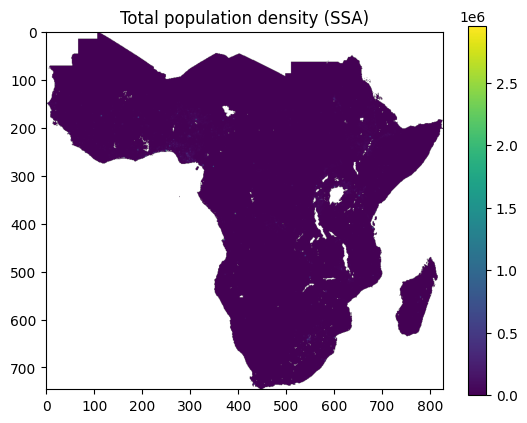

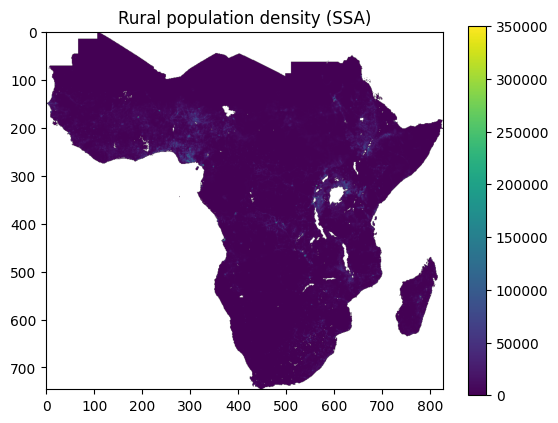

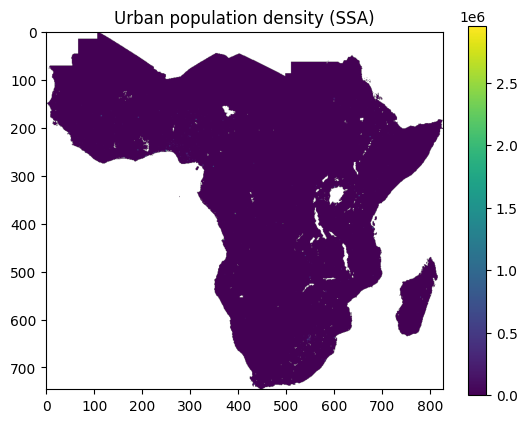

In [17]:
# === Population ===

url_total_pop = "https://digital-atlas.s3.amazonaws.com/domain=exposure/type=population/source=worldpop2020/region=ssa/processing=analysis-ready/variable=total_pop.tif" 
with rasterio.open(url_total_pop) as src:
    total_pop = src.read(1)
    plt.imshow(total_pop, cmap="viridis")
    plt.title("Total population density (SSA)")
    plt.colorbar()
    plt.show()

url_rural_pop = "https://digital-atlas.s3.amazonaws.com/domain=exposure/type=population/source=worldpop2020/region=ssa/processing=analysis-ready/variable=rural_pop.tif"
with rasterio.open(url_rural_pop) as src:
    rural_pop = src.read(1)
    plt.imshow(rural_pop, cmap="viridis")
    plt.title("Rural population density (SSA)")
    plt.colorbar()
    plt.show()

url_urban_pop = "https://digital-atlas.s3.amazonaws.com/domain=exposure/type=population/source=worldpop2020/region=ssa/processing=analysis-ready/variable=urban_pop.tif"
with rasterio.open(url_urban_pop) as src:
    urban_pop = src.read(1)
    plt.imshow(urban_pop, cmap="viridis")
    plt.title("Urban population density (SSA)")
    plt.colorbar()
    plt.show()